
# <span style="color:rgb(213,80,0)">Зачем нужны матрицы</span>

### Будем решать следующую задачу:
### Как, имея таблицу данных с результатами измерения разных свойств, например, таблицу трендов по времени для свойств материала, вытащенных из базы данных за некоторый период времени, понять какие из свойств являются линейно коррелированными.
## PCA \- principal component analysis (анализ главных компонент)

PCA \- способ анализа степени "независимости" столбцов матрицы. Позволяет понять есть ли среди данных "лишние", то есть не несущие информации, понять как нужно преобразовать исходные данные, чтобы они были максимально линейно независимыми. Позволяет уменьшить размерность данных.


Применяется во многих разделах анализа данных, таких как, классификация, сжатие  и распознавание изображений, корреляционный анализ и др. Часто используется в машинном обучении, когда надо "прорядить" исходные данные обучающей выборки для нейронных сетей.

## Немного о матрицах.
#### Матрциа A \- это:
1.  Упорядоченная коллекция чисел: $A(i,j)$ => индексирование (get\_index, set\_index)
2. Упорядоченная коллекция вектор\-столбцов: $A=[\vec{a_1 } ,...,\vec{a_i } ,...,\vec{a_m } ]$ , $A(:,i)=\vec{a_i }$ => итерирование по столбцам матрицы в цикле
3. Оператор <u>линейного</u> преобразования векторов, символ  $[A]$ \- обозначает "действие" матрицы: $A\vec{b} =\vec{c}$ <=> подействовав матрицей $A$ на вектор $\vec{b}$ мы преобразовали его в вектор $\vec{c}$
4. Совокупность $m$ вектор\-столбцов (в каждом из которых $N$ координат) $A=[\vec{a_1 } ,...,\vec{a_i } ,...,\vec{a_m } ]$  \- это линейное подпространство векторного пространства $R^N$ всех векторов размером $N$ , обозначается как $span\lbrace A\rbrace$

<u>Сингулярная матрица </u>\- матрица,  у которой колонки (или строки) являются зависимыми (либо равными нулю), то есть могут быть выражены как линейная комбинация других строк (колонок) этой же матрицы.


<u>Ранг матрицы </u> \- количество ее линейно\-независимых столбцов (строк)


Для сингулярной матрицы $A$ размером $[N\times M]$ , размерность линейного подпространства  ее столбцов $span\lbrace A\rbrace$  меньше размерности линейного пространства $R^N$ .

#### Как понять насколько сильно отличаются два вектора друг от друга?

<u>Косинус угла между ними!</u>


Косинус угла между двумя векторами:


 $cos(\alpha )=\frac{\vec{a} \cdot \vec{b} }{|\vec{a} ||\vec{b} |}=\hat{a} \cdot \frac{\vec{b} }{|\vec{b} |}={\hat{a} }^T \frac{\vec{b} }{|\vec{b} |}$                                                                                                                                                            (\*)


 $\hat{a}$ \- единичный вектор, направленный вдоль $\vec{a}$


Чем меньше косинус угла между векторами, тем они больше друг от друга отличаются (для ортогональных векторов он равен нулю), чем ближе косинус (по модулю)   к единице, тем  более "похожи" вектора друг на друга, так как $cos(\alpha )=\frac{\vec{a} \cdot \vec{b} }{|\vec{a} ||\vec{b} |}$

#### Проекция вектора на вектор

У вектора $\vec{b}$ есть зависимая от $\vec{a}$ компонента $\vec{b_{||\vec{a} } }$ , то есть та, которая может быть получена путем умножения $\vec{a}$ на число  и полностью независимая компонента ${\vec{b} }_{\perp \vec{a} }$ ортогональная вектору  $\vec{a}$ .


$$\vec{b} =\vec{b_{||\vec{a} } } +{\vec{b} }_{\perp \vec{a} }$$

 $\vec{b_{||\vec{a} } } =\hat{a} |\vec{b} |cos(\alpha )=\hat{a} |\vec{b} |\hat{a} \cdot \frac{\vec{b} }{|\vec{b} |}=\hat{a} ({\hat{a} }^T \vec{b} )$ \- вектор проекции вектора $\vec{b}$ на направление вектора $\vec{a}$ \- показывает зависимую от $\vec{a}$ долю вектора $\vec{b}$


 ${\vec{b} }_{\perp \vec{a} } =\vec{b} -\vec{b_{||\vec{a} } } =\vec{b} -\hat{a} ({\hat{a} }^T \vec{b} )$ \- характеризует независимую от  вектора $\vec{a}$ составляющую вектора  $\vec{b}$                                     (\*\*)


In [1]:
clearvars
a_vec = rand(2,1) % генерим случайный вектор на плоскости

a_vec = 2x1    
    0.8147
    0.9058

In [2]:
% Проекция веткоров
R =[78.511;0.73] % координаты вектора в сферической системе координат

R = 2x1    
   78.5110
    0.7300

In [3]:
% угол - модуль
ang = deg2rad(R(1)); %угол вектора
module = R(2);% модуль вектора
b_vect = [module*cos(ang);module*sin(ang)];
a_hat = a_vec/norm(a_vec) %- единичный вектор вдоль а

a_hat = 2x1    
    0.6687
    0.7435

In [4]:
b_par = a_hat*(transpose(a_hat)*b_vect) % проекция вектора b на вектор а

b_par = 2x1    
    0.4207
    0.4677

In [5]:
b_per = b_vect  - b_par % составляющяа вектора b перпендикуларная вектору а

b_per = 2x1    
   -0.2753
    0.2476

fig1


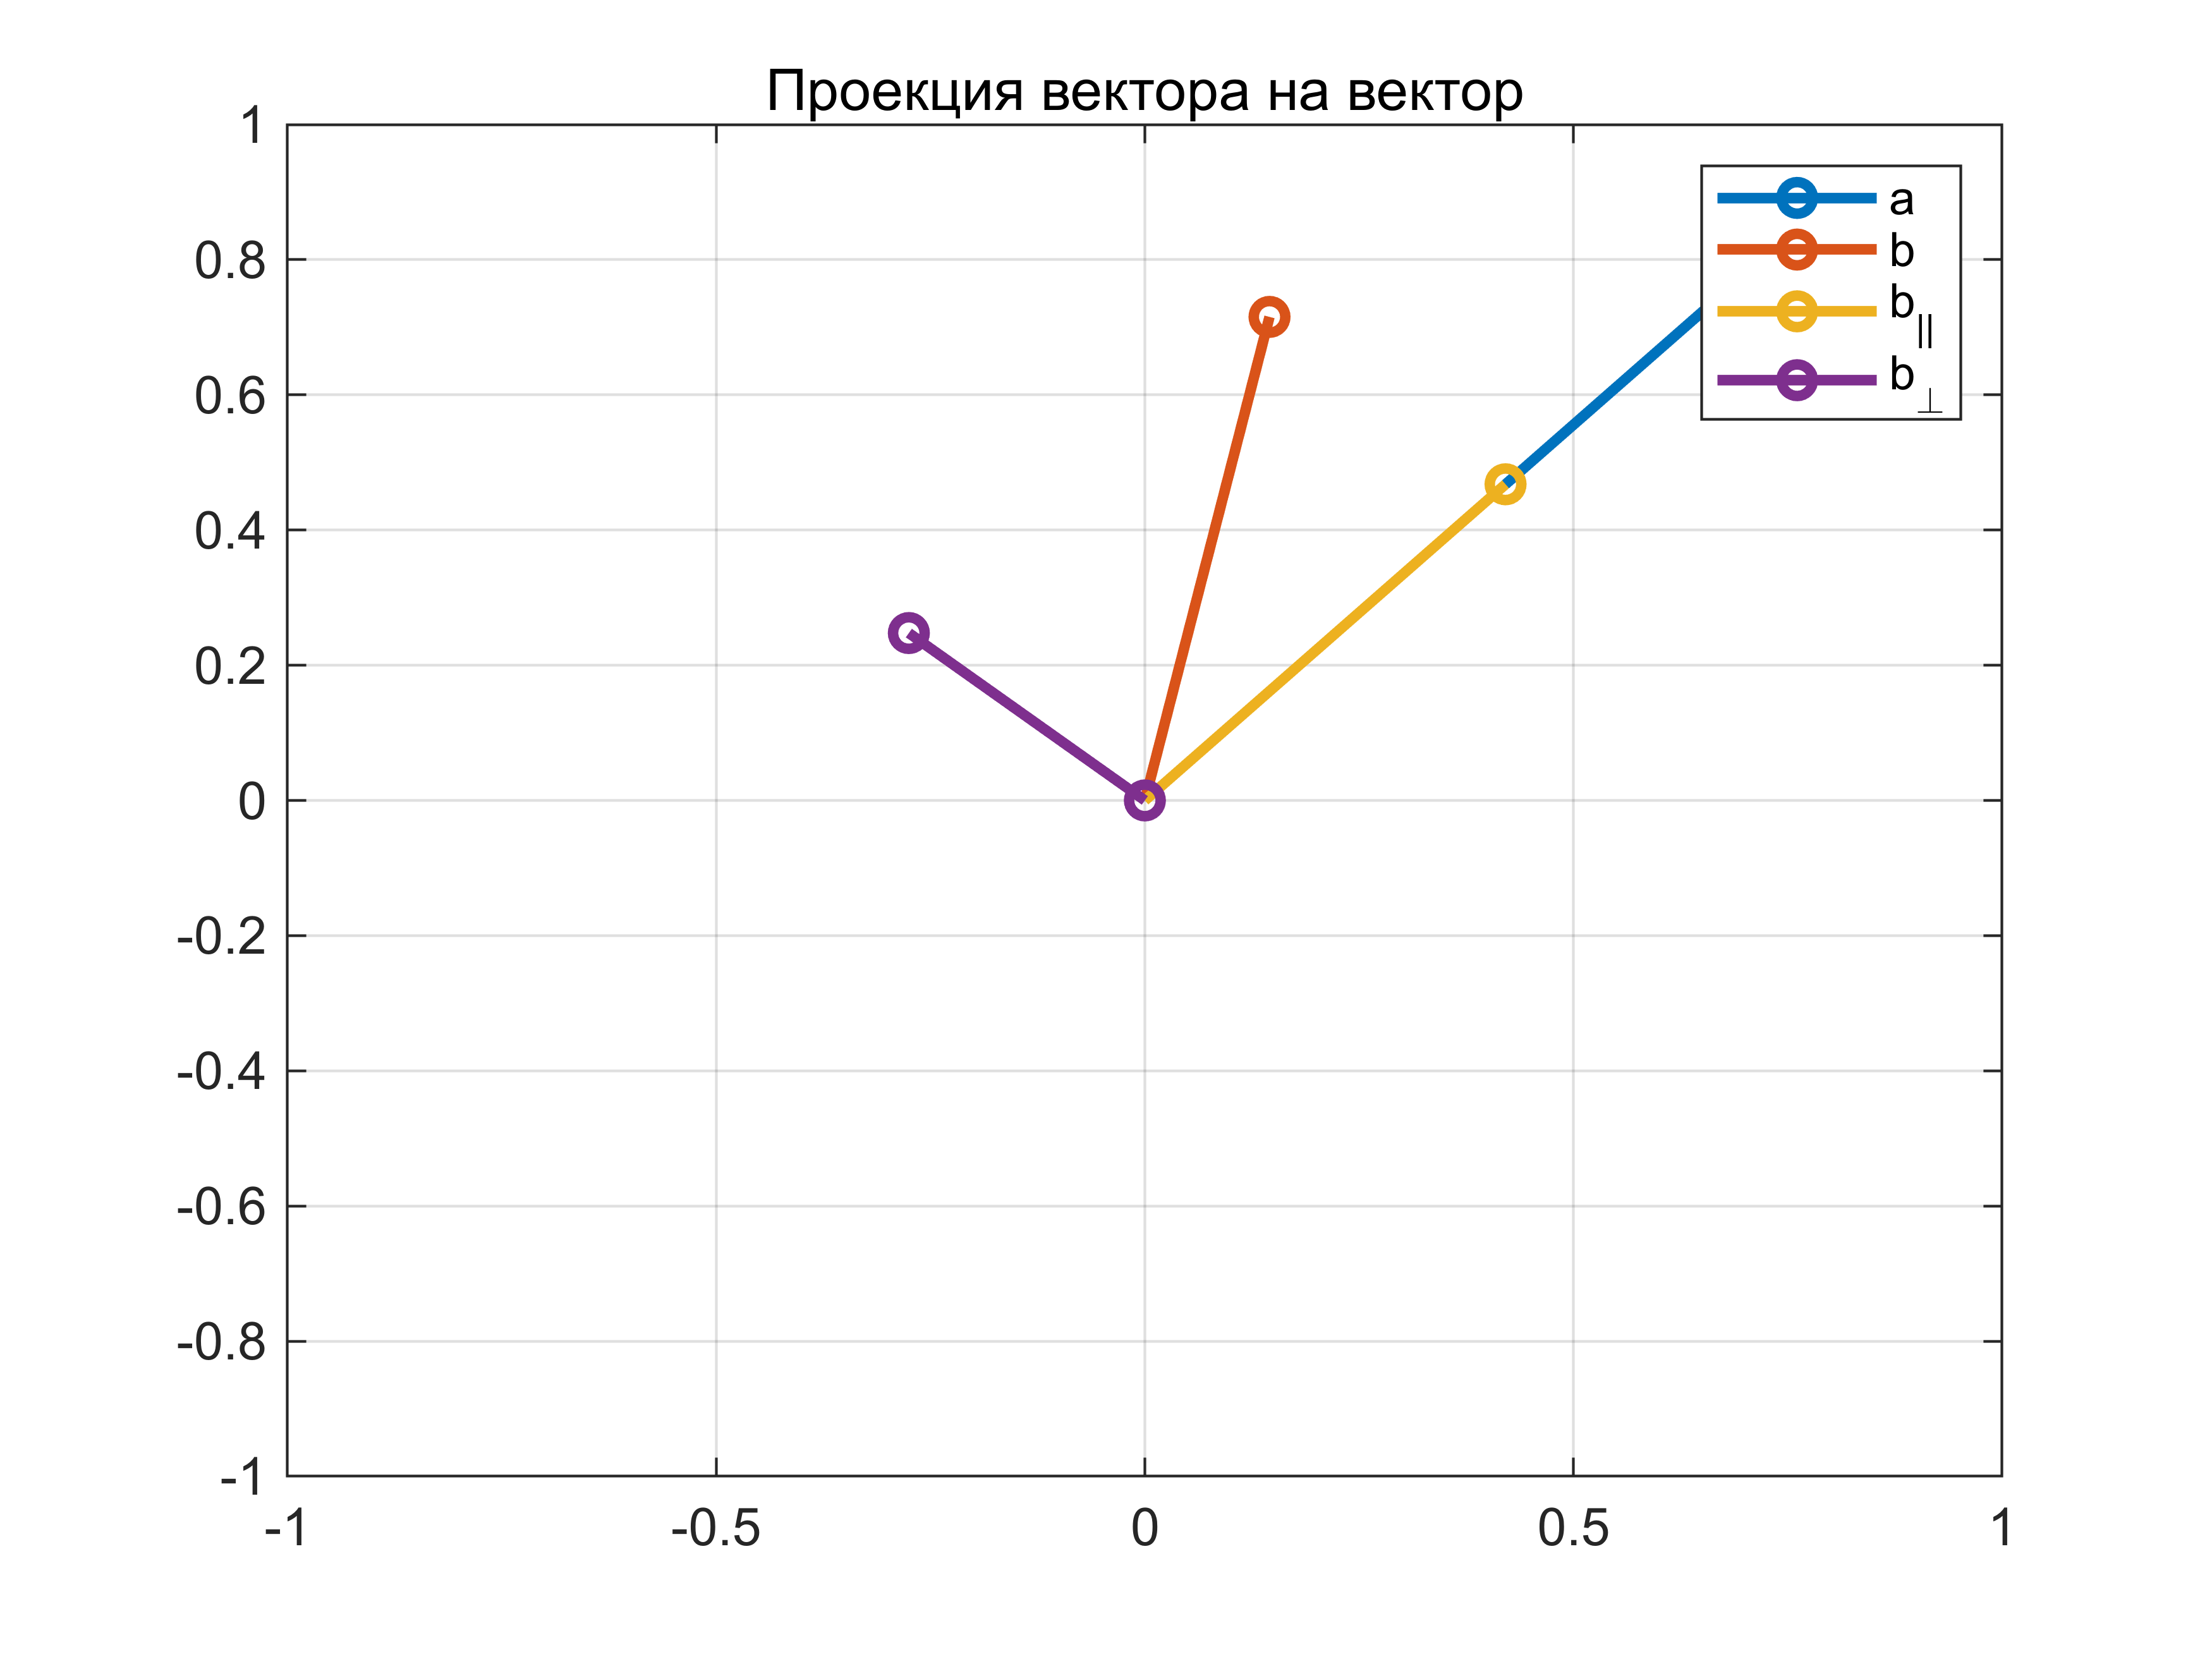

In [6]:
draw_vector([],'Проекция вектора на вектор',["a" "b" "b_{||}" "b_{\perp}"],"vector",a_vec,b_vect, b_par,b_per);

In [7]:
disp("(b_parallel^T)*b_perpendicular = " + transpose(b_per)*b_par)

(b_parallel^T)*b_perpendicular = -5.5511e-17


А что, если в выражении (\*\*) взять и "вынести вектор" $\vec{b}$ за скобки


 ${\vec{b} }_{\perp \vec{a} } =(I-\hat{a} {\hat{a} }^T )\vec{b} =(I-P_{\vec{a} } )\vec{b}$  \- составляющая вектора $\vec{b}$ , перпендикулярная вектору $\vec{a}$ , получается действием матрицы $T=(I-P_{\vec{a} } )$ на вектор $\vec{b}$


 $P_a =\hat{a} {\hat{a} }^T$ \- оператор проецирования произвольного вектора на вектор $\vec{a}$ \- внешнее скалярное произведение


$$\vec{b_{||\vec{a} } } =P_a \vec{b}$$

In [8]:
a = sym("a1",[3 1])

In [9]:
a*transpose(a)

In [10]:
% посчитаем проекции через матричные операторы
P = a_hat*transpose(a_hat) % оператор проецирования

P = 2x2    
    0.4472    0.4972
    0.4972    0.5528

In [11]:
b_per2 = (eye(2)-P )*b_vect

b_per2 = 2x1    
   -0.2753
    0.2476

In [12]:
b_par2 = P*b_vect

b_par2 = 2x1    
    0.4207
    0.4677


$$\vec{b_{||\vec{a} } } \cdot {\vec{b} }_{\perp \vec{a} } ={\vec{b_{||\vec{a} } } }^T {\vec{b} }_{\perp \vec{a} } ={\vec{b} }^T P_a^T (I-P_a )\vec{b} =0$$
#### Проекция вектора на векторное подпространство

Теперь рассмотрим два вектора ${\vec{a} }_1$ и ${\vec{a} }_2$ , они образуют плоскость (в трехмерном пространстве), на эту плоскость можно спроецировать вектор $\vec{b}$


 $\vec{b_{||{\vec{a} }_1 } } =P_{a_1 } \vec{b}$ \- проекция вектора $\vec{b}$ на вектор ${\vec{a} }_1$


 $\vec{b_{||{\vec{a} }_2 } } =P_{a_2 } \vec{b}$ \- проекция вектора $\vec{b}$ на вектор ${\vec{a} }_2$


$${\vec{\beta} }_{||~\vec{a_1 } ,{\vec{a} }_2 } =(P_{a_2 } +P_{a_2 } )\vec{b}$$

Если ввести матрицу $A=[\vec{a_1 } ,\vec{a_2 } ]$ , то оператор $AA^T$ будет давать вектор ${\vec{\beta} }_{||~\vec{a_1 } ,{\vec{a} }_2 }$ , лежащий в плоскости вектор\-столбцов этой матрицы:


$${\vec{\beta} }_{||~\vec{a_1 } ,{\vec{a} }_2 } =(P_{a_2 } +P_{a_2 } )\vec{b} =(\hat{a_1 } {\hat{a_1 } }^T +\hat{a_2 } {\hat{a_2 } }^T )\vec{b} =AA^T \vec{b}$$

$$P_{a_1 ,a_2 } =P_{a_2 } +P_{a_2 } =AA^T$$

In [13]:
% Проверка формул выше через символьные вычисления
a1 = sym("a1",[3 1],'real') % вектор-столбец

In [14]:
a2 = sym("a2",[3 1],'real') % вектор-столбец

In [15]:
b = sym("b",[3,1],'real') % вектор-столбец

In [16]:
Pa1a2  = (a1*a1' + a2*a2') % сумма операторов проектирования

In [17]:
A = [a1,a2] % матрица из двух вектор-столбцов

In [18]:
Pa1a2_mat = A*A' % сумма матриц проектирования

In [19]:
b_par = Pa1a2*b

In [20]:
b_par2 = Pa1a2_mat*b

In [21]:
b_par - b_par2


Вектор ${\vec{\beta} }_{||~\vec{a_1 } ,{\vec{a} }_2 }$ суммы проекций лежит в плоскости векторов ${\vec{a} }_1$ и ${\vec{a} }_2$ , но он, в общем случае, по модулю не равен проекции ${\vec{b} }_{||{\vec{a} }_1 ,{\vec{a} }_2 }$  вектора  $\vec{b}$ на плоскость векторов ${\vec{a} }_1$ и ${\vec{a} }_2$ .


Зато, мы теперь можем спроецировать исходный вектор на него:


$$\vec{b_{||{\vec{a} }_1 } } =P_{\beta } \vec{b}$$

Если бы исходные вектора были бы ортонормированы, то :


$${\vec{\beta} }_{||~\vec{a_1 } ,{\vec{a} }_2 } ={\vec{b} }_{||~\vec{a_1 } ,{\vec{a} }_2 }$$

In [22]:
% Проекция вектора на пространство столбцов матрицы из двух столбцов

clearvars
% генерим случаные вектора в трехмерном пространстве
a1 = 2*(0.5 - rand(3,1));
a2 = 3*(0.5 - rand(3,1));
R = [0.72, -50.7,161.3 ];% модуль-тетта-фи - сферическая система координат дял трехмерного вектора
r = R(1);thetta = R(2);phi = R(3);
b = [r*cosd(thetta)*sind(phi);r*cosd(thetta)*cosd(phi);r*sind(thetta)] % некоторый вектор

b = 3x1    
    0.1462
   -0.4320
   -0.5572

In [23]:
A = [a1,a2]

A = 3x2    
    0.7460    1.2074
   -0.8268    0.6645
   -0.2647   -0.1406

In [24]:
%norm(A)
[bpar,bper,ang] = projection_matrix(A,b);
disp("bpar'*bper =" + ...
    transpose(bpar)*bper)

bpar'*bper =4.1633e-17

fig2


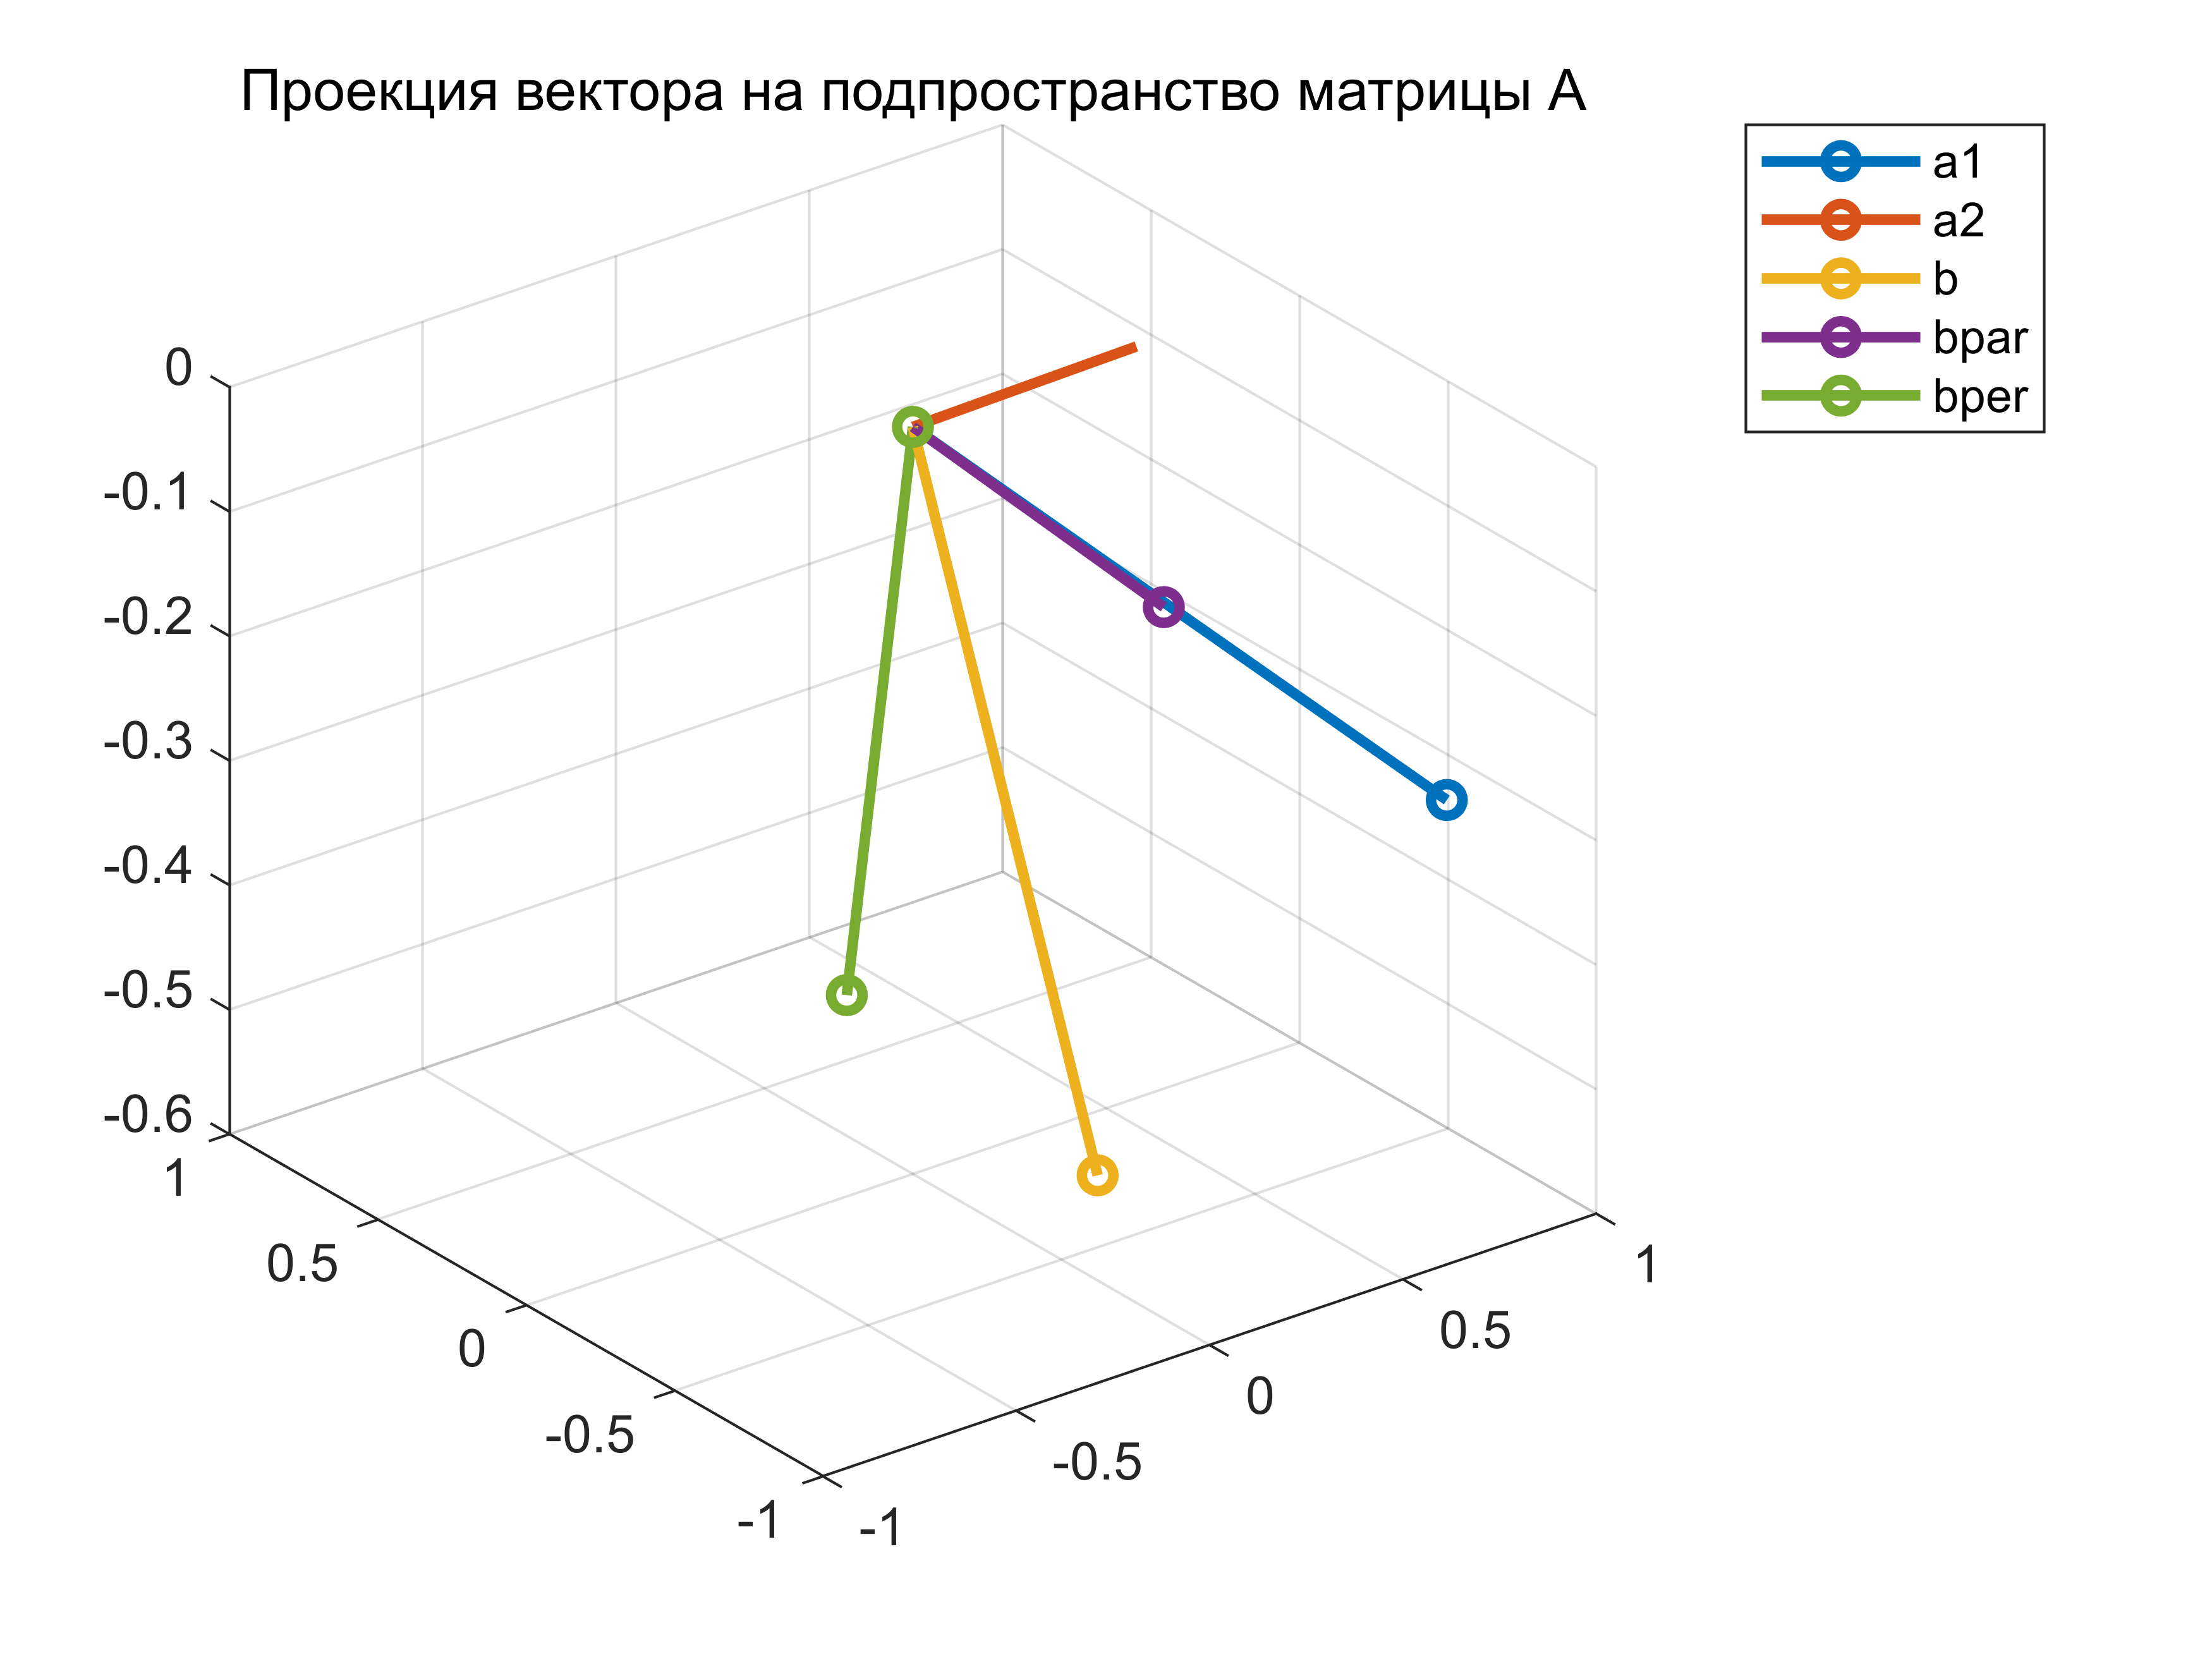

In [25]:

draw_vector([],'Проекция вектора на подпространство матрицы A',["a1" "a2" "b" "bpar" "bper"],"vector",a1,a2, b,bpar,bper);

In [26]:
ang

ang = 41.1164

In [27]:
ang2 = rad2deg(subspace(A,b))

ang2 = 39.0227

In [28]:
% функция subspace позволяет посчитать угол между двумя подпространствами
% для нее b - не обязательно вектор, но может быть и матрицей

In [29]:
clearvars
a1 = 0.5 - rand(2,1);
%a2 = 0.5 - rand(2,1);

In [30]:


R1 = [0.62,235.9 ];
r = R1(1);
thetta = R1(2);
%phi = R1(3);

make_singular = false;
if make_singular
    a2=0.3*a1; % чтобы матриц стала сингулярной
else
    a2 = [r*cosd(thetta);r*sind(thetta)];

end
A = [a1,a2];
theta = rad2deg(subspace(a1,a2)) % subspace - функция, которая возвращает угол между подпространствами

theta = 10.4415

fig3


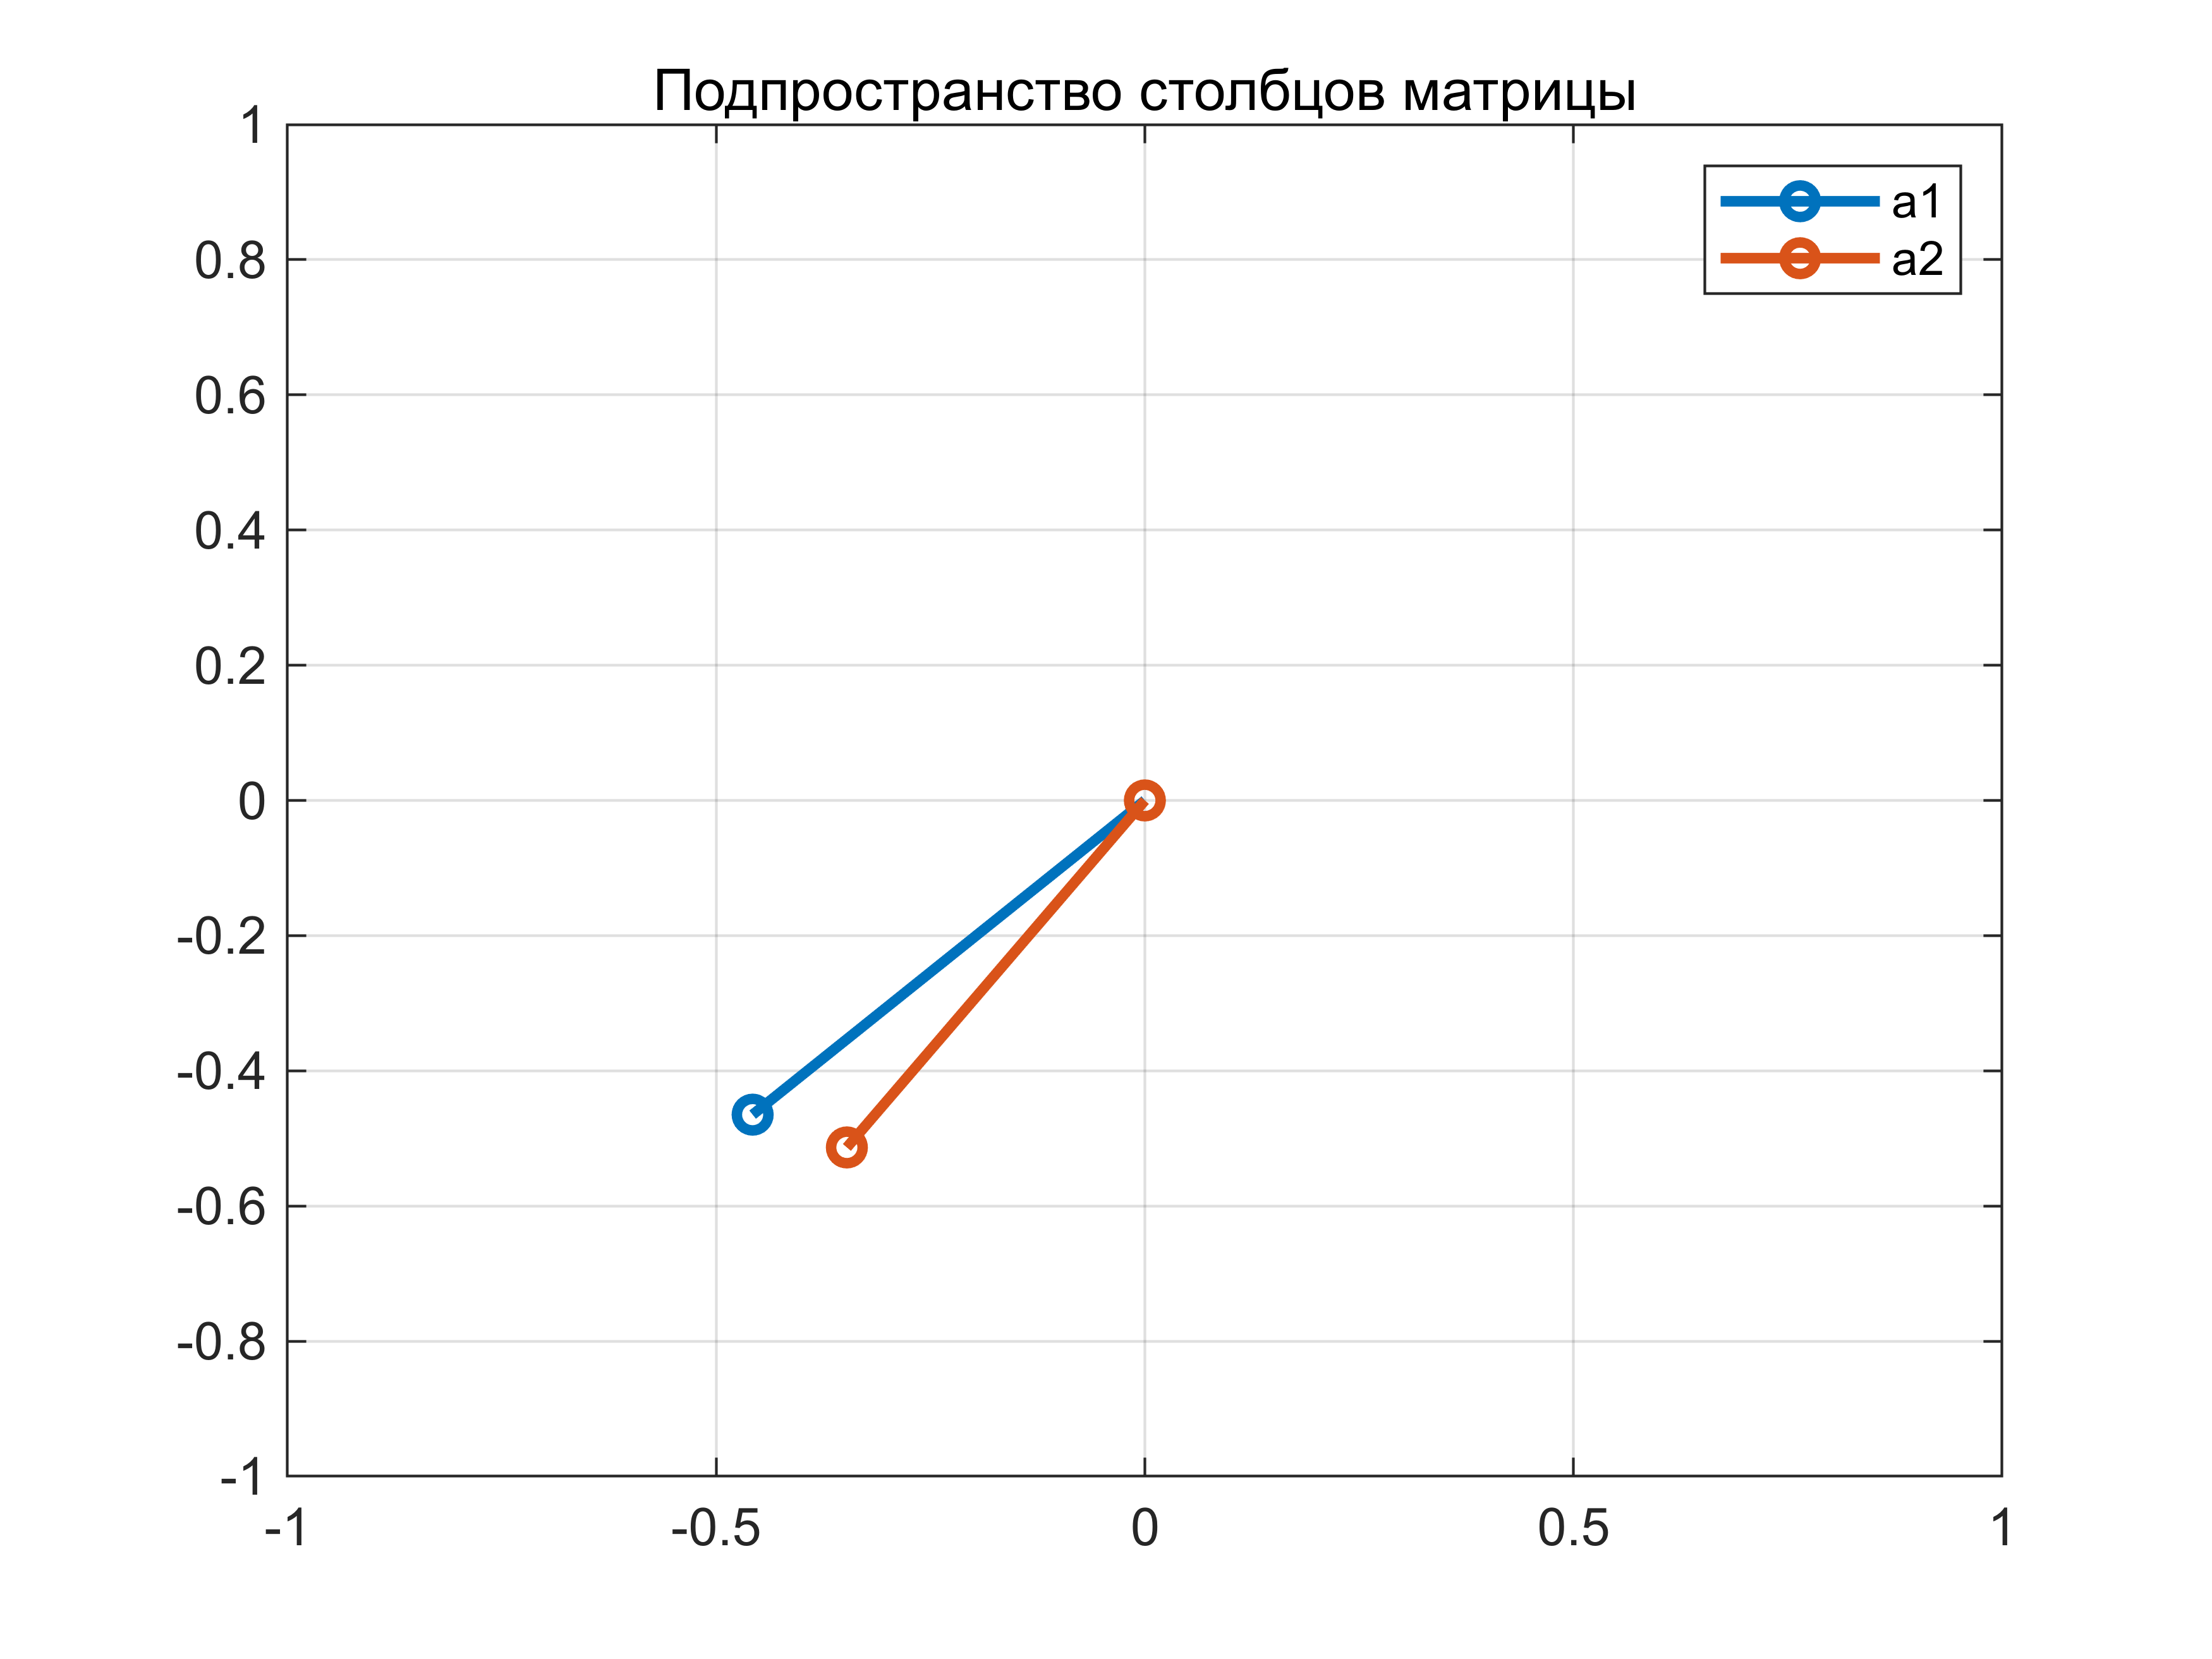

In [31]:
ax1 = draw_vector([],'Подпространство столбцов матрицы',["a1" "a2"],"vector",a1,a2);

In [32]:
disp("Определитель матрицы А:" + det(A))

Определитель матрицы А:0.073289

In [33]:
disp("SVD спектр матрицы А:" + join(string(svds(A,3))))

SVD спектр матрицы А:0.89618 0.081779

In [34]:
disp("Спектр собственных значений матрицы A:" + join(string(eigs(A,3))))

Спектр собственных значений матрицы A:-0.88841 -0.082495

fig4


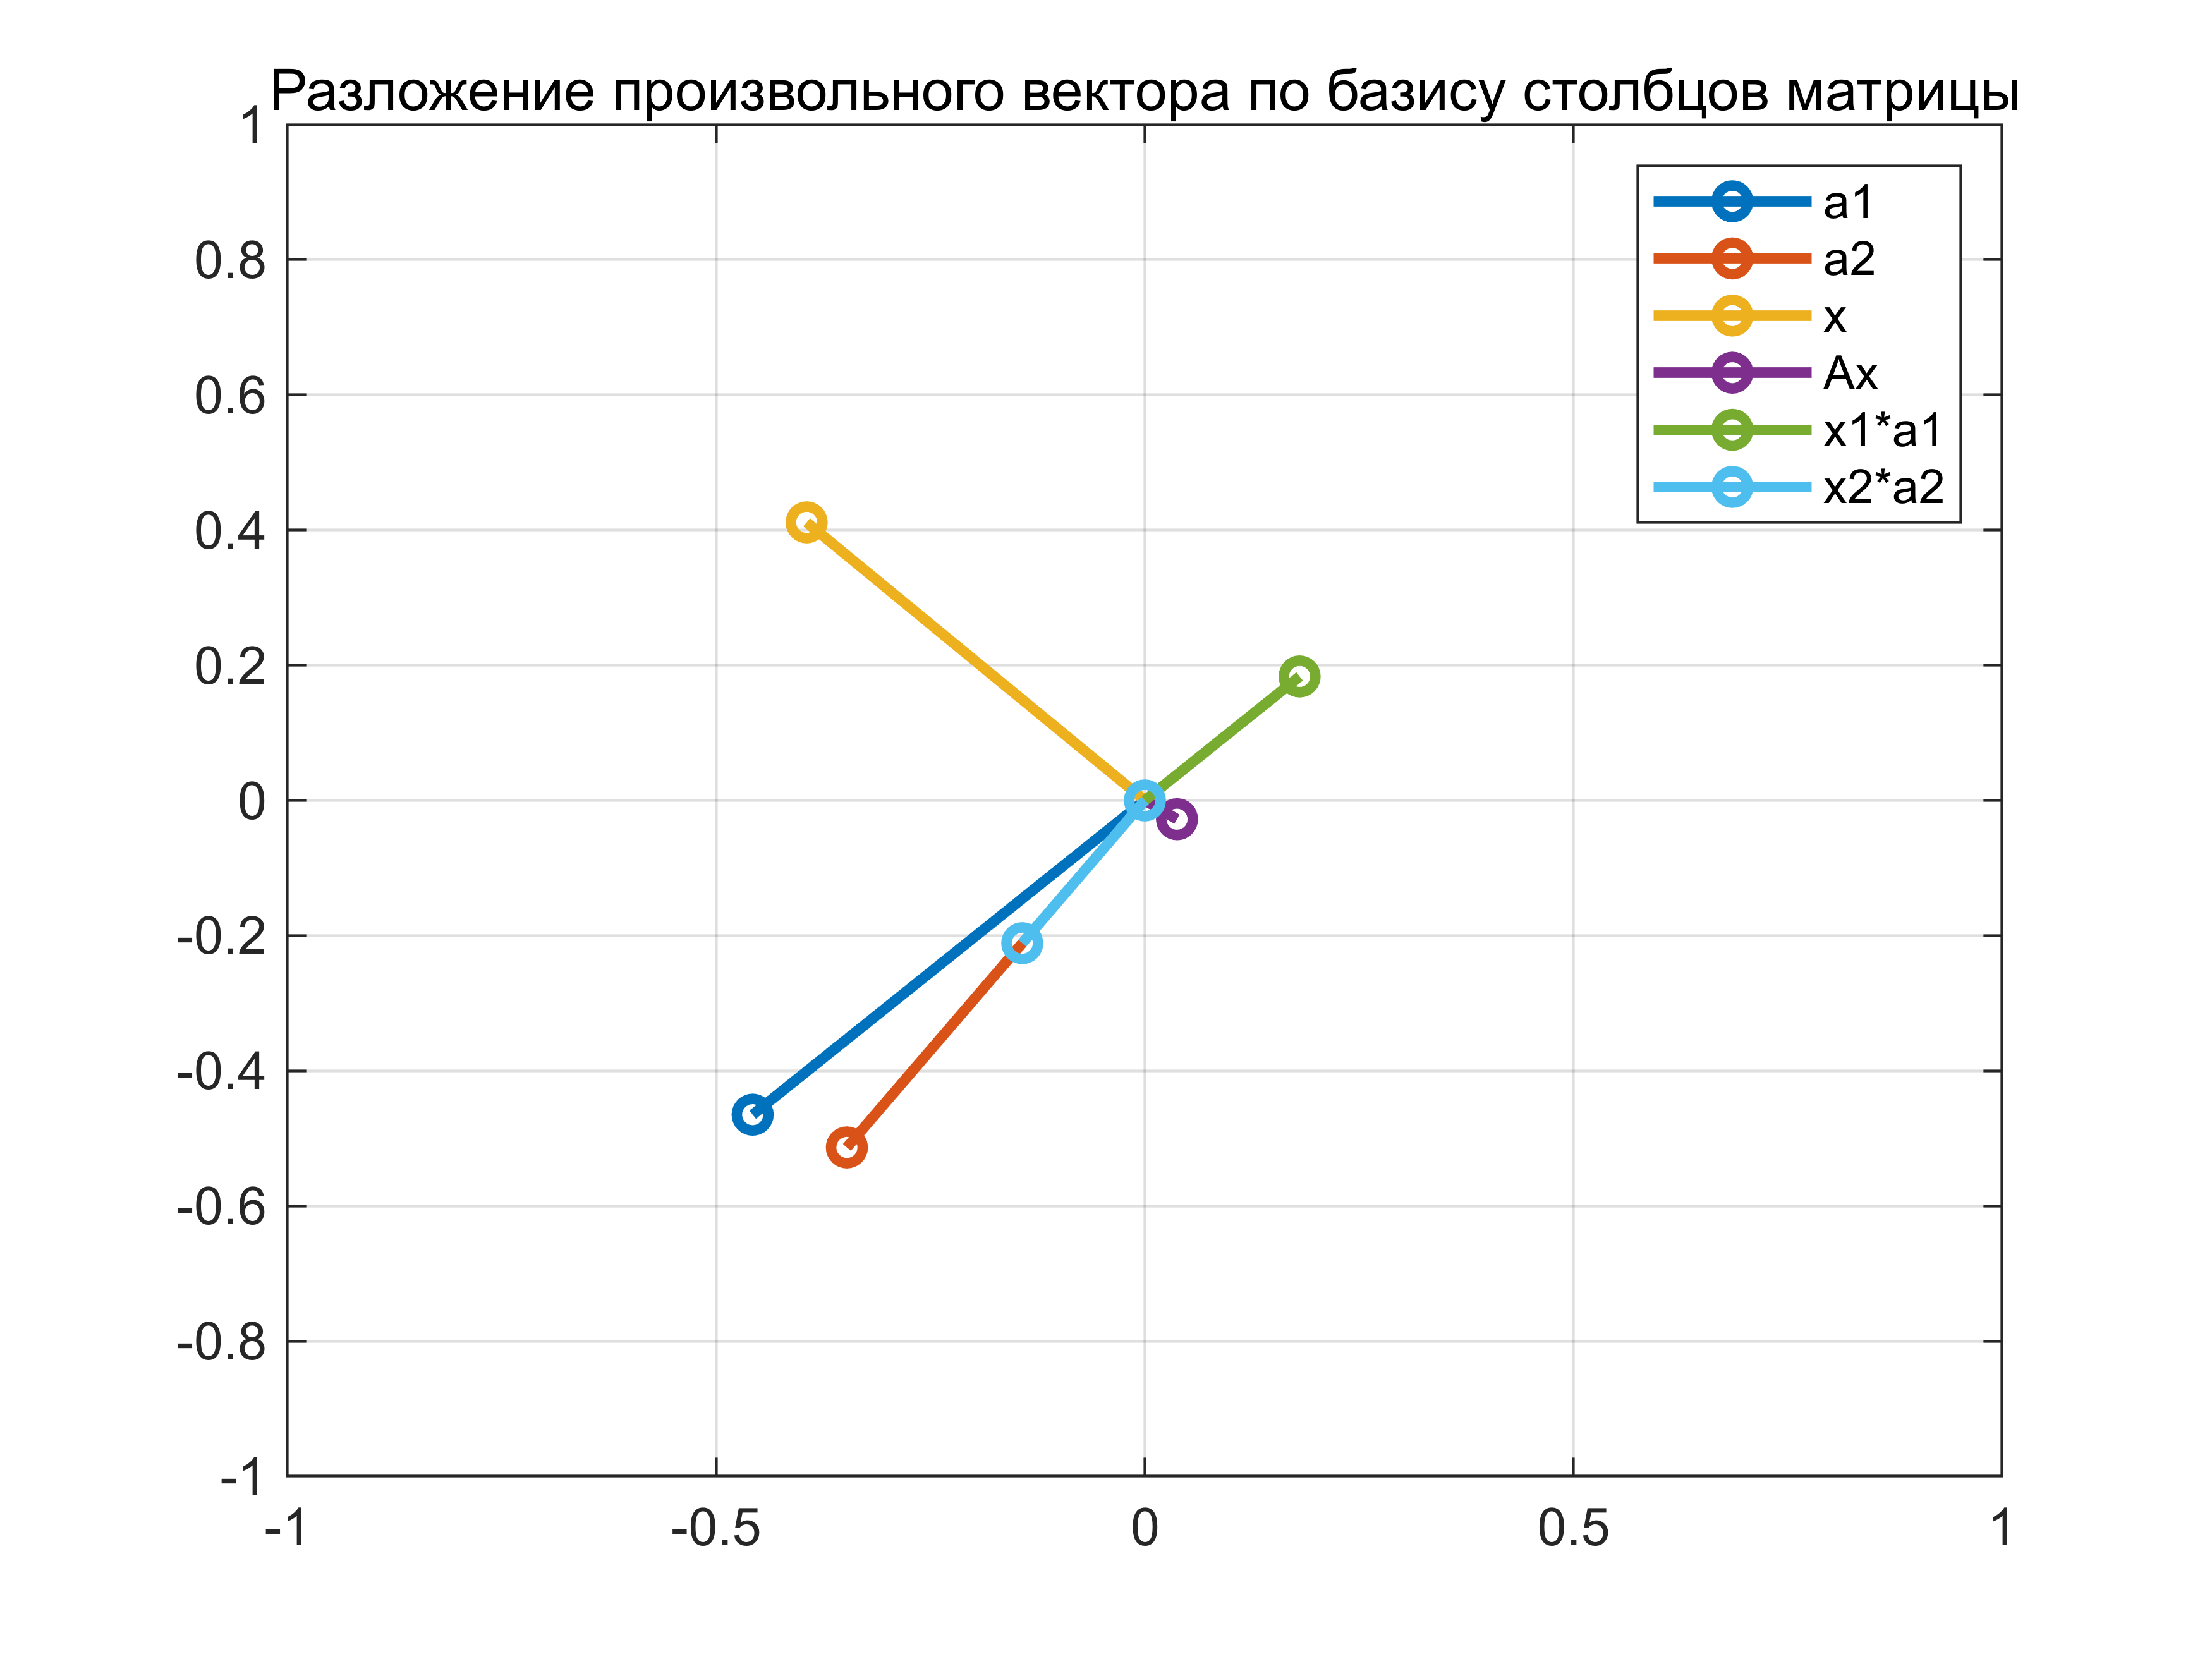

In [35]:
R = [0.57, 133.8];
r = R(1);thetta = R(2);
X = [r*cosd(thetta);r*sind(thetta)];
draw_vector([],'Разложение произвольного вектора по базису столбцов матрицы', ...
    ["a1" "a2" "x" "Ax" "x1*a1" "x2*a2"], ...
    "vector",a1,a2, X,A*X,X(1)*a1,X(2)*a2);

In [36]:
theta = subspace(A,X);
disp("Угол между подпространством столбцов матрицы и вектором X = " + rad2deg(theta))

Угол между подпространством столбцов матрицы и вектором X = 2.0116e-14

In [37]:
disp("Угол между Ax и x: " + rad2deg(subspace(A*X,X)))

Угол между Ax и x: 9.6402

In [38]:
disp("Изменение длины вектора |Ax|/|x| = " + norm(A*X)/norm(X))

Изменение длины вектора |Ax|/|x| = 0.081893

## Два способа факторизации матриц (представления матрицы в виде произведения других матриц)
## I)Способы представления матриц

Прежде чем смотреть факторизации надо вспомнить общие правила обращения с матрицами

#### 1)Матрица как строка столбцов:

 $A=[\vec{a_1 } ,..\vec{a_k } ]$ матрица размером $[n\times k]$ \- это строка из $k$ векторов $\vec{a_i }$ размером $[n\times 1]$ кажый,


 $B=[\vec{b_1 } ,..\vec{b_m ]}$ \- размером  $[k\times m]$ , из $m$ векторов  $\vec{b_i }$ \-  размером $[k\times 1]$

#### 2)Матрица как столбец строк:

 $A=\begin{array}{c} {\vec{r_1 } }^T \newline \vdots \newline {\vec{r_n } }^T  \end{array}$ , где  ${\vec{r_n } }^T$ \- вектор\-строка (для определенности будем считать, что значек $\vec{}$ всегда обозначает столбец), ${\vec{r_i } }^T :[1\times k]$ .


 $B=\begin{array}{c} {\vec{q_1 } }^T \newline \vdots \newline {\vec{q_k } }^T  \end{array}$ , ${\vec{q_i } }^T :[1\times m]$


 $C=AB$ \- матрица размером  $[n\times k]$


In [39]:
clearvars
k=2

k = 2

In [40]:
n=3;
m=2;
a1 = sym("a1",[n 1],'real')

In [41]:
a2 = sym("a2",[n 1],'real')

In [42]:
b1 = sym("b1",[k,1],'real')

In [43]:
b2 = sym("b2",[k,1],'real')

In [44]:
A = [a1,a2];
B = [b1,b2];
r1 = A(1,:)';
q1 = B(1,:)';
q2 = B(2,:)';
r2 = A(2,:)';
r3 = A(3,:)';

### II) "Способы" умножения матриц:

Как смотреть на умножение двух матриц


1) **Классический** (суммирование) $C_{ij} =\sum_k \vec{a_k } (i)\vec{b_j } (k)$


In [45]:
C1 = A*B


2) **Линейная комбинация** **столбцов** матрицы $A$ с коэффициентами \- координатами столбца матрицы $B$ : $C=[\vec{c_1 } ,\ldots,\vec{c_m } ]=[\sum_{i=1}^k \vec{a_i } \vec{b_1 } (i),\ldots,\sum_{i=1}^k \vec{a_i } \vec{b_m } (i)]$


In [46]:
C_Columns_Combination = [a1*b1(1)+a2*b1(2),a1*b2(1)+a2*b2(2)] % комбинация столбцов


3) **Матрица скалярных произведений (столбец строк на строку столбцов)**. Скалярное произведение строк матрицы $A$ и столбцов матрицы $B$ :  $C=AB=[\begin{array}{c} {\vec{r_1 } }^T \newline \vdots \newline {\vec{r_n } }^T  \end{array}][\vec{b_1 } \ldots\vec{b_m } ]=[\begin{array}{ccc} {\vec{r_1 } }^T \vec{b_1 }  & \ldots & ~{\vec{r_1 } }^T \vec{b_m } \newline \vdots  & \ldots & \vdots \newline {\vec{r_n } }^T \vec{b_1 }  & \ldots & {\vec{r_n } }^T \vec{b_m }  \end{array}]$ \- это точно также как умножать столбец на строку, только вместо скаляров  \- вектора


In [47]:
C_Column_Row = [r1'*b1 r1'*b2;r2'*b1 r2'*b2;r3'*b1 r3'*b2]


То есть, умножение матриц ведет себя точно также как умножение столбца на строку (внешнее произведение):


In [48]:
disp("column*row")

column*row

In [49]:
a1*b1'


4) **Сумма матриц (диад) внешних произведений (строка столбцов на столбец строк)** столбцов матрицы $A$ и строк матрицы $B$ :


$$C=AB=[\vec{a_1 } ,..\vec{a_k } ][\begin{array}{c} {\vec{q_1 } }^T \newline \vdots \newline {\vec{q_k } }^T  \end{array}]=\vec{a_1 } {\vec{q_1 } }^T +\ldots+\vec{a_k } {\vec{q_k } }^T$$




In [50]:
C_Row_Column = a1*q1' + a2*q2' % Сумма внешних произведений


То есть, умножение матриц ведет себя точно также как умножение строки на столбец (скалярное произведение):


In [51]:
disp("Умножение столбца на строку:")

Умножение столбца на строку:

In [52]:
transpose(a2)*a1


$$C=AA^T =[\vec{a_1 } ,..\vec{a_k } ][\begin{array}{c} {\vec{a_1 } }^T \newline \vdots \newline {\vec{a_n } }^T  \end{array}]=\vec{a_1 } {\vec{a_1 } }^T +\ldots+\vec{a_k } {\vec{a_k } }^T$$

Ранг каждой из диад $\vec{a_k } {\vec{a_k } }^T$ равен единице!


Ранг матрицы $С$ может быть равен сумме рангов этих матриц, но может быть и меньше.


In [53]:
A*A'

In [54]:
a1*a1' + a2*a2'

### **III) Первая факторизация. Спектральное разложение матрицы:**

Ищем такие вектора, которые не меняют направление при действии на них квадратной матрицей размером $n\times n$


 $A{\vec{p} }_i =\lambda_i {\vec{p} }_i$                                                                                                                                    (1)


 $\lambda_i$ \- собственные значения, ${\vec{p} }_i$ \- собственные вектора. Если матрица несингулярна, то СВ линейно независимы и все СЗ различны. Если матрица $A$ \- положительно определена, то все СЗ больше нуля, если матрица симметрична \- все СВ ортогональны. $P=[{\vec{p} }_1 \ldots{\vec{p} }_n ]$ \- матрица собственных векторов


$$AP=P[\begin{array}{ccc} \lambda_1  & \ldots & 0\newline  & \ddots  & \newline 0 & \ldots & \lambda_n  \end{array}]=P\Lambda$$

 $A=P\Lambda P^{-1}$ (если $A$ \- симметрична, то $P^{-1} =P^T$ )


In [55]:
clearvars
  % нажмите кнопку, чтобы построить вектора
% можно посмотреть, что будет, если матрица диагональна (столбцы максимально независимы друг от друга)
% А что если матрица сингулярна? (кстати, что это...)
A = [0.221,0.699;...
    0.5,0.721]

A = 2x2    
    0.2210    0.6990
    0.5000    0.7210

In [56]:
[Q,L] = eig(A,'vector')

Q = 2x2    
   -0.8723   -0.6169
    0.4890   -0.7871
L = 2x1    
   -0.1709
1.1129

fig5


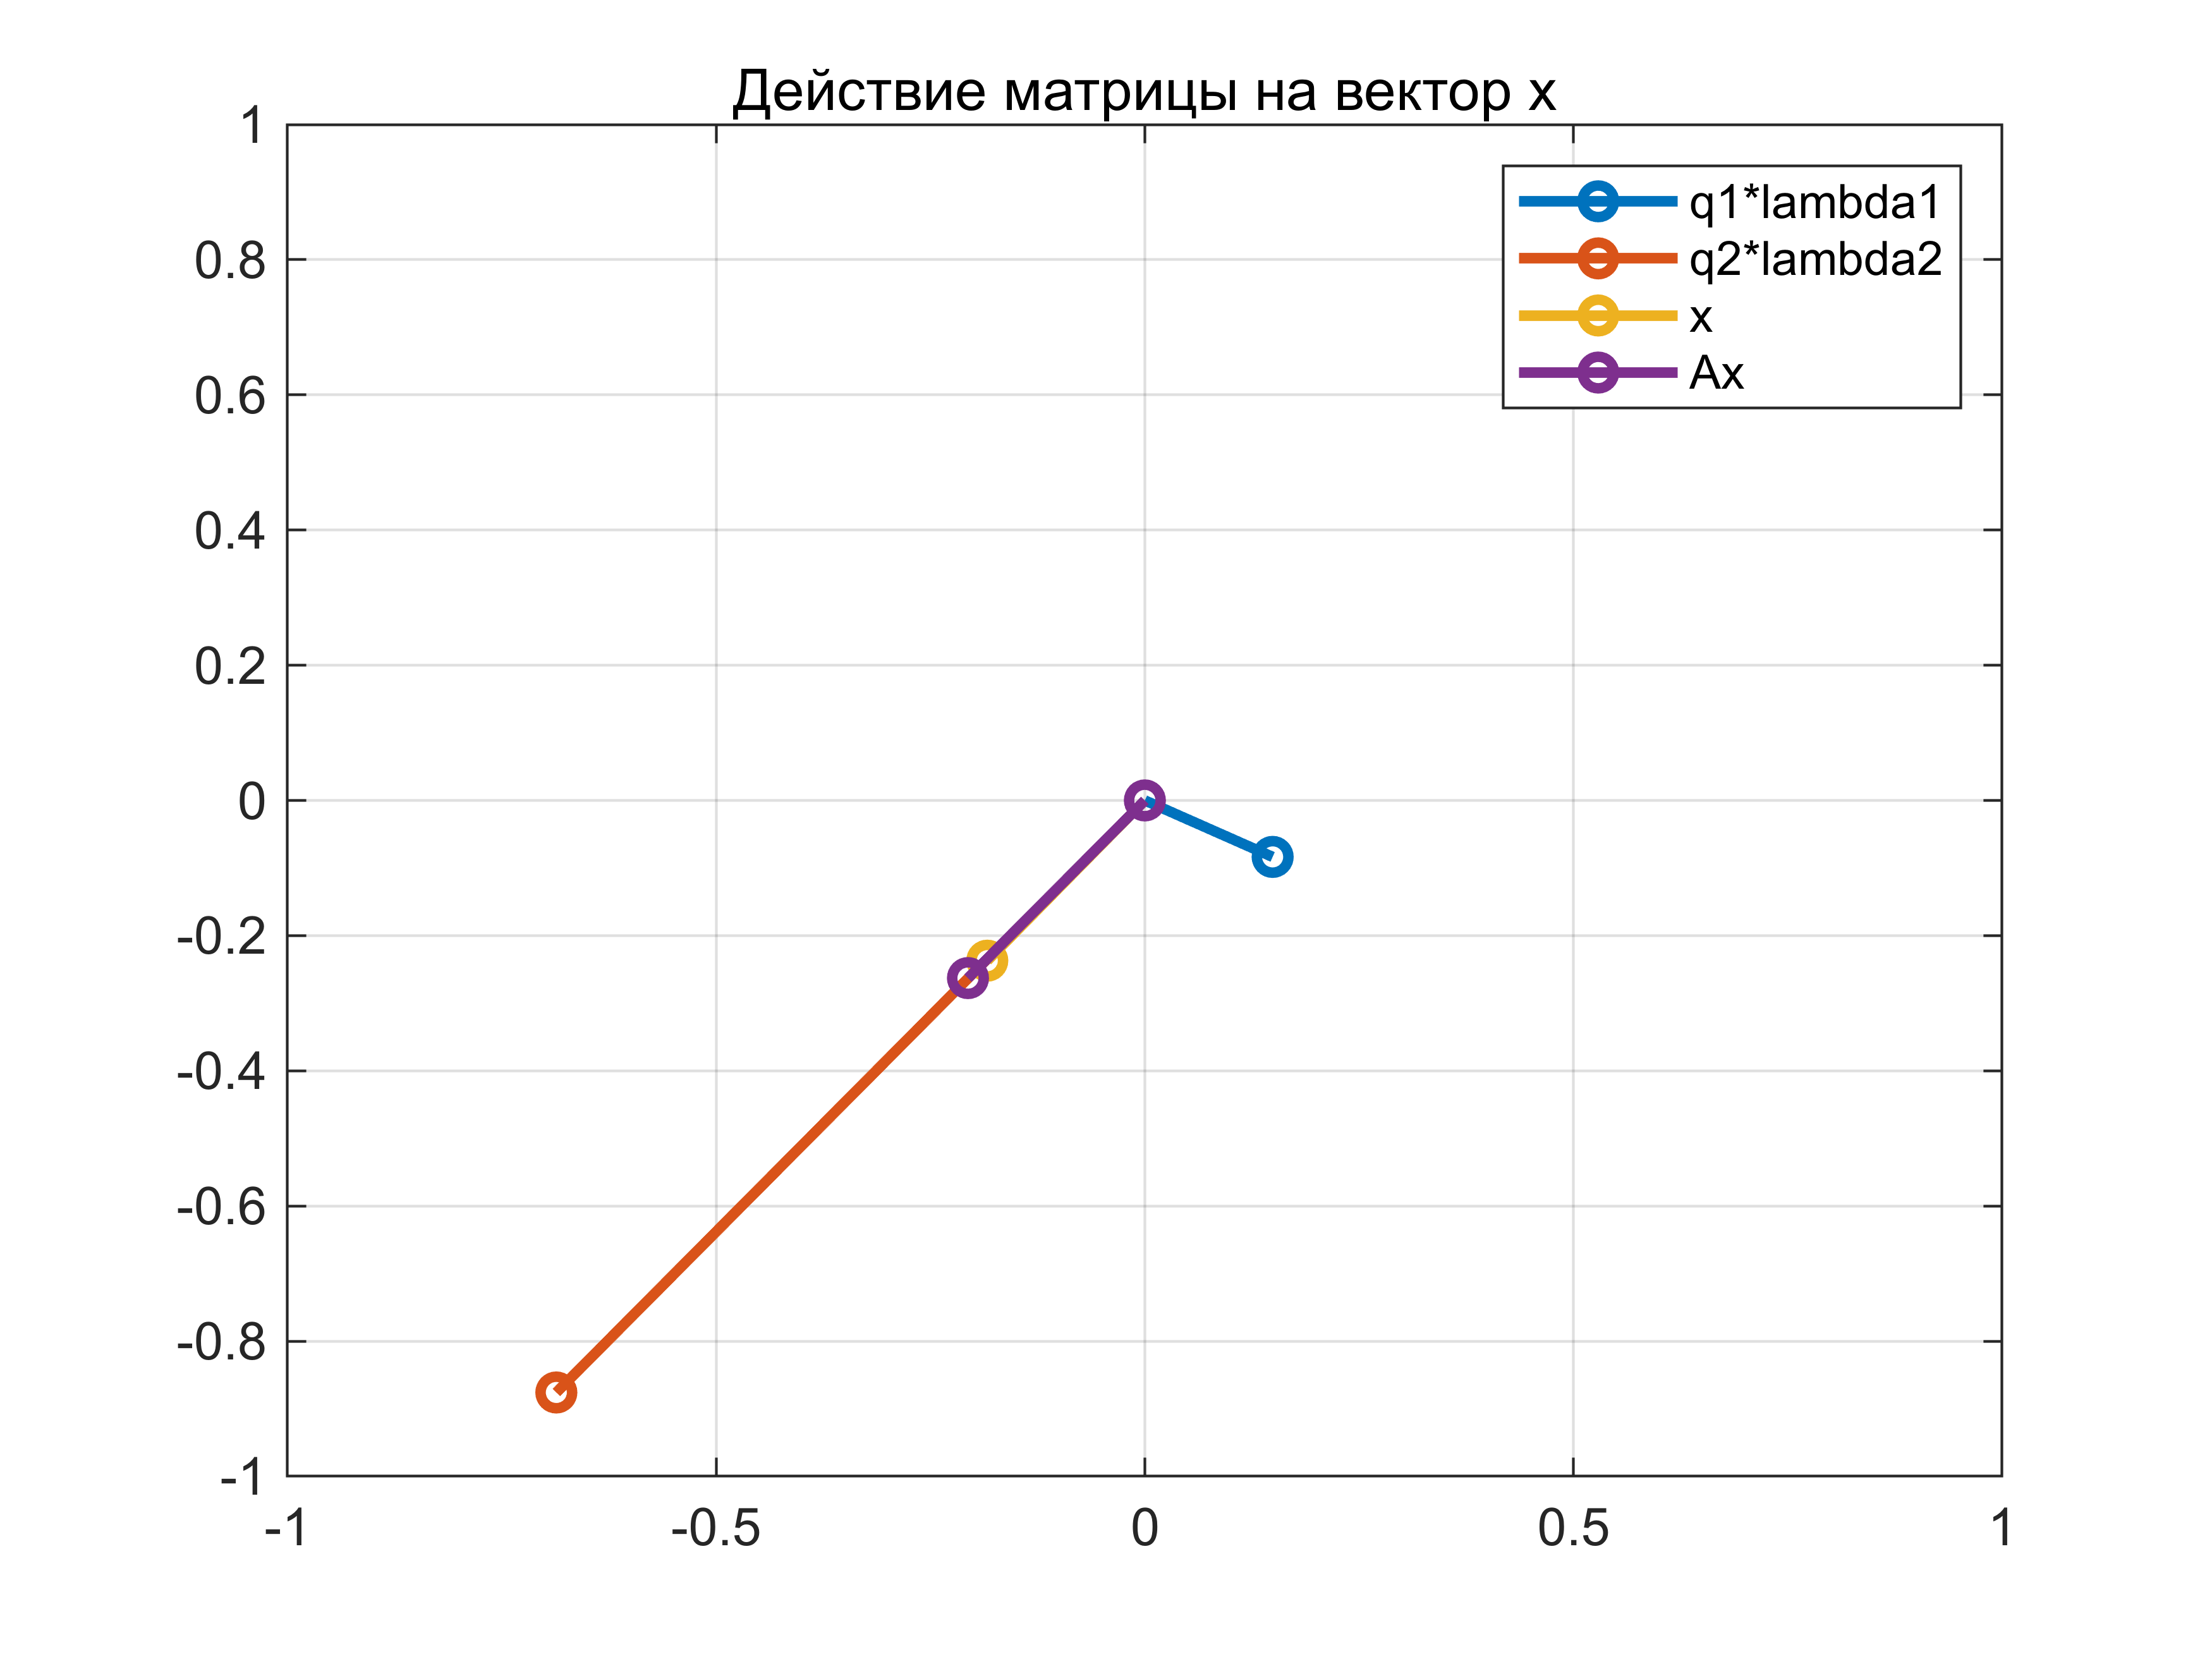

In [57]:
R =[-127.787;0.3];  % это вектор (в полярных координатах), на который будет действовать матрица A
% можно покрутить вектор, чтобы убедиться, что если он совпадает по направлению
% с собственным вектором, действие на него матрицы не меняет его
% направление
ang = deg2rad(R(1)); %угол вектора
module = R(2);% модуль вектора
x = [module*cos(ang);module*sin(ang)];
q1 = Q(:,1)*L(1);q2 = Q(:,2)*L(2);
draw_vector([],'Действие матрицы на вектор x',["q1*lambda1" "q2*lambda2" "x" "Ax"],"vector",q1,q2, x,A*x);

In [58]:
disp("угол между векторами A*x и x : "+ rad2deg(acos(x'*A*x/(norm(A*x)*norm(x)))) + " deg")

угол между векторами A*x и x : 0.34646 deg

In [59]:
disp("Q'*Q = ")

Q'*Q =

In [60]:
disp(transpose(Q)*Q)

1.0000    0.1532
    0.1532    1.0000


Спектральное разложение, незаменимо, когда нужны функции над матрицами:


$$A^2 =[P\Lambda P^{-1} ][P\Lambda P^{-1} ]=P[\begin{array}{ccc} \lambda_1^2  & \ldots & 0\newline  & \ddots  & \newline 0 & \ldots & \lambda_n^2  \end{array}]P^{-1}$$

Аналогично в общем виде:


$$\Psi (A)=P[\begin{array}{ccc} \Psi (\lambda_1 ) & \ldots & 0\newline  & \ddots  & \newline 0 & \ldots & \Psi (\lambda_n ) \end{array}]P^{-1}$$

 $\Psi$ \- функция от матрицы, представимая в виде степенных рядов (голоморфная?)

#### IV) Вторая факторизация. Сингулярное разложение матрицы:

Ищем такой набор взаимоортогональных векторов  $v_i$ единичной длины, что действие на них матицей $A$ переводит их в другой набор взаимоортогональных векторов $u_i$ :


$$A{\vec{v} }_i =\sigma_i {\vec{u} }_i$$

Или, в матричной форме:


$$AV=U\Sigma$$

Где $V=[{\vec{v} }_1 \ldots{\vec{v} }_n ],U=[{\vec{u} }_1 \ldots{\vec{u} }_m ]$ \- матрицы векторов


 $A=U\Sigma V^T$                                                                                                                                     (2)


 $[n\times m]=[n\times m]\cdot [n\times m]\cdot [m\times n]$ \- размерность в выражении (2)


В (2)   $U$ и $V$ \- ортонормированные матрицы сингулярных векторов, $\Sigma$ \- матрица сингулярных значений, все сингулярные значения больше нуля и отсортированы в порядке убывания


 Для ортонормированных матриц:  $V^T V=I$ , где $I$ \- единичная матрица, то есть транспонированная  ортонормированная матрица является обратной к самой себе $V^T =V^{-1}$ .


 $\Sigma =[\begin{array}{cccc} \sigma_1  & \ldots & 0 & \newline 0 & \ddots  & 0 & \newline \vdots  & \ldots & \sigma_m  & \newline 0 & \ldots & 0 & \newline \vdots  & \vdots  & \vdots  & \newline 0 & \ldots & 0 &  \end{array}]$ \- $m$ \- наименьшее измерение матрицы. $\sigma_i$ \- квадраты собственных значения матрицы $A^T \cdot A$ , а $U$ и $V$ \- матрицы собственных векторов матриц $A^T A$ и $AA^T$ соответственно.


Так как  недиагональная часть матрицы $\Sigma$  заполнена нулями, $\Sigma$ можно записать как  $\Sigma =[\begin{array}{ccc} \sigma_1  & \ldots & 0\newline \vdots  & \ddots  & \vdots \newline 0 & \ldots & \sigma_m  \end{array}]$


Важно, что сингулярные значения вдоль диагонали располагаюстя в порядке убывания


Геометрический смысл компонентов сигулярного разложения на примере двумерных матриц.


Картинка для пристального вглядывания:


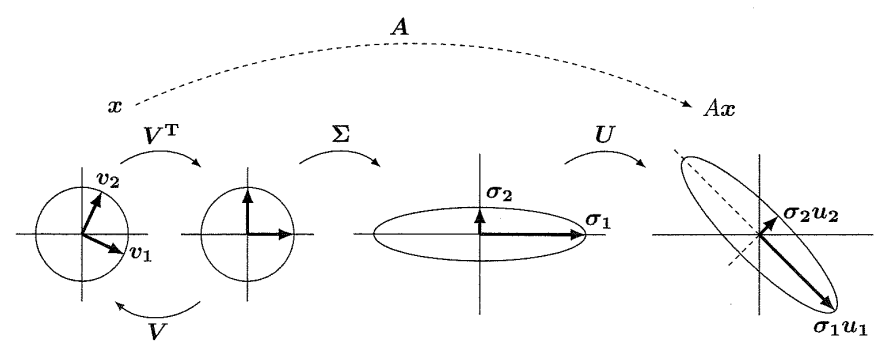


(G.Strang. Linear algebra and learning from data. MIT (2019))


Таким образом. Ортонормированные матрицы $U$ и $V$  \- это операции поворота. Диагональная матрица сингулярных значений характеризует масштабирование.


Чем больше разница между сингулярными значениями, тем более вытянут эллипс


$$A=U\Sigma V^T =\sum_{i=1}^m [\sigma_i {\vec{u} }_i {\vec{v} }_i^T ]=\sigma_1 {\vec{u} }_1 {\vec{v} }_1^T +...+\sigma_m {\vec{u} }_m {\vec{v} }_m^T$$

, где  ${\vec{u} }_i$ и ${\vec{v} }_i$ \- вектор\-столбцы матриц $U$ и $V$ .


Нужно обратить внимание, что ${\vec{u} }_i {\vec{v} }_i^T$ \- это внешнее произведение, то есть матрица (рангом один) с числом строк равным числу элементов первого вектора и числом колонок равным числу элементов второго вектора. То есть, сингулярное разложение представляет матрицу как сумму матриц того же размера, при этом "вклад" каждой из этих матриц пропорционален сингулярному значению.


Похоже на сумму операторов проецирования, хм...


Сингулярное разложение дает два ортонормированных базиса:


 $V$ \- базис пространства строк


 $U$ \- базис пространства столбцов

####  **Таким образом, сингулярное разложение, дает не только спектр, который характеризует степень сингулярности матрицы, но также и два ортонормированных базиса** $U$ и $V$ первый \- в пространстве столбцов, а второй \- в пространстве строк
#### Сингулярное разложение матриц в матлаб

In [61]:
% SVD разложение матрицы
clearvars
A = rand([5,3]) % матрица не квадратная, но для SVD это нормально!

A = 5x3    
    0.1576    0.1419    0.6557
    0.9706    0.4218    0.0357
    0.9572    0.9157    0.8491
    0.4854    0.7922    0.9340
    0.8003    0.9595    0.6787

In [62]:
[U,S,V] = svd(A)

U = 5x5    
   -0.2012   -0.4599    0.7532   -0.1948    0.3778
   -0.3163    0.7731    0.3895    0.3465    0.1748
   -0.5913    0.0357    0.1104   -0.3933   -0.6945
   -0.4768   -0.4311   -0.1654    0.7452   -0.0645
   -0.5315    0.0610   -0.4913   -0.3634    0.5834
S = 5x3    
    2.6602         0         0
         0    0.8187         0
         0         0    0.2873
         0         0         0
         0         0         0
V = 3x3    
   -0.5870    0.6737    0.4489
   -0.5981    0.0128   -0.8013
   -0.5456   -0.7389    0.3955

In [63]:
disp("U*U'= ")

U*U'=

In [64]:
disp(U*U') % ортонормированная матрица

1.0000   -0.0000   -0.0000    0.0000   -0.0000
   -0.0000    1.0000   -0.0000   -0.0000   -0.0000
   -0.0000   -0.0000    1.0000   -0.0000   -0.0000
    0.0000   -0.0000   -0.0000    1.0000    0.0000
   -0.0000   -0.0000   -0.0000    0.0000    1.0000

In [65]:
norm(U) % норма ортонормированной матрицы равна единце

ans = 1.0000

In [66]:
norm(A - U*S*V') % убеждаемся в правильности разложения

ans = 1.1560e-15

In [67]:
disp("A*v1:")

A*v1:

In [68]:
A*V(:,1) % действие матрицы на первый правый сингулярный вектор, дает первый левый сингулярный вектор умноженный на первое сингулярное значение

ans = 5x1    
   -0.5352
   -0.8415
   -1.5729
   -1.2683
   -1.4140

In [69]:
disp("u1*s1:")

u1*s1:

In [70]:
U(:,1)*S(1,1)

ans = 5x1    
   -0.5352
   -0.8415
   -1.5729
   -1.2683
   -1.4140

### V) Сингулярное разложение (SVD) VS Спектральное разложение (EIG)
1.   **SVD** применимо для любой матрицы, **EIG** только для квадратной
2. Сингулярные значения ( $\sigma_1 ...\sigma_n$ ) всегда положительны и действительны, собственные значения  ( $\lambda_1 ...\lambda_n$ ) положительны только для положительно определенной матрицы, в общем случае, даже действительной матрицы могут "уходить" в комплексное пространство
3. Сингулярные вектора ${\vec{u} }_1 \ldots{\vec{u} }_n$  и ${\vec{v} }_1 \ldots{\vec{v} }_n$ ортогональны и нормированы на единицу (то есть ${\vec{u} }_i \cdot {\vec{u} }_i ={\vec{u} }_i^T {\vec{u} }_i =\left\lbrace \begin{array}{c} \begin{array}{c} 1,i=j\newline 0,i\not= j \end{array}\end{array}\right.$ ), то есть матрицы  $U$ и $V$ \- ортонормированны. Собственные вектора ${\vec{p} }_1 \ldots{\vec{p} }_n$ \- не нормируются и ортогональны только для симметричной матрицы
4. Сингулярные значения ( $\sigma_1 ...\sigma_n$ ) отсортированы в порядке убывания, собственные значения ( $\lambda_1 ...\lambda_n$ ) не отсортированы
5. Для симметричной положительно определенной матрицы (например, такой как $C=AA^T$ ) , сингулярные значения равны квадратам соответсвующих собственных значений, левые и правые сингулярные вектора совпадают $V=U$ , сингулярные вектора совпадают по направлению с собственными векторами

Что быстрее SVD или EIG?


In [71]:
svd_test = @()svd(rand(1000));
eig_test = @()eig(rand(1000));
disp("svd_test:")

svd_test:

In [72]:
timeit(svd_test,3)

ans = 0.3852

In [73]:
disp("eig_test:")

eig_test:

In [74]:
timeit(eig_test,3)

ans = 0.9963

In [75]:
disp("SVD быстрее")

SVD быстрее


Действие матрицы на правый сингулярный вектор:


$$Av_1 =U\Sigma V^T \vec{v_1 } =\sum_{i=1}^m [\sigma_i {\vec{u} }_i {\vec{v} }_i^T ]\vec{v_1 } =\sum_{i=1}^m [\sigma_i {\vec{u} }_i {\vec{v} }_i^T \vec{v_1 } ]=\sigma_1 {\vec{u} }_1$$

Так как : $\sigma_i {\vec{u} }_i {\vec{v} }_i^T v_1 =\lbrace \begin{array}{c} 1:i=1\newline 0:i\not= 1 \end{array}$ вследствие ортогональности (и ортонормированности) сингулярных векторов.


In [76]:
clearvars

%M2x2 = 0.5 - rand(2)
M2x2 = [0.786,0.417;
    0.67,0.183]

M2x2 = 2x2    
    0.7860    0.4170
    0.6700    0.1830

In [77]:
[U,S,V] = svd(M2x2)

U = 2x2    
   -0.7901   -0.6130
   -0.6130    0.7901
S = 2x2    
1.1223         0
         0    0.1208
V = 2x2    
   -0.9193    0.3935
   -0.3935   -0.9193

fig6


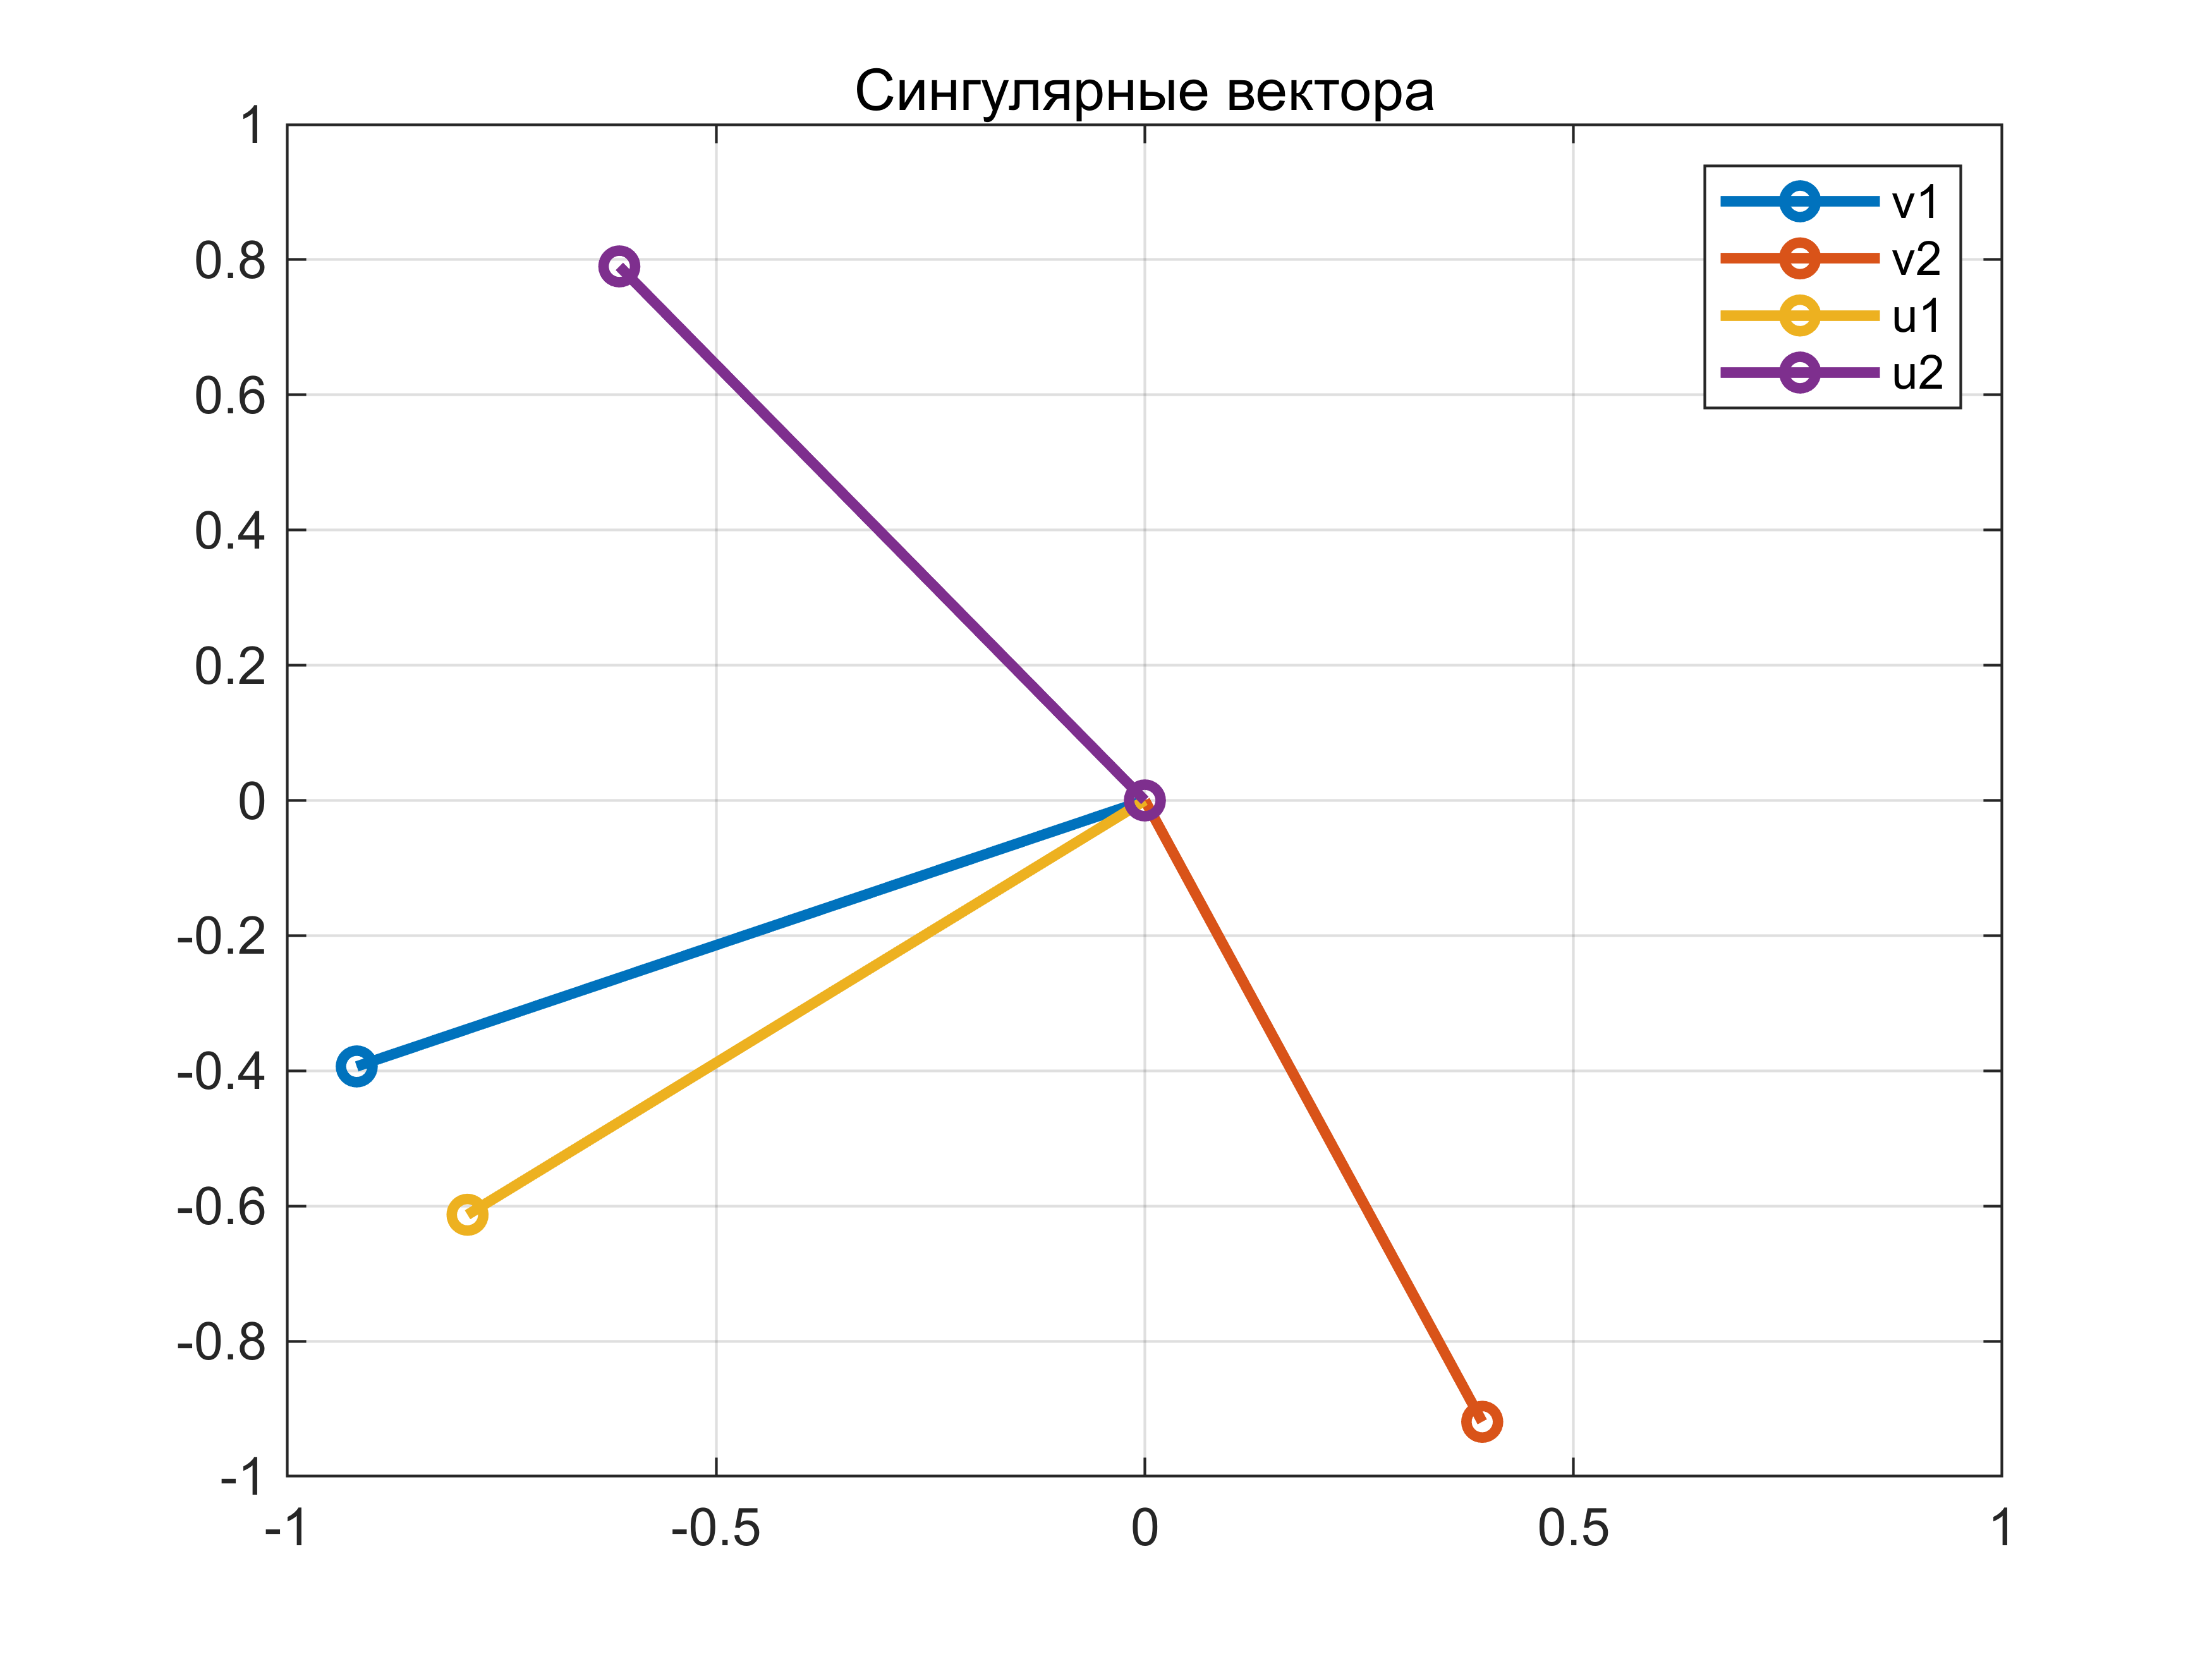

In [78]:
v1 =V(:,1);v2 = V(:,2);
u1 = U(:,1);u2 = U(:,2);
draw_vector([],'Сингулярные вектора',["v1" "v2" "u1" "u2"],"vector",v1,v2, u1,u2);

fig7


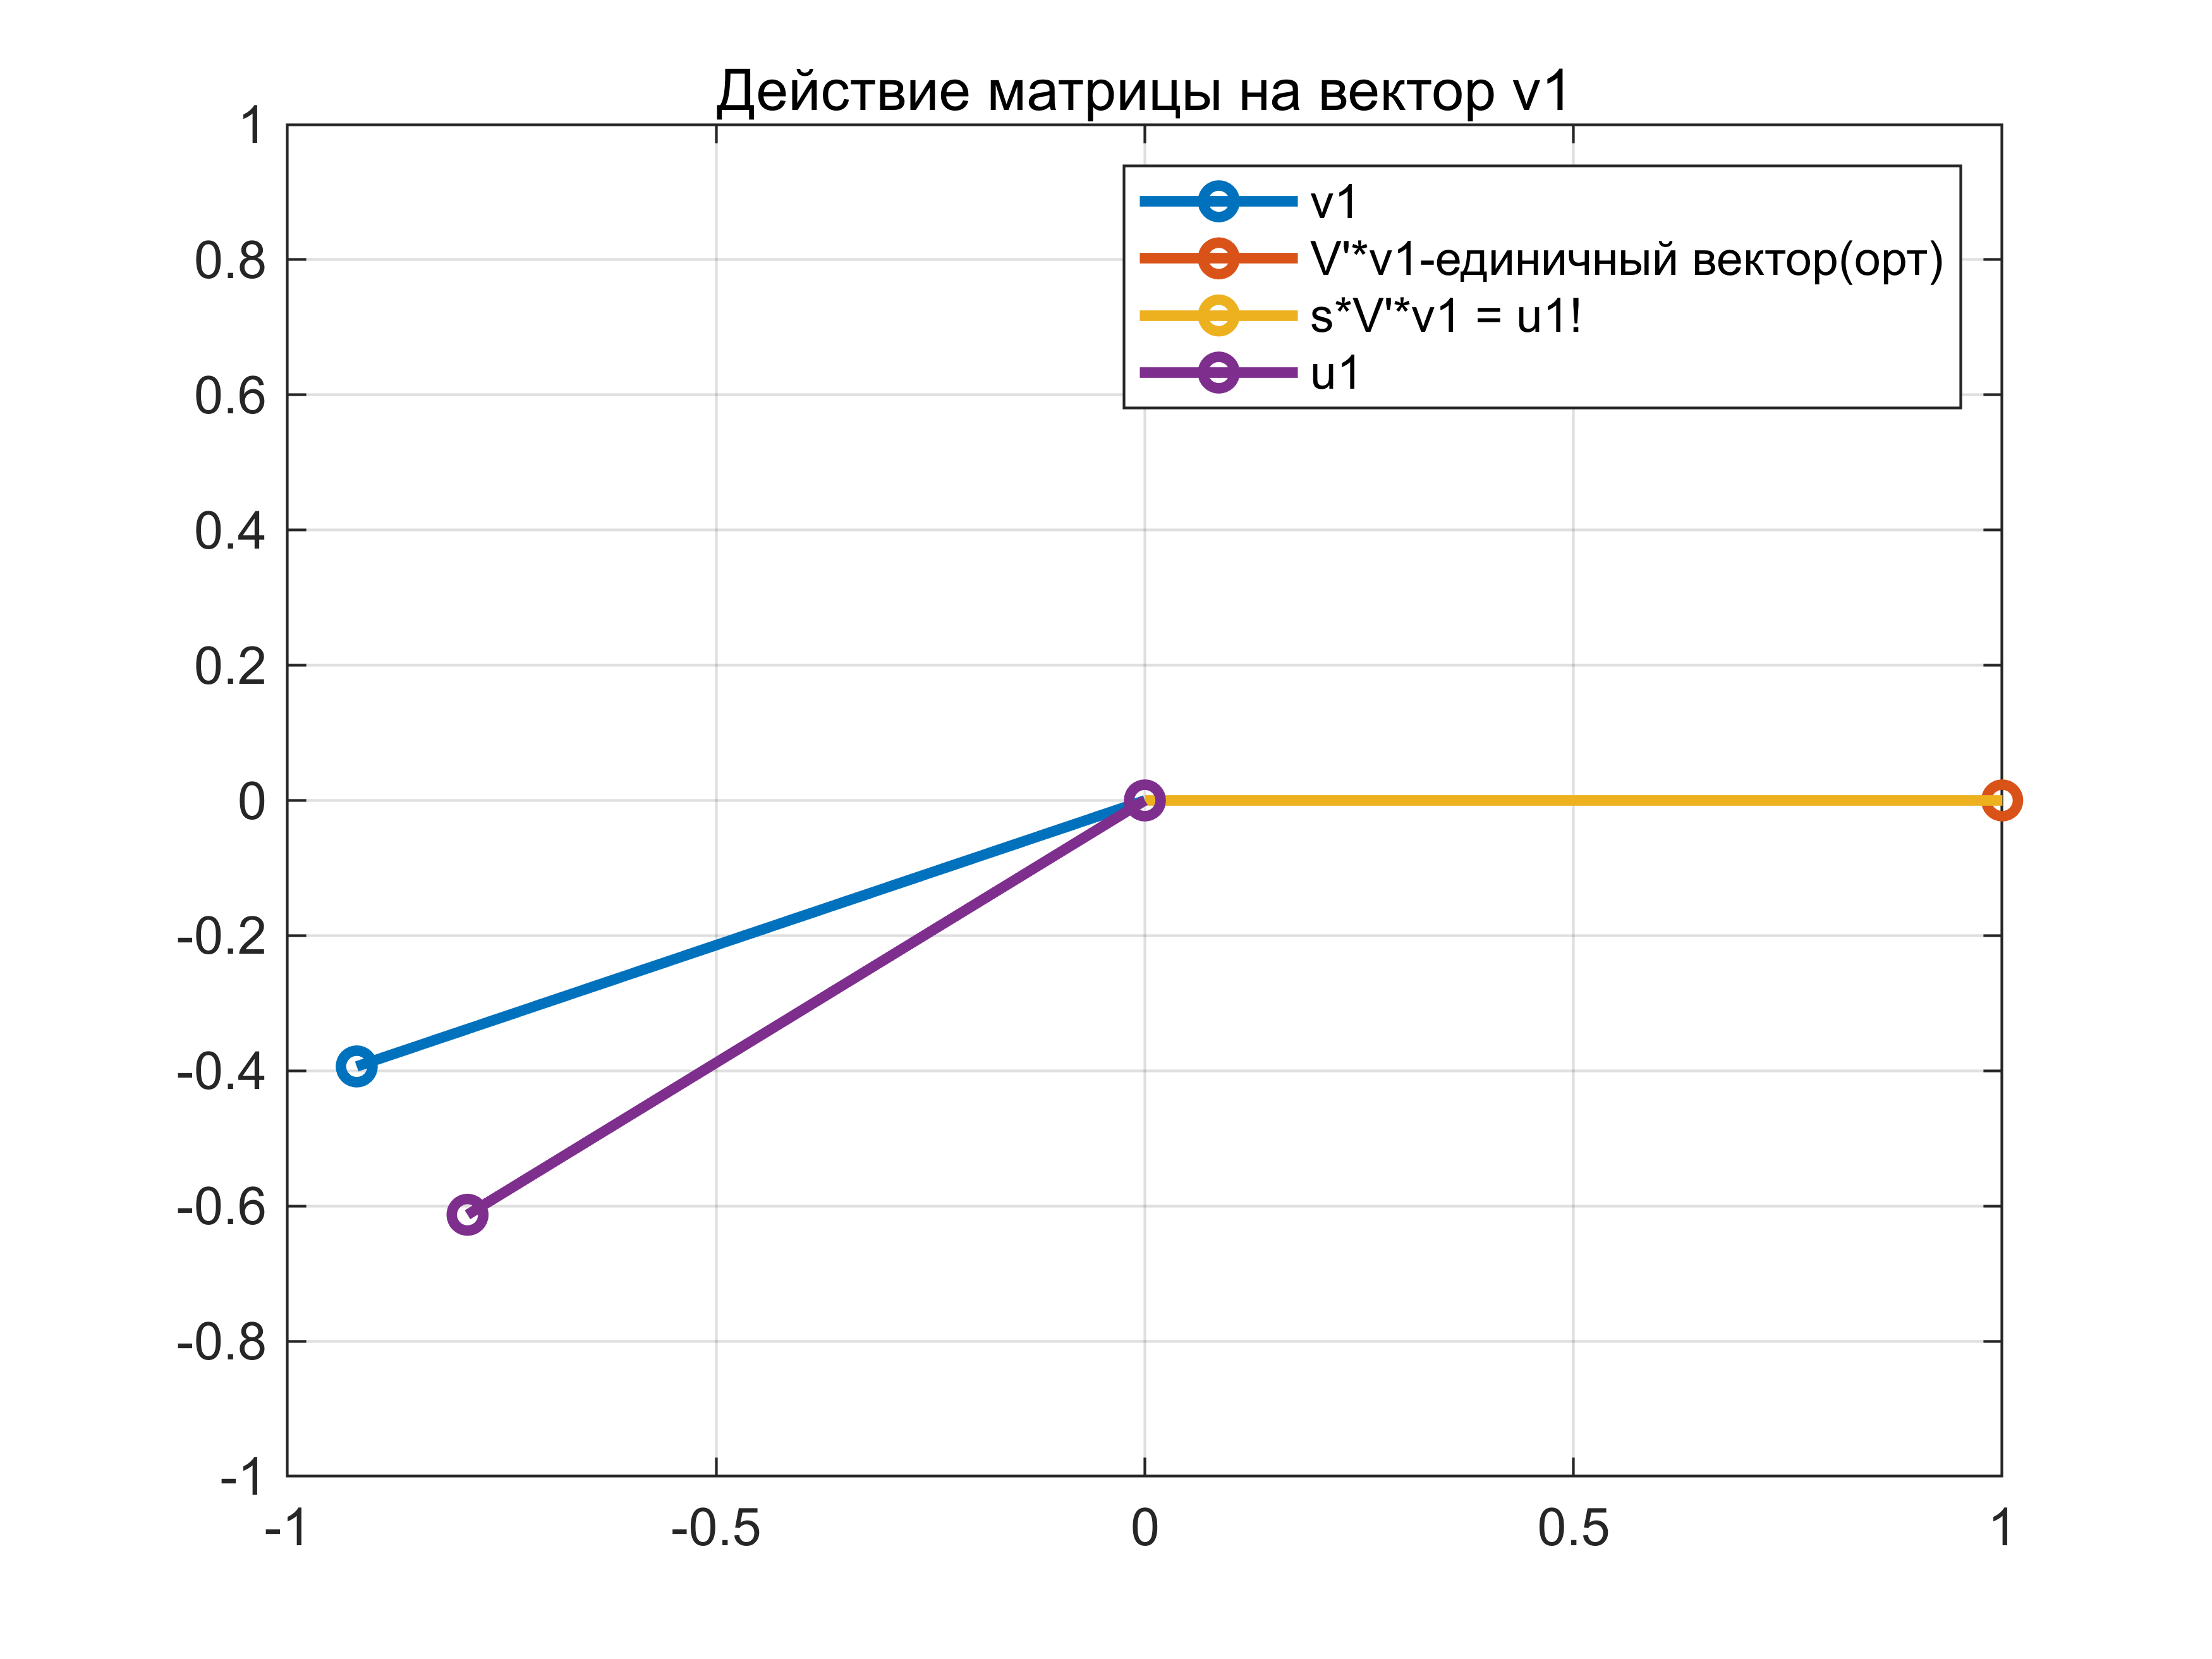

In [79]:
draw_vector([],'Действие матрицы на вектор v1', ...
    ["v1" "V'*v1-единичный вектор(орт)" "s*V'*v1 = u1!" "u1"],"vector",v1,V'*v1, S(1,1)*V'*v1,u1);

In [80]:
disp("|A*v1|/|u1| = " + norm(M2x2*v1)/norm(u1))

|A*v1|/|u1| = 1.1223

In [81]:
disp("S(1,1) = " + S(1,1))

S(1,1) = 1.1223

fig8


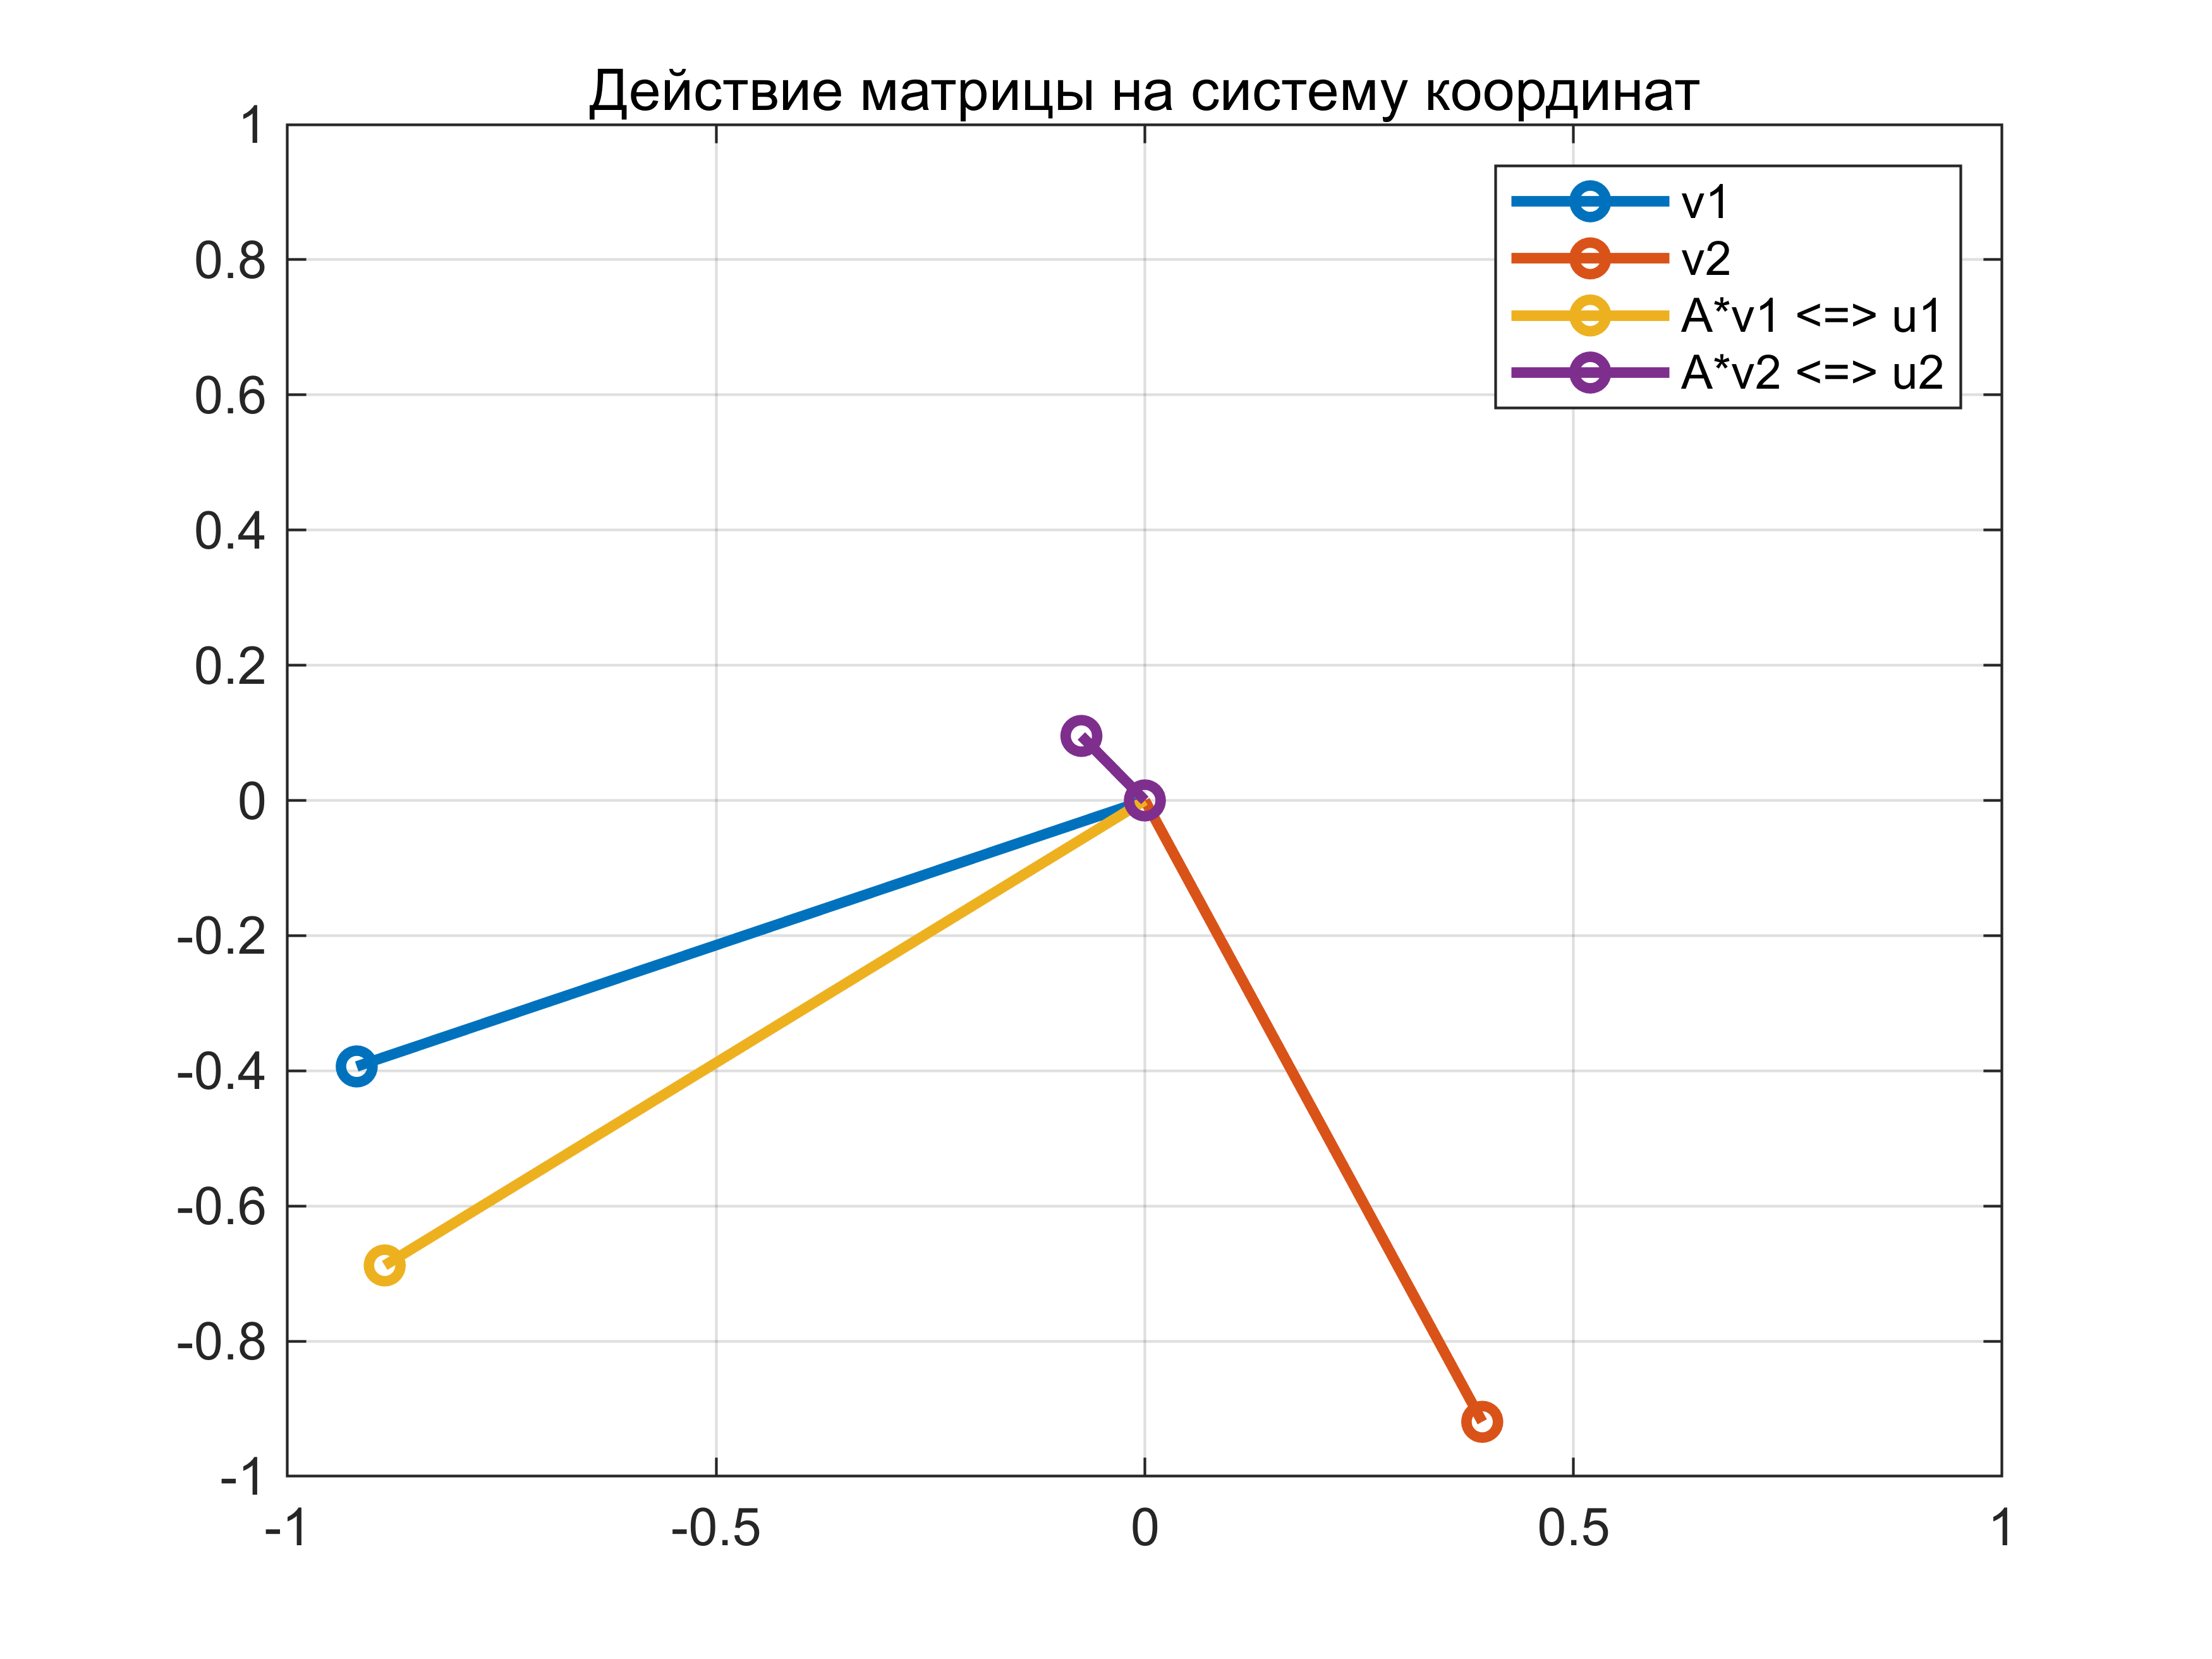

In [82]:
draw_vector([],"Действие матрицы на систему координат" , ...
    ["v1" "v2" "A*v1 <=> u1" "A*v2 <=> u2" ], ...
    "vector",v1,v2, M2x2*v1,M2x2*v2);

In [83]:
disp( "Вектор-столбцы матрицы V ортогональны: v1'*v2 = " + v1'*v2)

Вектор-столбцы матрицы V ортогональны: v1'*v2 = 0

In [84]:
disp( "Вектора (A*v1) и A*v2 тоже ортогональны: (A*v1)'*A*v2 = v1'*A'A*v2 = "+ transpose(M2x2*v1)*M2x2*v2)

Вектора (A*v1) и A*v2 тоже ортогональны: (A*v1)'*A*v2 = v1'*A'A*v2 = -5.5511e-17


Действие матрицы на некоторый произвольный  вектор:


Если вектор $\vec{x}$ $\in span\lbrace V\rbrace$ , то $\vec{x} =P_{v_1 } \vec{x} +...+P_{v_m } \vec{x} =\vec{v_1 } ({\vec{v_1 } }^T \vec{x} )+...+\vec{v_m } ({\vec{v_m } }^T \vec{x} )=x_1 \vec{v_1 } +...x_m \vec{v_m }$ ( $P_{v_i }$ \- операторы проецирования)


$$A\vec{x} =U\Sigma V^T \vec{x} =\sum_{i=1}^m [\sigma_i {\vec{u} }_i {\vec{v} }_i^T ][\sum_{i=1}^m [x_1 \vec{v_1 } +...x_m \vec{v_m } ]=\sum_{i=1}^m [\sigma_i x_i {\vec{u} }_i ]$$

Так как : $\sigma_i {\vec{u} }_i {\vec{v} }_i^T v_1 =\lbrace \begin{array}{c} 1:i=1\newline 0:i\not= 1 \end{array}$ вследствие ортогональности (и ортонормированности) сингулярных векторов.


In [85]:
R =[75.957;1]

R = 2x1    
   75.9570
1.0000

fig9


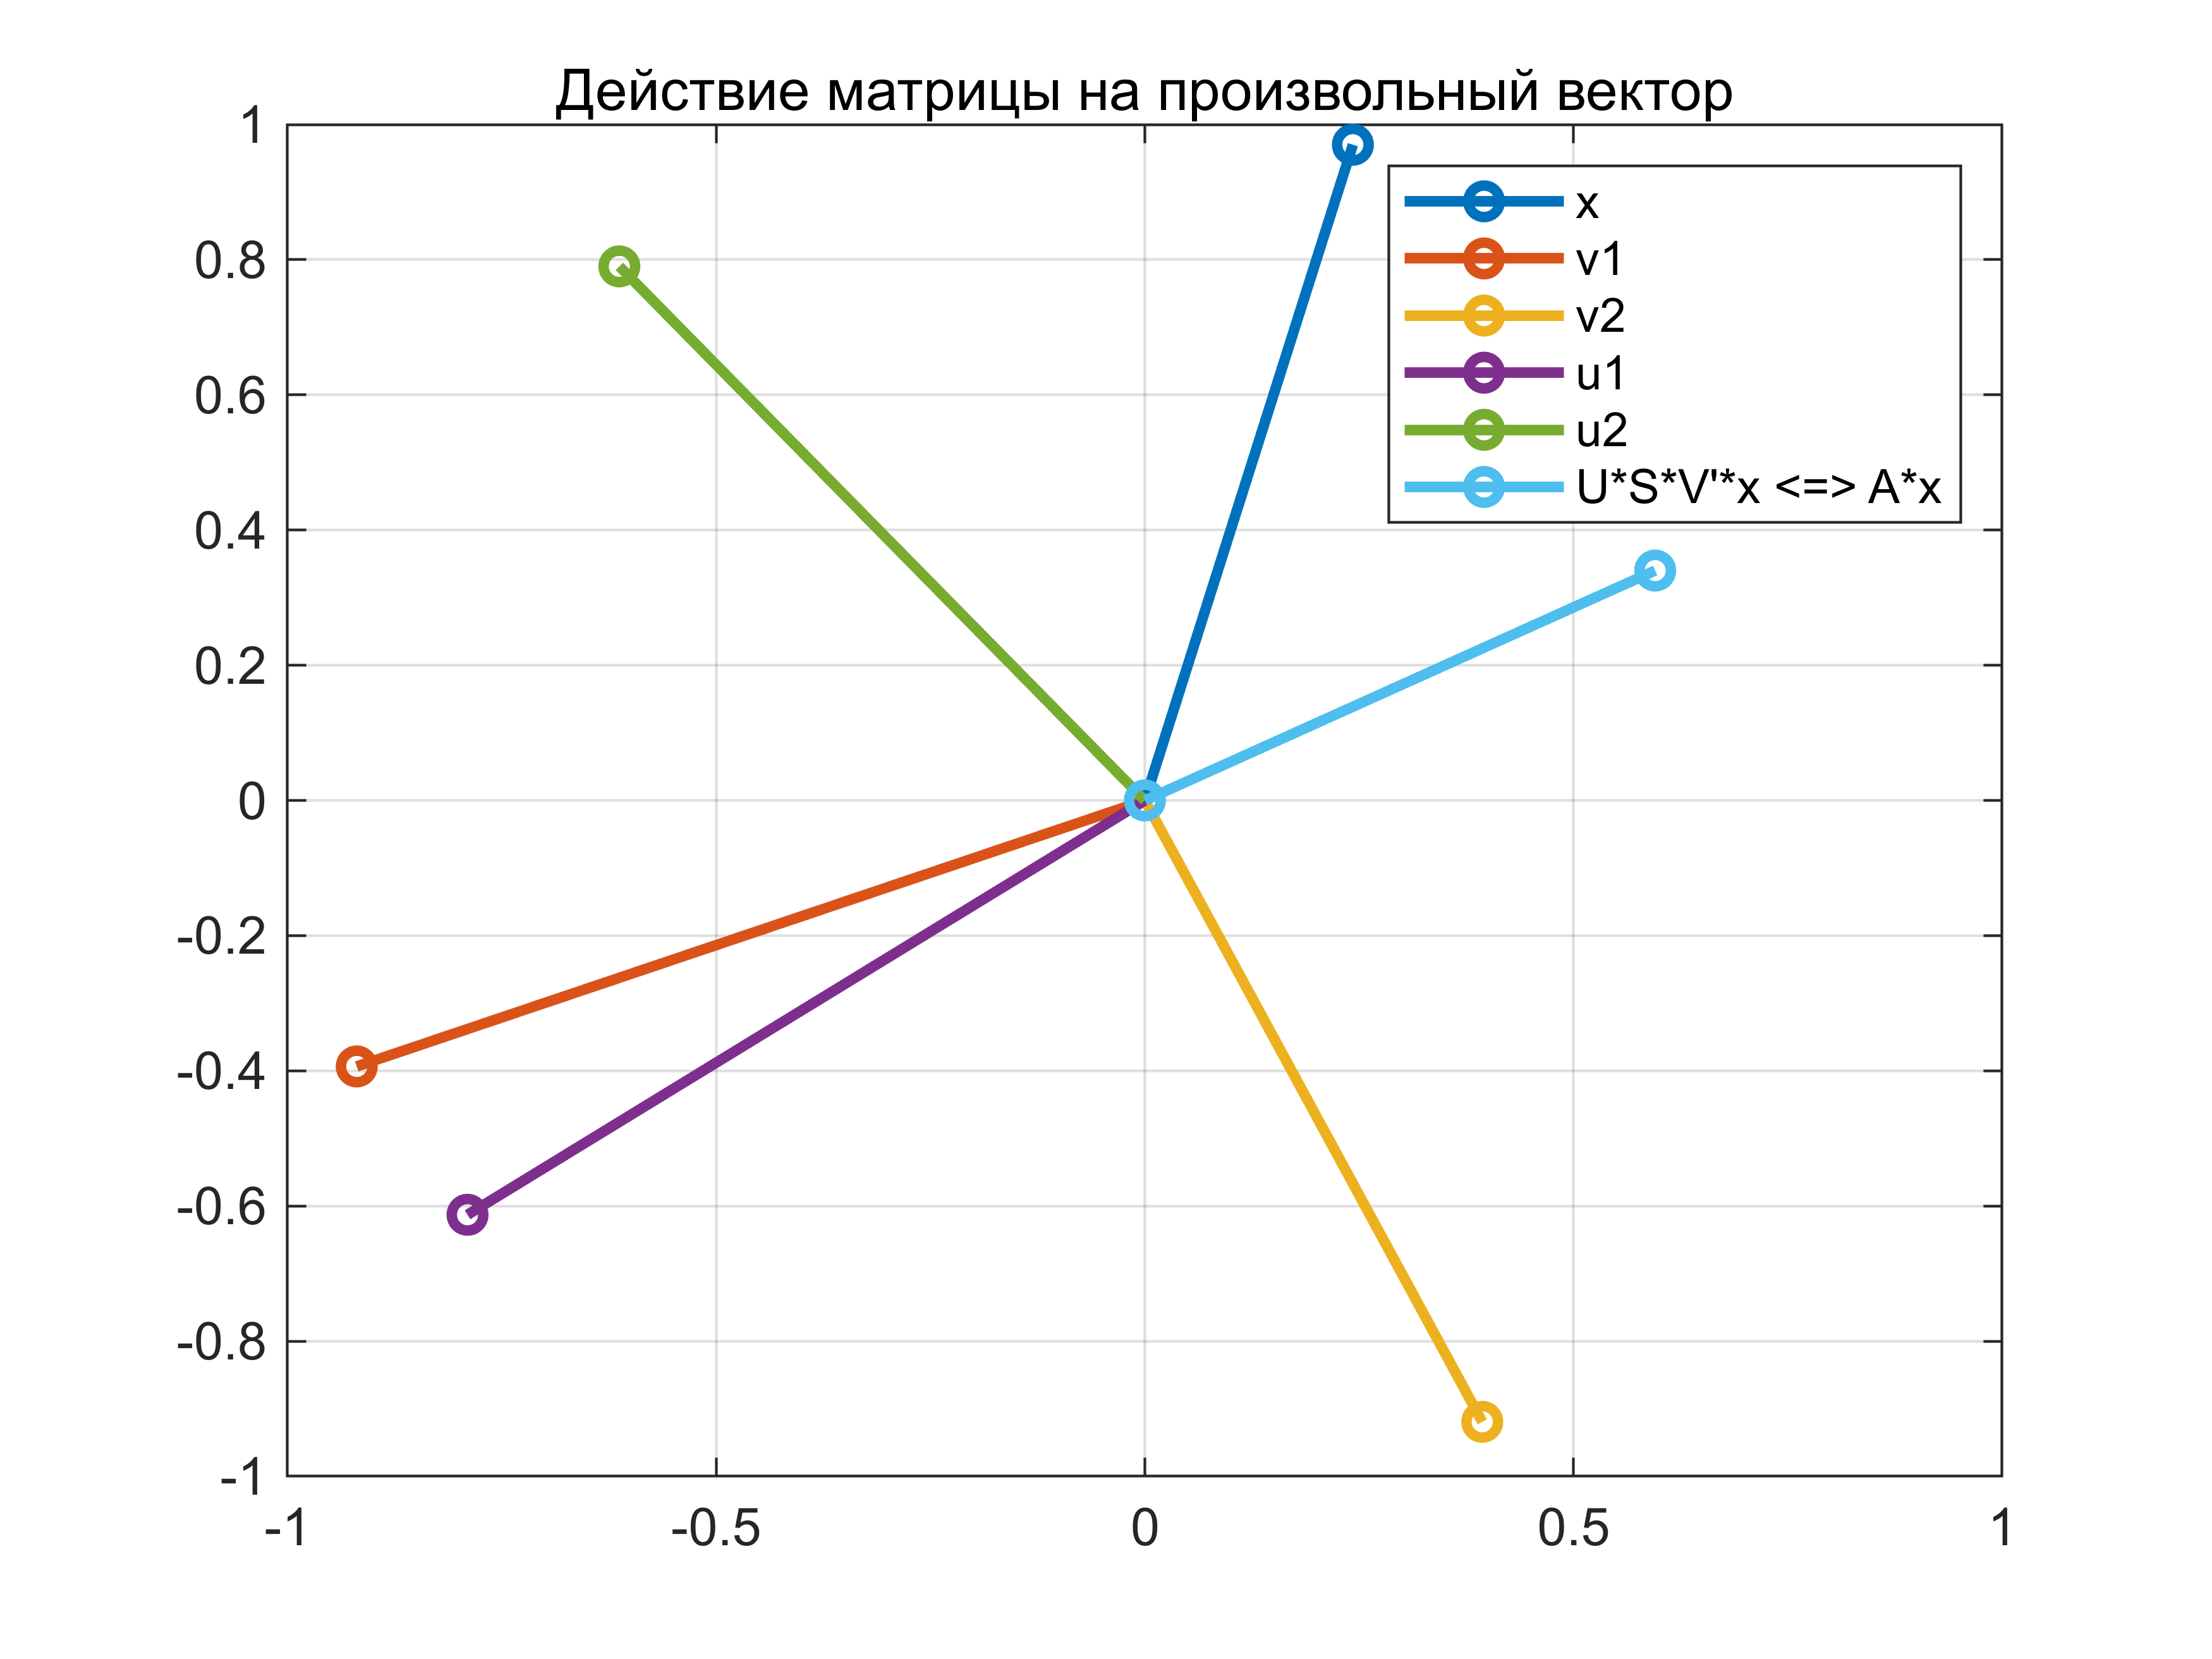

In [86]:
ang = deg2rad(R(1)); %угол вектора
module = R(2);% модуль вектора
x = [module*cos(ang);module*sin(ang)];
%draw_vector("Действие матрицы на произвольный вектор",["x" "v1" "v2" "u1" "u2" "V'*x" "S*V'*x" "U*S*V'*x <=> A*x"],x,v1,v2,u1,u2,v'*x, s*v'*x,u*s*v'*x);
draw_vector([],"Действие матрицы на произвольный вектор",["x" "v1" "v2" "u1" "u2" ...
    "U*S*V'*x <=> A*x"],"vector",x,v1,v2,u1,u2,U*S*V'*x);

In [87]:
cos_alfa = transpose(U*S*V'*x)*x;
cos_alfa = cos_alfa/(norm(U*S*V'*x)*norm(x));
disp("Скалярное произведение acos(alfa) = acos((x'*Ax)/(|x|*|Ax|)) = " + rad2deg(acos(cos_alfa)))

Скалярное произведение acos(alfa) = acos((x'*Ax)/(|x|*|Ax|)) = 46.2152

In [88]:
clearvars
% матрица диагональная
A = diag(rand(5,1))

A = 5x5    
    0.6302         0         0         0         0
         0    0.0953         0         0         0
         0         0    0.6620         0         0
         0         0         0    0.6232         0
         0         0         0         0    0.6833

In [89]:
svds(A)

ans = 5x1    
    0.6833
    0.6620
    0.6302
    0.6232
    0.0953

In [90]:
% матрица c большой асимметрией
A = eye(5);
A(5) = 1e6

A = 5x5    
           1           0           0           0           0
           0           1           0           0           0
           0           0           1           0           0
           0           0           0           1           0
     1000000           0           0           0           1

In [91]:
S = svds(A)

S = 5x1    
1.0e+06 *
1.0000
    0.0000
    0.0000
    0.0000
    0.0000

In [92]:
% Последнее сингулярное значение близко к нулю, почему так?


#### Немного  теорвера и матстата

У нас есть случаная переменная, которая может принимать некоторый (дискретный) набор возможных значений:


$$x\sim x_1 \ldotsx_N$$

Вероятность переменной иметь некоторое определенноей значение из этого дискретного набора характеризуется набором вероятностей:


 $P\sim p_1 \ldotsp_N$ , $\Sigma_i p_i =1$


Для некоторой случайно переменной, которая получается из некоторого распределения $P$ , математическое ожидание будет:


$$m=\mathbb{E}(x\sim P)=\Sigma_i p_i x_i$$

Среднее значение результатов набора из $M$ испытаний:


 $\mu =\frac{\Sigma_{j=1}^M x_j }{M}$ \- применяется для экспериментальной оценки мат. ожидания.


Разброс данных характеризуется вариацией:


$$\nu =\mathbb{E}[(x-m)^2 ]=\Sigma_i p_i (x_i -m)^2$$

Для экспериментальной оценки вариации:


$$\sigma =\frac{\Sigma_{j=1}^M (x_j -\mu )^2 }{M-1}$$

Если случаная величина характеризуется векторов, то есть состояний несколько, например, $[\begin{array}{c} x\newline y \end{array}]$ , каждая из компонент идет из своего распределения, то :


$$\sigma_x =\frac{\Sigma_{j=1}^M (x_j -\mu_x )^2 }{M-1},\sigma_y =\frac{\Sigma_{j=1}^M (y_j -\mu_y )^2 }{M-1}$$

Если есть две переменных, то появляется ковариация, которая характеризуется совместной вероятностью события с вектором состояний $[\begin{array}{c} x_i \newline y_j  \end{array}]$ .


$$\nu =\mathbb{E}[(x-\mathbb{E}[x])(y-\mathbb{E}[y])]=\Sigma_{ik} p_{ik} (x_i -m_x )(y_k -m_y )$$

 $p_{ik}$ \- совместная вероятность

#### Матрица ковариации:

 $\vec{X_1 } ...\vec{X_m } ...\vec{X_M }$ \- вектора результатов испытания (определения $N$ свойств)  "образца" размером $N\times 1$ каждый (вектора состояния некоторого случайного процесса).


 $M$ \- число испытаний, $N$ \- число свойств ( $N<M$ )


 $\vec{\mu} =\mu_1 ...\mu_n ...\mu_N$ \- средние  значения по всем испытаниям для каждого из свойств: $\mu_n =\frac{\sum_{i=1}^M x_{ni} }{M}$


In [93]:
clearvars
x1 = sym("x1",[2 1])

In [94]:
x2 = sym("x2",[2 1])

In [95]:
x3 = sym("x3",[2 1])

In [96]:
mu = sym("mu",[2,1])

In [97]:
% три измерения двух свойств N = 2, M = 3


Матрица матрица испытаний $[N\times M]$ :


 $A=[\vec{X_1 } -\vec{\mu} ,...,\vec{X_m } -\vec{\mu} ,...,\vec{X_N } -\vec{\mu} ]$ \- каждый столбец \- вектор результатов измерений (вектор состояния), смещенный на среднее значение ( $[...]$ \- операция конкатенации)


In [98]:
A = [x1-mu,x2-mu,x3-mu]


Экспериментальная оценка матрицы ковариации (симметричная матрица размером $N\times N$ ):


 $C=\frac{AA^T }{(M-1)}$                                                                                                                                 (3)


In [99]:
C = A*transpose(A)*sym("1/2")


Диагональные элементы матрицы $C_{nn}$ \- коэффициенты вариации ( $n=1...N$ ),  для  $n$ \- го  свойства : $C_{nn} =\frac{\sum_{i=1}^M (x_{ni} -\mu_n )^2 }{M-1}$


Если из диагональных элементов извлечь корень и поделить на количество экспериментов $L$ , то получим стандартное отклонение среднего арифметического.


Элементы матрицы $C$ , стоящие вне диагонали, \-  коэффициенты ковариации   $n$ \- го  и $m$ \- го свойств: $C_{nk} =\frac{\sum_{i=1}^M [(x_{ni} -\mu_n )(x_{ki} -\mu_k )]}{M-1}$ ( $n,k=1...N,n\not= k$ )


Эти формулы понятнее, если посмотреть не на матрицу $A$ , на транспонированную матрицу $B=A^T$ , в матрице $B$ , каждый столбец ( ${\vec{b} }_n$ ), размером $[M\times 1]$  будет соответствовать какому\-то свойству, измеренному $M$ раз. Тогда вектор средних $\vec{\mu}$ \- это вектор средних значений по каждому из столбцов.


То есть, хотя табличка данных одна и та же в зависимости от того как на нее смотреть ее интерпретация различна:


матрица $A$ \- это набор испытаний, в каждом из которых был определен некоторый набор свойств,


матрица $B=A^T$ \- это набор свойств, для каждого из которых было выполнено некоторое число испытаний.


In [100]:
B = transpose(A)

In [101]:
b1 = B(:,1)

In [102]:
b2 = B(:,2)


В соответствии с (3), матрица ковариации через матрицу свойств $B$ выражается в виде:


 $C=AA^T /(M-1)=B^T B/(M-1)$                                                                                                                               (4)


То есть, диагональные элементы матрицы ковариации (вариация) $C_{nn} =\frac{{\vec{b} }_n^T {\vec{b} }_n }{M-1}$ \- это просто скалярное произведение столбца матрицы $B$ самого на себя, а элементы, стоящие вне диагонали \- это скалярные произведения различных столбцов матрицы $B$ :  $C_{nk} =\frac{{\vec{b} }_n^T {\vec{b} }_k }{M-1}$ скалярное произведение двух векторов характеризует то насколько один вектор "отстоит" от другого, по сути это проекция одного вектора на другой. Если оба вектора единичные по амплитуде, то это косинус угла между ними. Если скалярное произведение равно нулю, то вектора сонаправлены, то есть максимально "зависимы".


In [103]:
C_b = transpose(B)*B

#### Спектральное разложение матрицы ковариации <=> сингулярное разложение матрицы измерений:

Пусть матрица измерений $A$ имеет следующее сингулярное разложение:


$$A=U\Sigma V^T$$

 Тогда матрица ковариации может быть представлена в виде:


 $C=AA^T =(U\Sigma V^T )(U\Sigma V^T )^T =(U\Sigma V^T )(V\Sigma U^T )=U\Sigma^2 U^T$                                                                                                                     (5)


$$C=U\Sigma^2 U^T =U\Sigma^2 U^{-1}$$

 $C=P\Lambda P^{-1}$ \- спектральное разложение матрицы ковариации


Столбцы матрицы собственных векторов не ортонормированы, однако, для симметричной положительно определенной матрицы $C$ , которой является матрица ковариации, они ортогональны, то есть: $P^{-1} =P^T$ , таким образом, левые сингулярные вектора матрицы испытаний есть нормированные собственные вектора матрицы ковариации, а собственные значения \- квадраты сингулярных значений.

#### <u>Пример</u> корреляции при бросании двух монеток.

Испытание \- однократное бросание двух монеток (вектор состояния системы из двух монеток \-1/2 \- решка, +1/2 \- орел).


Свойство \- состояние одной монетки.


Если монетки некоррелированы, то в каждом испытании состояние каждой из монет не зависит от состояния другой.


Монетки максимально коррелированы, когда одна приклеена к другой.:


In [104]:
clearvars
points_number = 500; % число бросаний
% монетки независимы друг от друга
first_coin = (rand(points_number,1)>=0.5) - 0.5; % +-1/2 орел/решка, среднее - ноль
second_coin = (rand(points_number,1)>=0.5) -0.5;
disp("Матрица испытаний для независимых монет: ")

Матрица испытаний для независимых монет:

In [105]:
A = transpose([first_coin-mean(first_coin),second_coin-mean(second_coin)]) % матрица испытаний

A = 2x500    
   -0.5240   -0.5240    0.4760    0.4760    0.4760    0.4760   -0.5240    0.4760   -0.5240    0.4760    0.4760    0.4760   -0.5240   -0.5240    0.4760   -0.5240   -0.5240   -0.5240   -0.5240    0.4760   -0.5240   -0.5240   -0.5240    0.4760   -0.5240    0.4760   -0.5240    0.4760    0.4760    0.4760    0.4760   -0.5240   -0.5240   -0.5240    0.4760   -0.5240   -0.5240   -0.5240   -0.5240    0.4760   -0.5240    0.4760    0.4760   -0.5240   -0.5240    0.4760    0.4760   -0.5240   -0.5240    0.4760
    0.5180   -0.4820    0.5180   -0.4820   -0.4820   -0.4820   -0.4820   -0.4820   -0.4820   -0.4820    0.5180   -0.4820   -0.4820   -0.4820   -0.4820   -0.4820   -0.4820    0.5180    0.5180   -0.4820   -0.4820   -0.4820   -0.4820    0.5180    0.5180    0.5180   -0.4820    0.5180   -0.4820    0.5180    0.5180   -0.4820    0.5180   -0.4820    0.5180    0.5180   -0.4820   -0.4820   -0.4820    0.5180    0.5180    0.5180   -0.4820    0.5180   -0.4820    0.5180   -0.4820    0.5180   -0

In [106]:
disp("Матрица свойств: ")

Матрица свойств:

In [107]:
B = A' % матрица свойтсв

B = 500x2    
   -0.5240    0.5180
   -0.5240   -0.4820
    0.4760    0.5180
    0.4760   -0.4820
    0.4760   -0.4820
    0.4760   -0.4820
   -0.5240   -0.4820
    0.4760   -0.4820
   -0.5240   -0.4820
    0.4760   -0.4820

In [108]:
ncorrelated_coins_covariance_matrix = transpose([first_coin,second_coin])*[first_coin,second_coin]/(points_number-1);
disp("Монетки бросаются независимо друг от друга:")

Монетки бросаются независимо друг от друга:

In [109]:
disp(ncorrelated_coins_covariance_matrix)

    0.2505    0.0030
    0.0030    0.2505

In [110]:
disp("Матрица ковариации близка к диагональной - максимально несингулярна, колонки полностью независимы")

Матрица ковариации близка к диагональной - максимально несингулярна, колонки полностью независимы

In [111]:
% монетки приклеены друг к другу одноименными концами
first_coin_dependent = (rand(points_number,1)>=0.5) - 0.5;
first_coin_dependent = first_coin_dependent-mean(first_coin_dependent);
disp("Матрица испытаний для склееных монет: ")

Матрица испытаний для склееных монет:

In [112]:
Acor=transpose([first_coin_dependent,first_coin_dependent]) % матрица испытаний

Acor = 2x500    
    0.4940   -0.5060    0.4940   -0.5060    0.4940    0.4940    0.4940   -0.5060    0.4940    0.4940    0.4940   -0.5060    0.4940    0.4940   -0.5060   -0.5060    0.4940   -0.5060    0.4940    0.4940    0.4940    0.4940    0.4940   -0.5060   -0.5060    0.4940    0.4940    0.4940   -0.5060    0.4940    0.4940   -0.5060    0.4940   -0.5060    0.4940   -0.5060    0.4940    0.4940   -0.5060   -0.5060    0.4940   -0.5060   -0.5060   -0.5060    0.4940   -0.5060    0.4940    0.4940   -0.5060   -0.5060
    0.4940   -0.5060    0.4940   -0.5060    0.4940    0.4940    0.4940   -0.5060    0.4940    0.4940    0.4940   -0.5060    0.4940    0.4940   -0.5060   -0.5060    0.4940   -0.5060    0.4940    0.4940    0.4940    0.4940    0.4940   -0.5060   -0.5060    0.4940    0.4940    0.4940   -0.5060    0.4940    0.4940   -0.5060    0.4940   -0.5060    0.4940   -0.5060    0.4940    0.4940   -0.5060   -0.5060    0.4940   -0.5060   -0.5060   -0.5060    0.4940   -0.5060    0.4940    0.4940  

In [113]:

correlated_coins_covariance_matrix = transpose([first_coin_dependent,first_coin_dependent])*[first_coin_dependent,first_coin_dependent]/(points_number-1);
disp("Монетки склеены одноименными концами, матрица ковариации:")

Монетки склеены одноименными концами, матрица ковариации:

In [114]:
disp(correlated_coins_covariance_matrix)

    0.2505    0.2505
    0.2505    0.2505

In [115]:

disp("Матрица ковариации сингулярна, так как колонки одинаковы, то есть линейно зависимы")

Матрица ковариации сингулярна, так как колонки одинаковы, то есть линейно зависимы

In [116]:

disp("Сингулярное разложение матрицы ковариации для независимых монеток")

Сингулярное разложение матрицы ковариации для независимых монеток

In [117]:
[U,S] = svd(A)

U = 2x2    
    0.6940   -0.7200
    0.7200    0.6940
S = 2x500    
   11.2469         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0
         0   11.0931         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0 

In [118]:
disp("Спектральное разложение матрицы ковариации для независимых монеток")

Спектральное разложение матрицы ковариации для независимых монеток

In [119]:
[Q,L] = eig(A*A')

Q = 2x2    
   -0.7200    0.6940
    0.6940    0.7200
L = 2x2    
  123.0578         0
         0  126.4922

In [120]:
disp("Сингулярное разложение матрицы ковариации для склееных монеток")

Сингулярное разложение матрицы ковариации для склееных монеток

In [121]:
[U,S] = svd(Acor)

U = 2x2    
   -0.7071    0.7071
   -0.7071   -0.7071
S = 2x500    
   15.8102         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0
         0    0.0000         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0 

In [122]:
disp("Спектральное разложение матрицы ковариации для склееных монеток")

Спектральное разложение матрицы ковариации для склееных монеток

In [123]:
[Q,L] = eig(Acor*Acor')

Q = 2x2    
   -0.7071    0.7071
    0.7071    0.7071
L = 2x2    
         0         0
         0  249.9640

## Примеры использования
### Пример использования  \- детерминированные данные: колебание грузика на пружине и два датчика

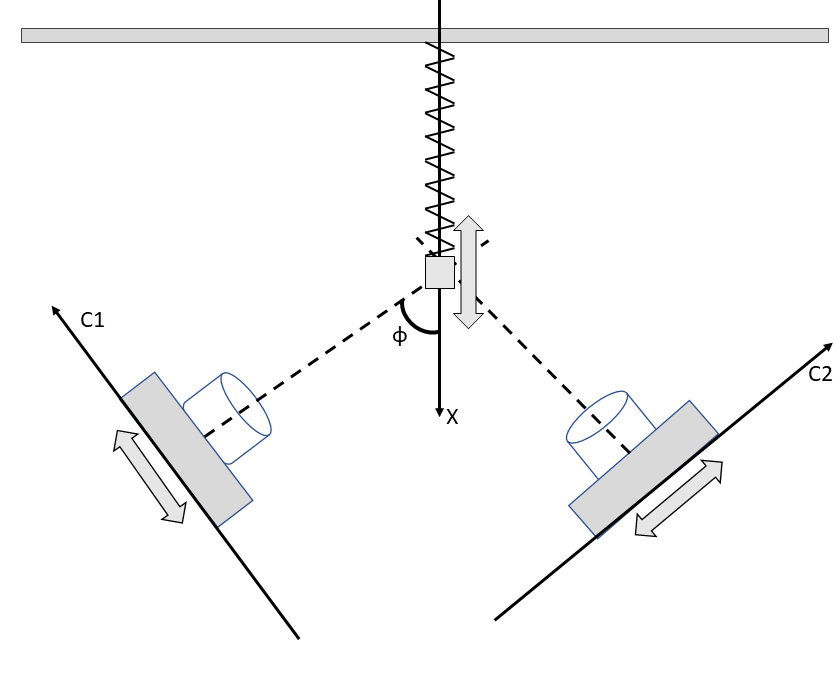


In [124]:
clearvars
t = linspace(-pi,pi,100) % фаза движения

t = 1x100    
   -3.1416   -3.0781   -3.0147   -2.9512   -2.8877   -2.8243   -2.7608   -2.6973   -2.6339   -2.5704   -2.5069   -2.4435   -2.3800   -2.3165   -2.2531   -2.1896   -2.1261   -2.0627   -1.9992   -1.9357   -1.8723   -1.8088   -1.7453   -1.6819   -1.6184   -1.5549   -1.4915   -1.4280   -1.3645   -1.3011   -1.2376   -1.1741   -1.1107   -1.0472   -0.9837   -0.9203   -0.8568   -0.7933   -0.7299   -0.6664   -0.6029   -0.5395   -0.4760   -0.4125   -0.3491   -0.2856   -0.2221   -0.1587   -0.0952   -0.0317

In [125]:
X = cos(t) % закон движения грузика на пружине

X = 1x100    
   -1.0000   -0.9980   -0.9920   -0.9819   -0.9679   -0.9501   -0.9284   -0.9029   -0.8738   -0.8413   -0.8053   -0.7660   -0.7237   -0.6785   -0.6306   -0.5801   -0.5272   -0.4723   -0.4154   -0.3569   -0.2969   -0.2358   -0.1736   -0.1108   -0.0476    0.0159    0.0792    0.1423    0.2048    0.2665    0.3271    0.3863    0.4441    0.5000    0.5539    0.6056    0.6549    0.7015    0.7453    0.7861    0.8237    0.8580    0.8888    0.9161    0.9397    0.9595    0.9754    0.9874    0.9955    0.9995

In [126]:
phi = 30; % угол ориентации камер относительно оси колебания грузика
c1 = X*cosd(phi); % показания камеры 1
c2=X*sind(phi); % показания камеры 2
A=[c1;c2] % матрица эксперимента

A = 2x100    
   -0.8660   -0.8643   -0.8591   -0.8504   -0.8383   -0.8228   -0.8040   -0.7820   -0.7568   -0.7285   -0.6974   -0.6634   -0.6268   -0.5876   -0.5461   -0.5023   -0.4566   -0.4090   -0.3598   -0.3091   -0.2571   -0.2042   -0.1504   -0.0960   -0.0412    0.0137    0.0686    0.1232    0.1774    0.2308    0.2832    0.3346    0.3846    0.4330    0.4797    0.5245    0.5671    0.6075    0.6454    0.6807    0.7133    0.7430    0.7698    0.7934    0.8138    0.8309    0.8447    0.8551    0.8621    0.8656
   -0.5000   -0.4990   -0.4960   -0.4910   -0.4840   -0.4750   -0.4642   -0.4515   -0.4369   -0.4206   -0.4026   -0.3830   -0.3619   -0.3393   -0.3153   -0.2900   -0.2636   -0.2361   -0.2077   -0.1784   -0.1485   -0.1179   -0.0868   -0.0554   -0.0238    0.0079    0.0396    0.0712    0.1024    0.1332    0.1635    0.1932    0.2220    0.2500    0.2770    0.3028    0.3274    0.3507    0.3726    0.3930    0.4118    0.4290    0.4444    0.4581    0.4698    0.4797    0.4877    0.4937    0


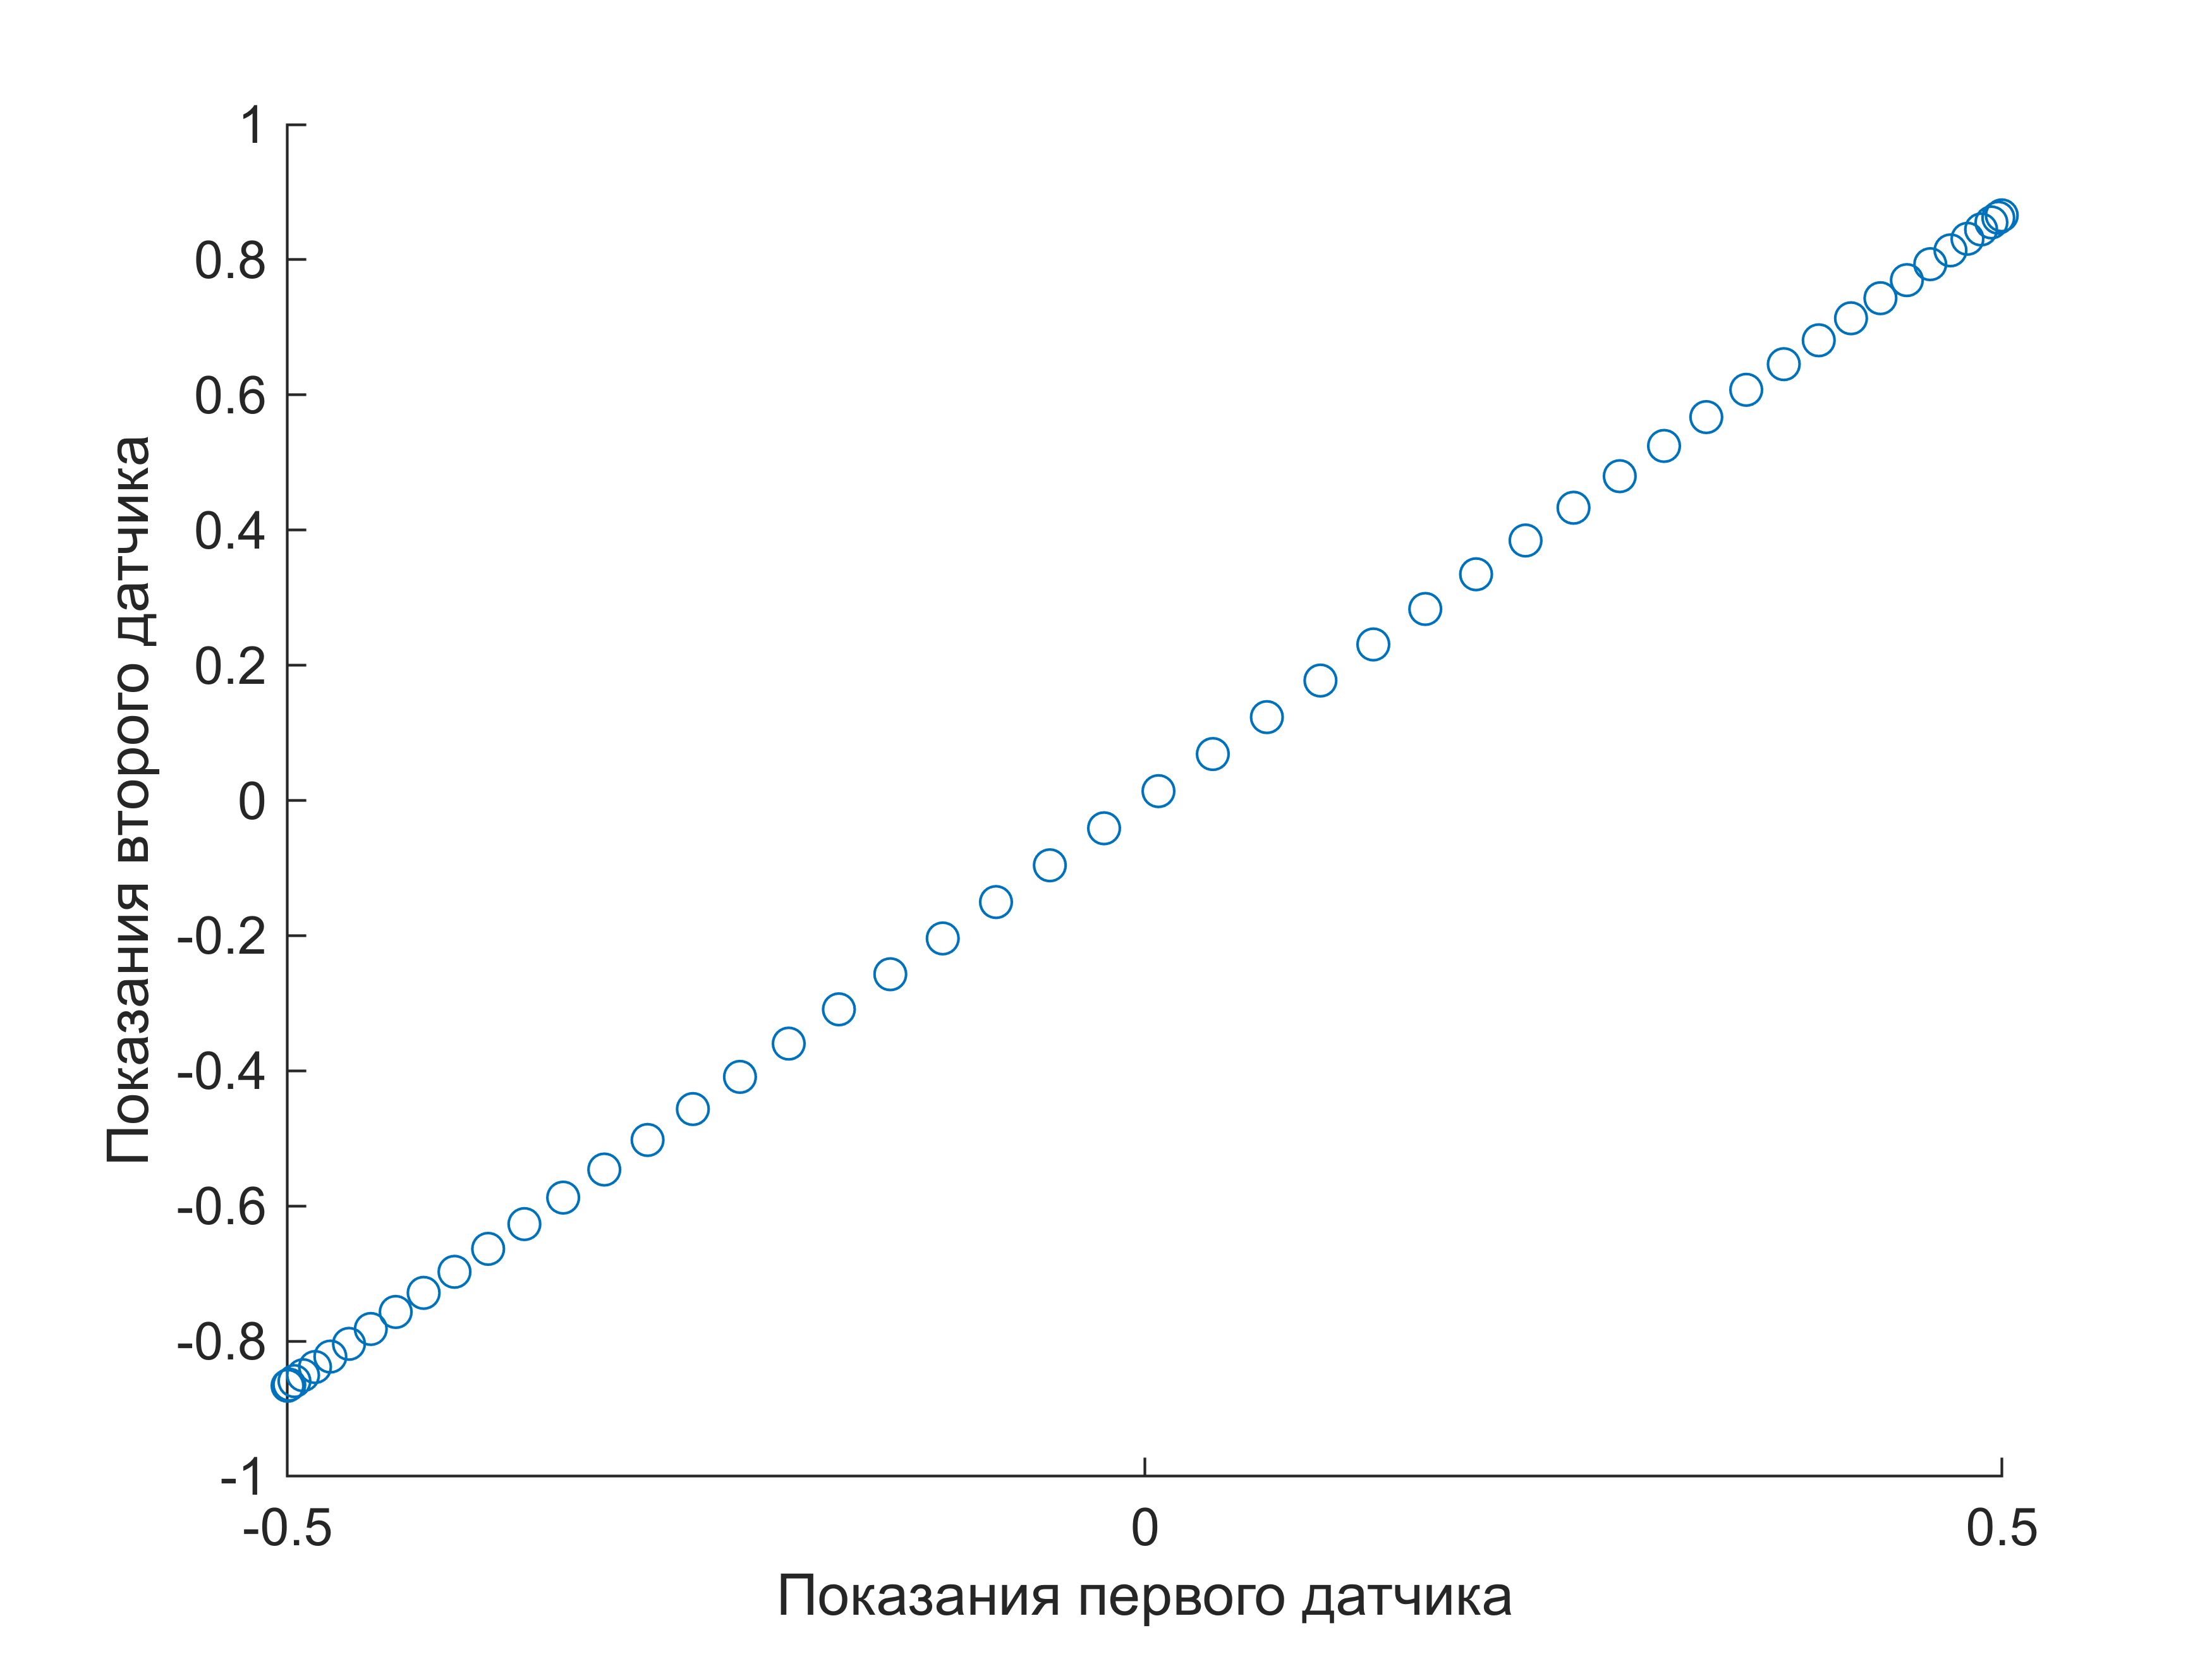

In [127]:
scatter(c2,c1);
xlabel("Показания первого датчика")
ylabel("Показания второго датчика")

In [128]:
[V,S,U] = svd(A) % считаем сингулярное разложение

V = 2x2    
    0.8660    0.5000
    0.5000   -0.8660
S = 2x100    
    7.1063         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0
         0    0.0000         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0 

In [129]:
% спектр сингулярных значений состоит из одного значения, это значит, что
% нам достаточно одного датчика!
cosd(phi) % косинус угла ориентации датчиков

ans = 0.8660

In [130]:
sind(phi) % синус угла ориентации датчиков

ans = 0.5000

In [131]:
V2 = [cosd(phi) sind(phi);...
     sind(phi) -cosd(phi)] % матрица вращения на угол фи в двумерном пространстве

V2 = 2x2    
    0.8660    0.5000
    0.5000   -0.8660

In [132]:
% Таким образом, V - матрица поворота
rad2deg(subspace(A,[1;0])) % угол между подпространством матрицы измерений единичным вектором (вектор X рисунке), так как матрица

ans = 30.0000

In [133]:
% A - сингулярна (измерения полностью коррелированы), ее подпространство
% состоит из одного вектора, поэтому углом между поодпространством ее
% столбцов и вектором будет угол фи
disp("Матрица ковариации:")

Матрица ковариации:

In [134]:
C = A*A'/(numel(t)-1)

C = 2x2    
    0.3826    0.2209
    0.2209    0.1275

#### Пример использования: "случаные" данные
#### Генерация исходных данных по трем свойствам (два из них \- коррелированы)

In [135]:
clearvars
rand_fun = "randn"; % выбираем статистику из которой набираются "экспериментальные точки" randn - Гауссово распределение, rand - равномерное распределение от 0 до 1
rand_fun_handle = str2func(rand_fun); % форма распределения
points_number = 90; % число экспериментальных точек
X = 60 + rand_fun_handle(points_number,1); % генерим массив случайных точек (результаты измерения первого параметра)
Y = 1.26+ 0.1*rand_fun_handle(points_number,1); % генерим массив случайных точек (результаты измерения второго параметра) полностью случайны, не зависят от X
alfa_cor =0.75;
Ycor = 3 + (alfa_cor*X + (1-alfa_cor)*rand_fun_handle(points_number,1));% Ycor - коррелирует с X
disp("Матрица свойств:")

Матрица свойств:

In [136]:
t1 = table(X,Y,Ycor,'VariableNames',["Прочность" "Теплопроводность" "Удельная поверхность"]);
disp(t1)

    Прочность    Теплопроводность    Удельная поверхность
    _________    ________________    ____________________
     58.356           1.2349                46.696       
      60.48           1.5433                48.401       
     59.324           1.3219                48.062       
     60.844           1.2112                48.625       
     60.061           1.0559                 47.72       
      58.85           1.2157                46.858       
     59.683           1.4396                48.475       
     59.969           1.2386                47.883       
     58.798           1.2389                47.181       
     61.537          0.97752                49.155       
      60.71          0.98332                48.459       
     59.591           1.1642                 47.84       
     59.772           1.3748                47.786       
     60.166           1.0364                48.028       
     58.925           1.2973                46.993       
     59.669   

In [137]:
disp("Матрица испытаний:")

Матрица испытаний:

In [138]:
disp([X';Y';Ycor'])

   58.3560   60.4796   59.3239   60.8438   60.0607   58.8500   59.6832   59.9688   58.7983   61.5371   60.7104   59.5911   59.7723   60.1658   58.9252   59.6688   61.9563   61.0685   59.5776   59.0559   60.5254   61.2204   58.8184   58.8232   58.9749   59.8555   60.9380   61.1092   58.8037   60.0250   58.6146   59.9123   59.6421   60.1837   59.7155   60.8320   59.6848   59.6679   60.0668   60.3499   60.5073   58.6619   58.9459   60.2389   59.9013   59.0397   59.2344   60.2500   61.0855   59.1938   60.7409   59.0108   60.6160   57.2930   59.9814   61.7522   60.2108   59.6402   59.0070   60.8170   59.8611   59.6252   60.4336   60.3943   61.4818   59.9462   60.0757   60.7580   58.9063   58.7474   60.3561   60.0422   62.2246   59.1790   60.3010   58.6899   60.6131   59.0169   58.9020   61.5842   61.1174   60.2443   60.2655   61.6562   59.7552   59.3865   59.1130   59.7452   58.3426   59.3813
1.2349    1.5433    1.3219    1.2112    1.0559    1.2157    1.4396    1.2386    1.2389    0.9775   

In [139]:
% СЧИТАЕМ СРЕДНИЕ И НОРМИРУЕМ

Xn = (X-mean(X)); % смещаем среднее для первого свойства
Yn = (Y - mean(Y));% смещаем среднее для второго свойсва
Ycorn = ((Ycor - mean(Ycor))); % нормированные данные

% вначале рассмотрим матрицы 2х2
A2 = transpose([Xn,Yn]); % матрица испытаний для некоррелированных параметров (два параметра)
A2cor = transpose([Xn,Ycorn]); % матрица испытаний для коррелированных параметров (два параметра)
A3 = transpose([Xn,Yn,Ycorn]); % матрица испытаний для всех трех свойств
covMATuncor = A2*transpose(A2)/(points_number-1); % матрица ковариации для некоррелированных данных
covMATcor =  A2cor*transpose(A2cor)/(points_number-1);% матрица ковариации для коррелированных данных
covMAT3 = A3*transpose(A3)/(points_number-1);
disp("Матрица ковариации независимых друг от друга данных:")

Матрица ковариации независимых друг от друга данных:

In [140]:
disp(covMATuncor)

    0.8660   -0.0041
   -0.0041    0.0138

In [141]:
disp("Матрица ковариации взаимосвязанных данных Y="+alfa_cor+"*X +"+(1-alfa_cor)+"*rand")

Матрица ковариации взаимосвязанных данных Y=0.75*X +0.25*rand

In [142]:
disp(covMATcor)

    0.8660    0.6488
    0.6488    0.5473

In [143]:
disp("Матрица ковариации для трех параметров {X=rand,rand,Y="+alfa_cor+"*X +"+(1-alfa_cor)+"*rand}")

Матрица ковариации для трех параметров {X=rand,rand,Y=0.75*X +0.25*rand}

In [144]:
disp(covMAT3)

    0.8660   -0.0041    0.6488
   -0.0041    0.0138   -0.0033
    0.6488   -0.0033    0.5473


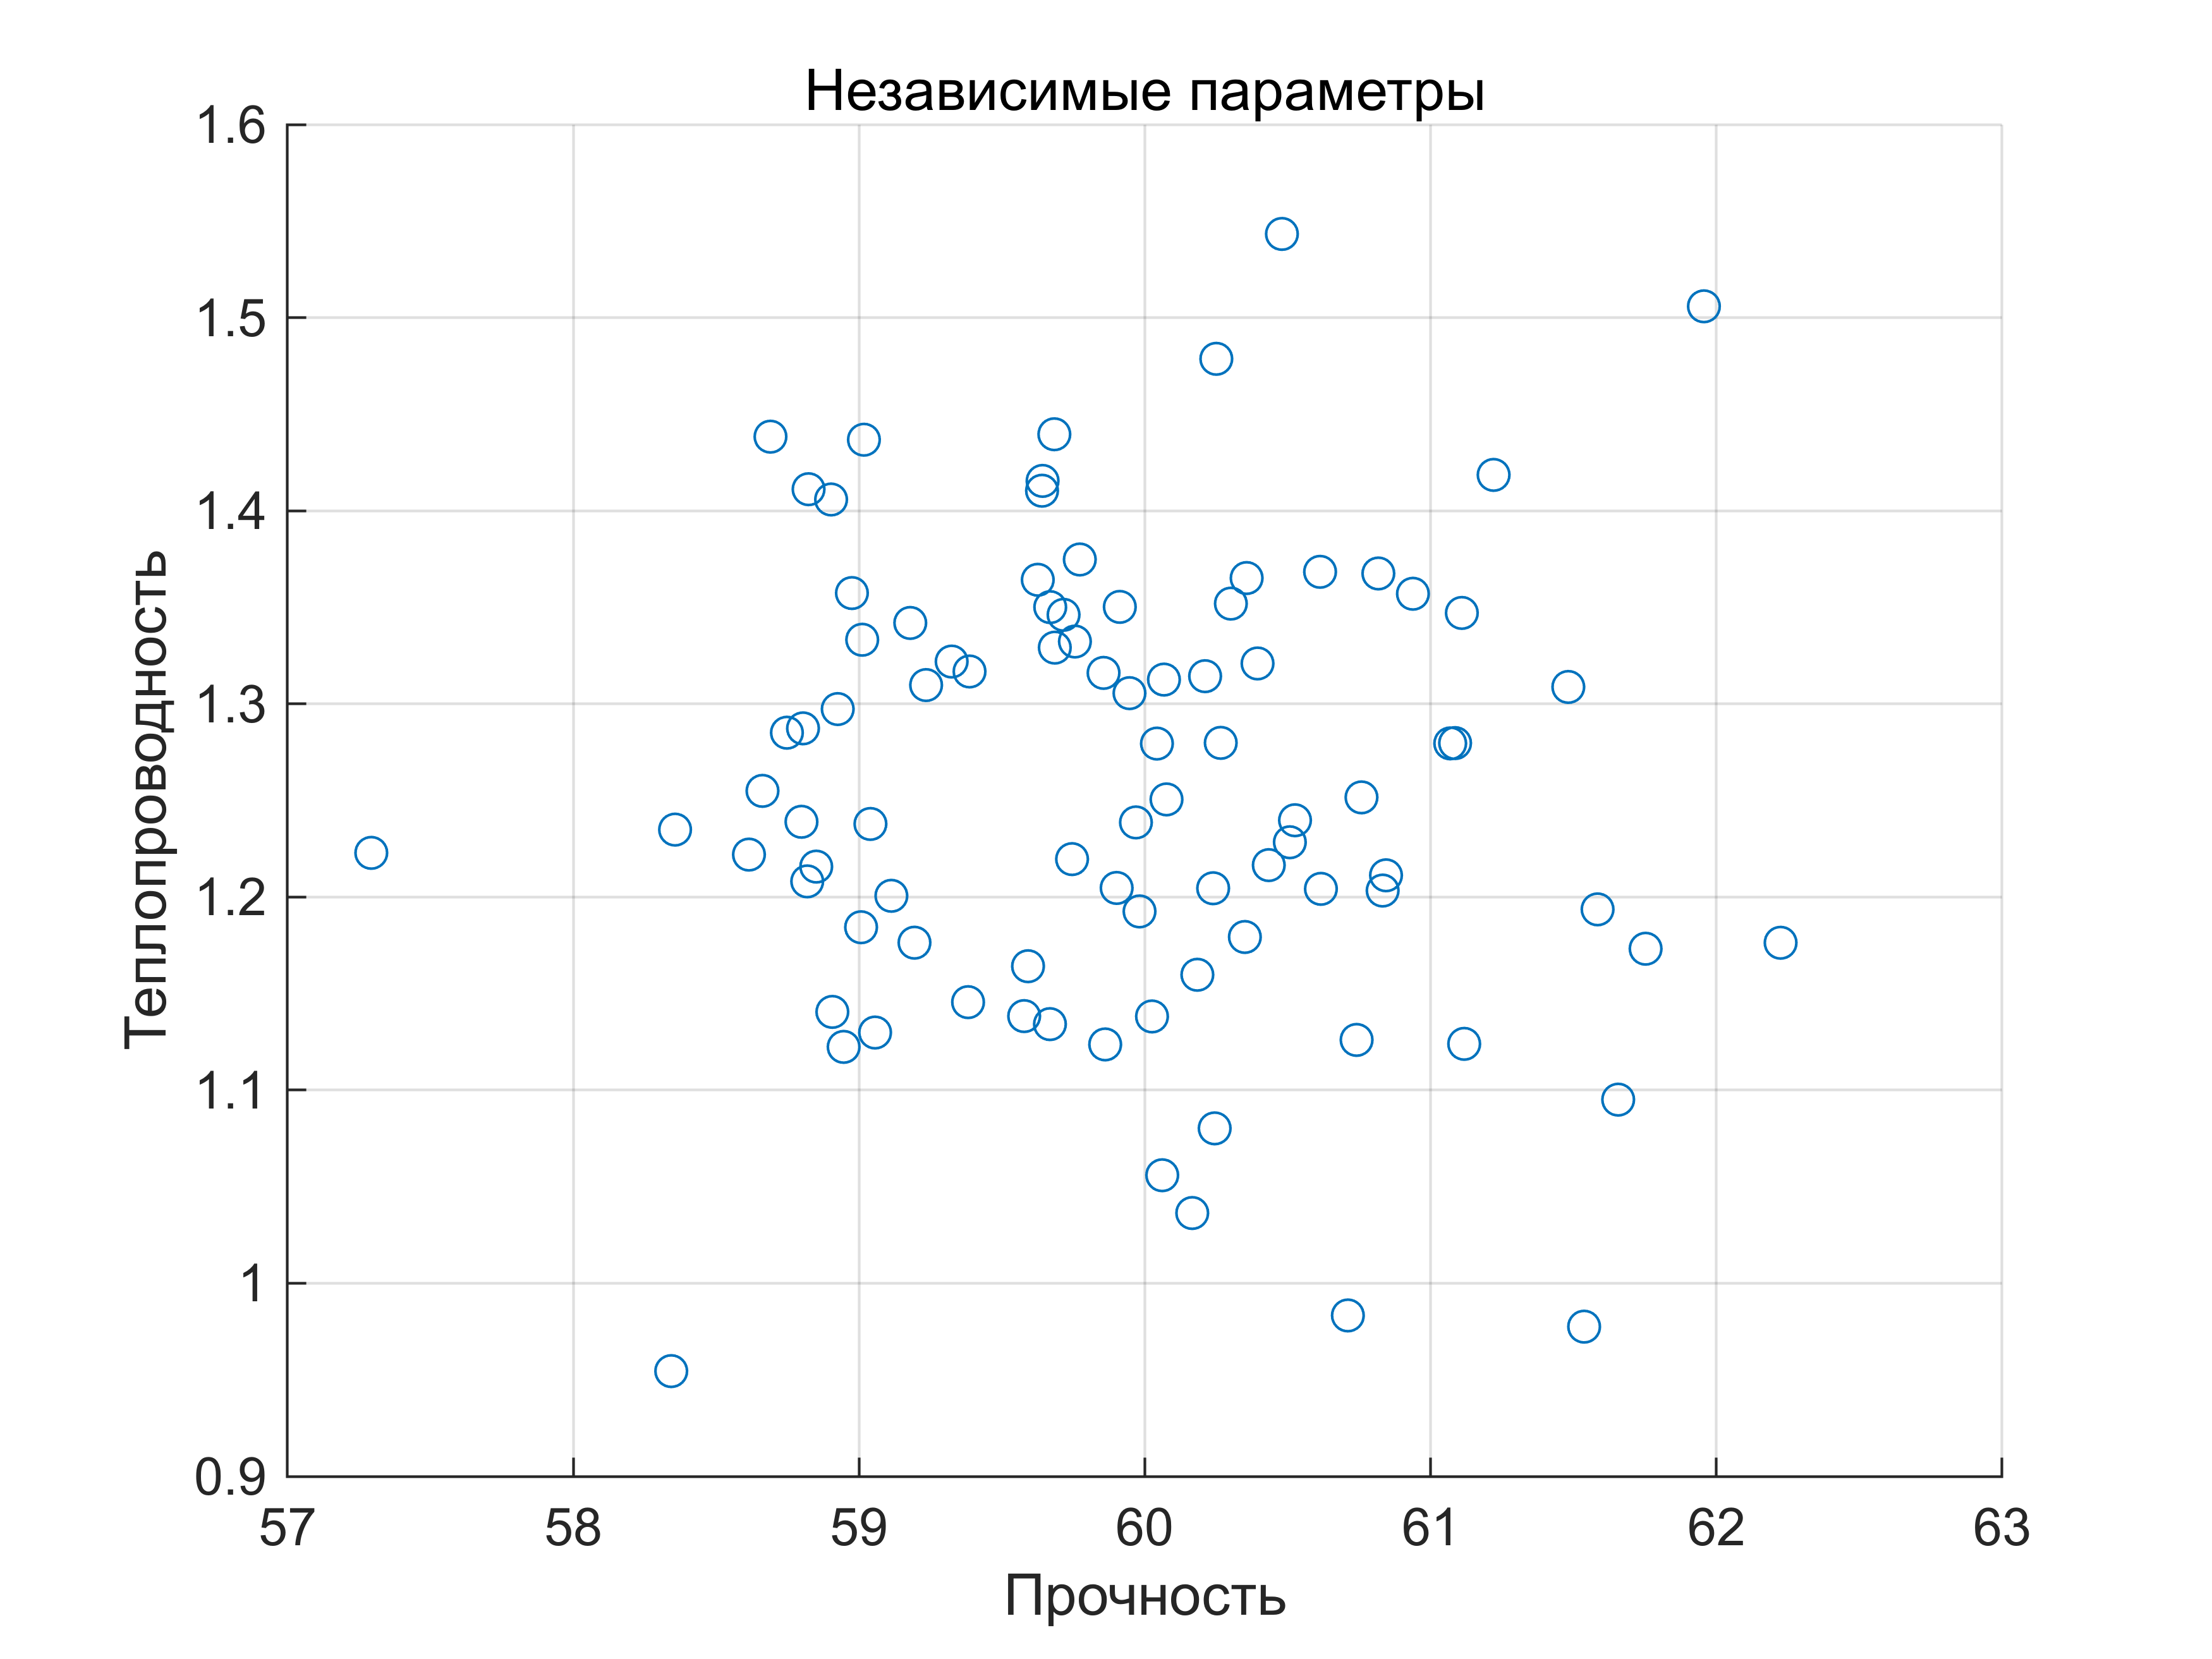

In [145]:

scatter(t1.("Прочность"),t1.("Теплопроводность"));
xlabel(t1.Properties.VariableNames{1});
ylabel(t1.Properties.VariableNames{2});
title("Независимые параметры")
grid on


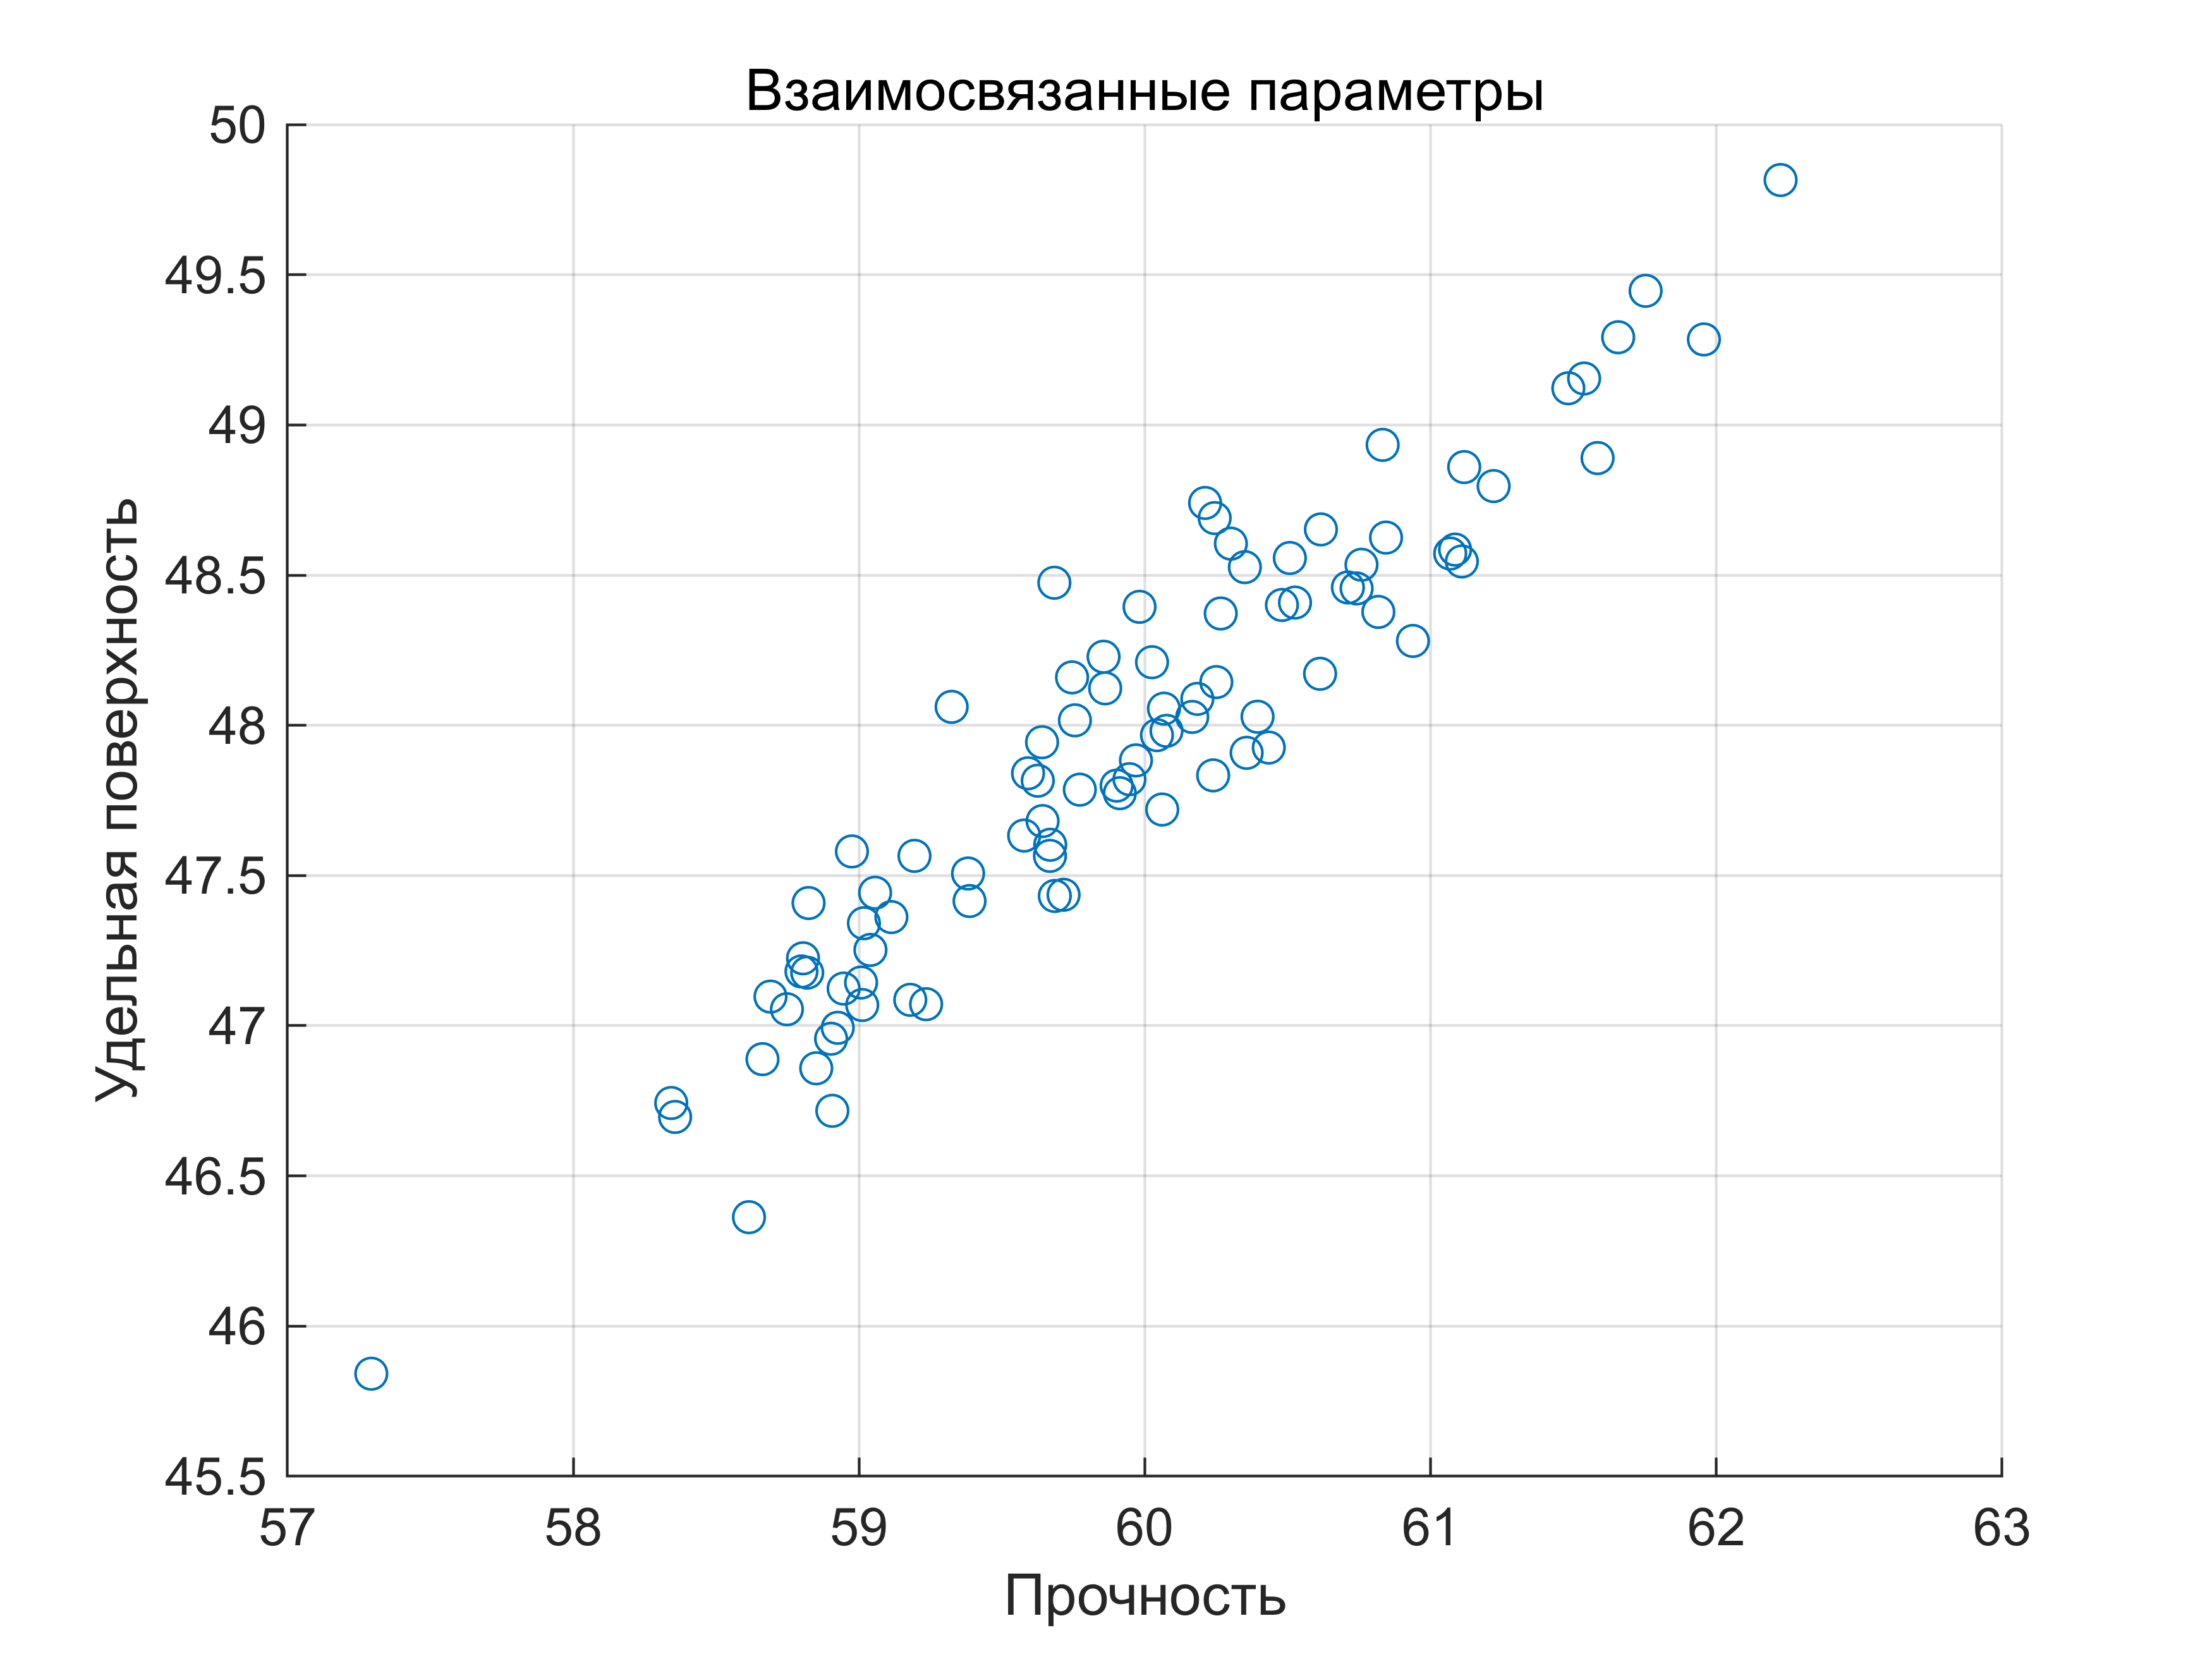

In [146]:
scatter(t1.("Прочность"),t1.("Удельная поверхность"));
xlabel(t1.Properties.VariableNames{1});
ylabel(t1.Properties.VariableNames{3});
title("Взаимосвязанные параметры")
grid on


Собственные значения и собственные вектора матрицы ковариации:


In [147]:
[Q,L] = eig(covMATcor,'vector')

Q = 2x2    
    0.6170   -0.7869
   -0.7869   -0.6170
L = 2x1    
    0.0385
1.3747

In [148]:
ax = draw_vector([],"Scattered data","","point",A2cor(1,:),A2cor(2,:));

fig13

In [149]:
draw_vector(ax,"Собственные вектора матрицы ковариации","","vector",Q(:,1),Q(:,2))

ans = 
  Axes (Собственные вектора матрицы ковариации) with properties:
             XLim: [-1 1]
             YLim: [-1 1]
           XScale: 'linear'
           YScale: 'linear'
    GridLineStyle: '-'
         Position: [0.1300 0.1100 0.7750 0.8150]
            Units: 'normalized'
  Show all properties

In [150]:
[U,S,V] = svd(A2cor) % SVD разложение

U = 2x2    
    0.7869    0.6170
    0.6170   -0.7869
S = 2x90    
   11.0612         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0
         0    1.8517         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0  

In [151]:
I = ones(size(A2cor,2),1);
% если данные линейно коррелированы, почему бы не попробовать зафитить их
% полиномом первой степени
% A2cor(2,:) = lsqr_fit(1) + lsqr_fit(2)*A2cor(1,:)
vandermonde_matrix = [I A2cor(1,:)'] % матрица Вадермонда (что это?)

vandermonde_matrix = 90x2    
1.0000   -1.5599
2. 0000    0.5637
3. 0000   -0.5920
4. 0000    0.9279
5. 0000    0.1448
6. 0000   -1.0659
7. 0000   -0.2327
8. 0000    0.0529
9. 0000   -1.1176
10. 0000    1.6212

In [152]:
lsqr_fit = atan(vandermonde_matrix\A2cor(2,:)') % решаем задачу метода наименьших квадратов (

lsqr_fit = 2x1    
   -0.0000
    0.6430

In [153]:
a_lsqrt = [cos(lsqr_fit(2));sin(lsqr_fit(2))]

a_lsqrt = 2x1    
    0.8003
    0.5996

In [154]:
draw_vector(ax,"Собственные вектора матрицы ковариации и сингулярные вектора матрицы испытаний",["u1" "u2"],"vector",U(:,1),U(:,2)*S(2,2)/S(1,1),a_lsqrt)

ans = 
  Axes (Собственные вектора матрицы ковариации и сингулярные вектора матрицы испытаний) with properties:
             XLim: [-1 1]
             YLim: [-1 1]
           XScale: 'linear'
           YScale: 'linear'
    GridLineStyle: '-'
         Position: [0.1300 0.1100 0.7750 0.8150]
            Units: 'normalized'
  Show all properties


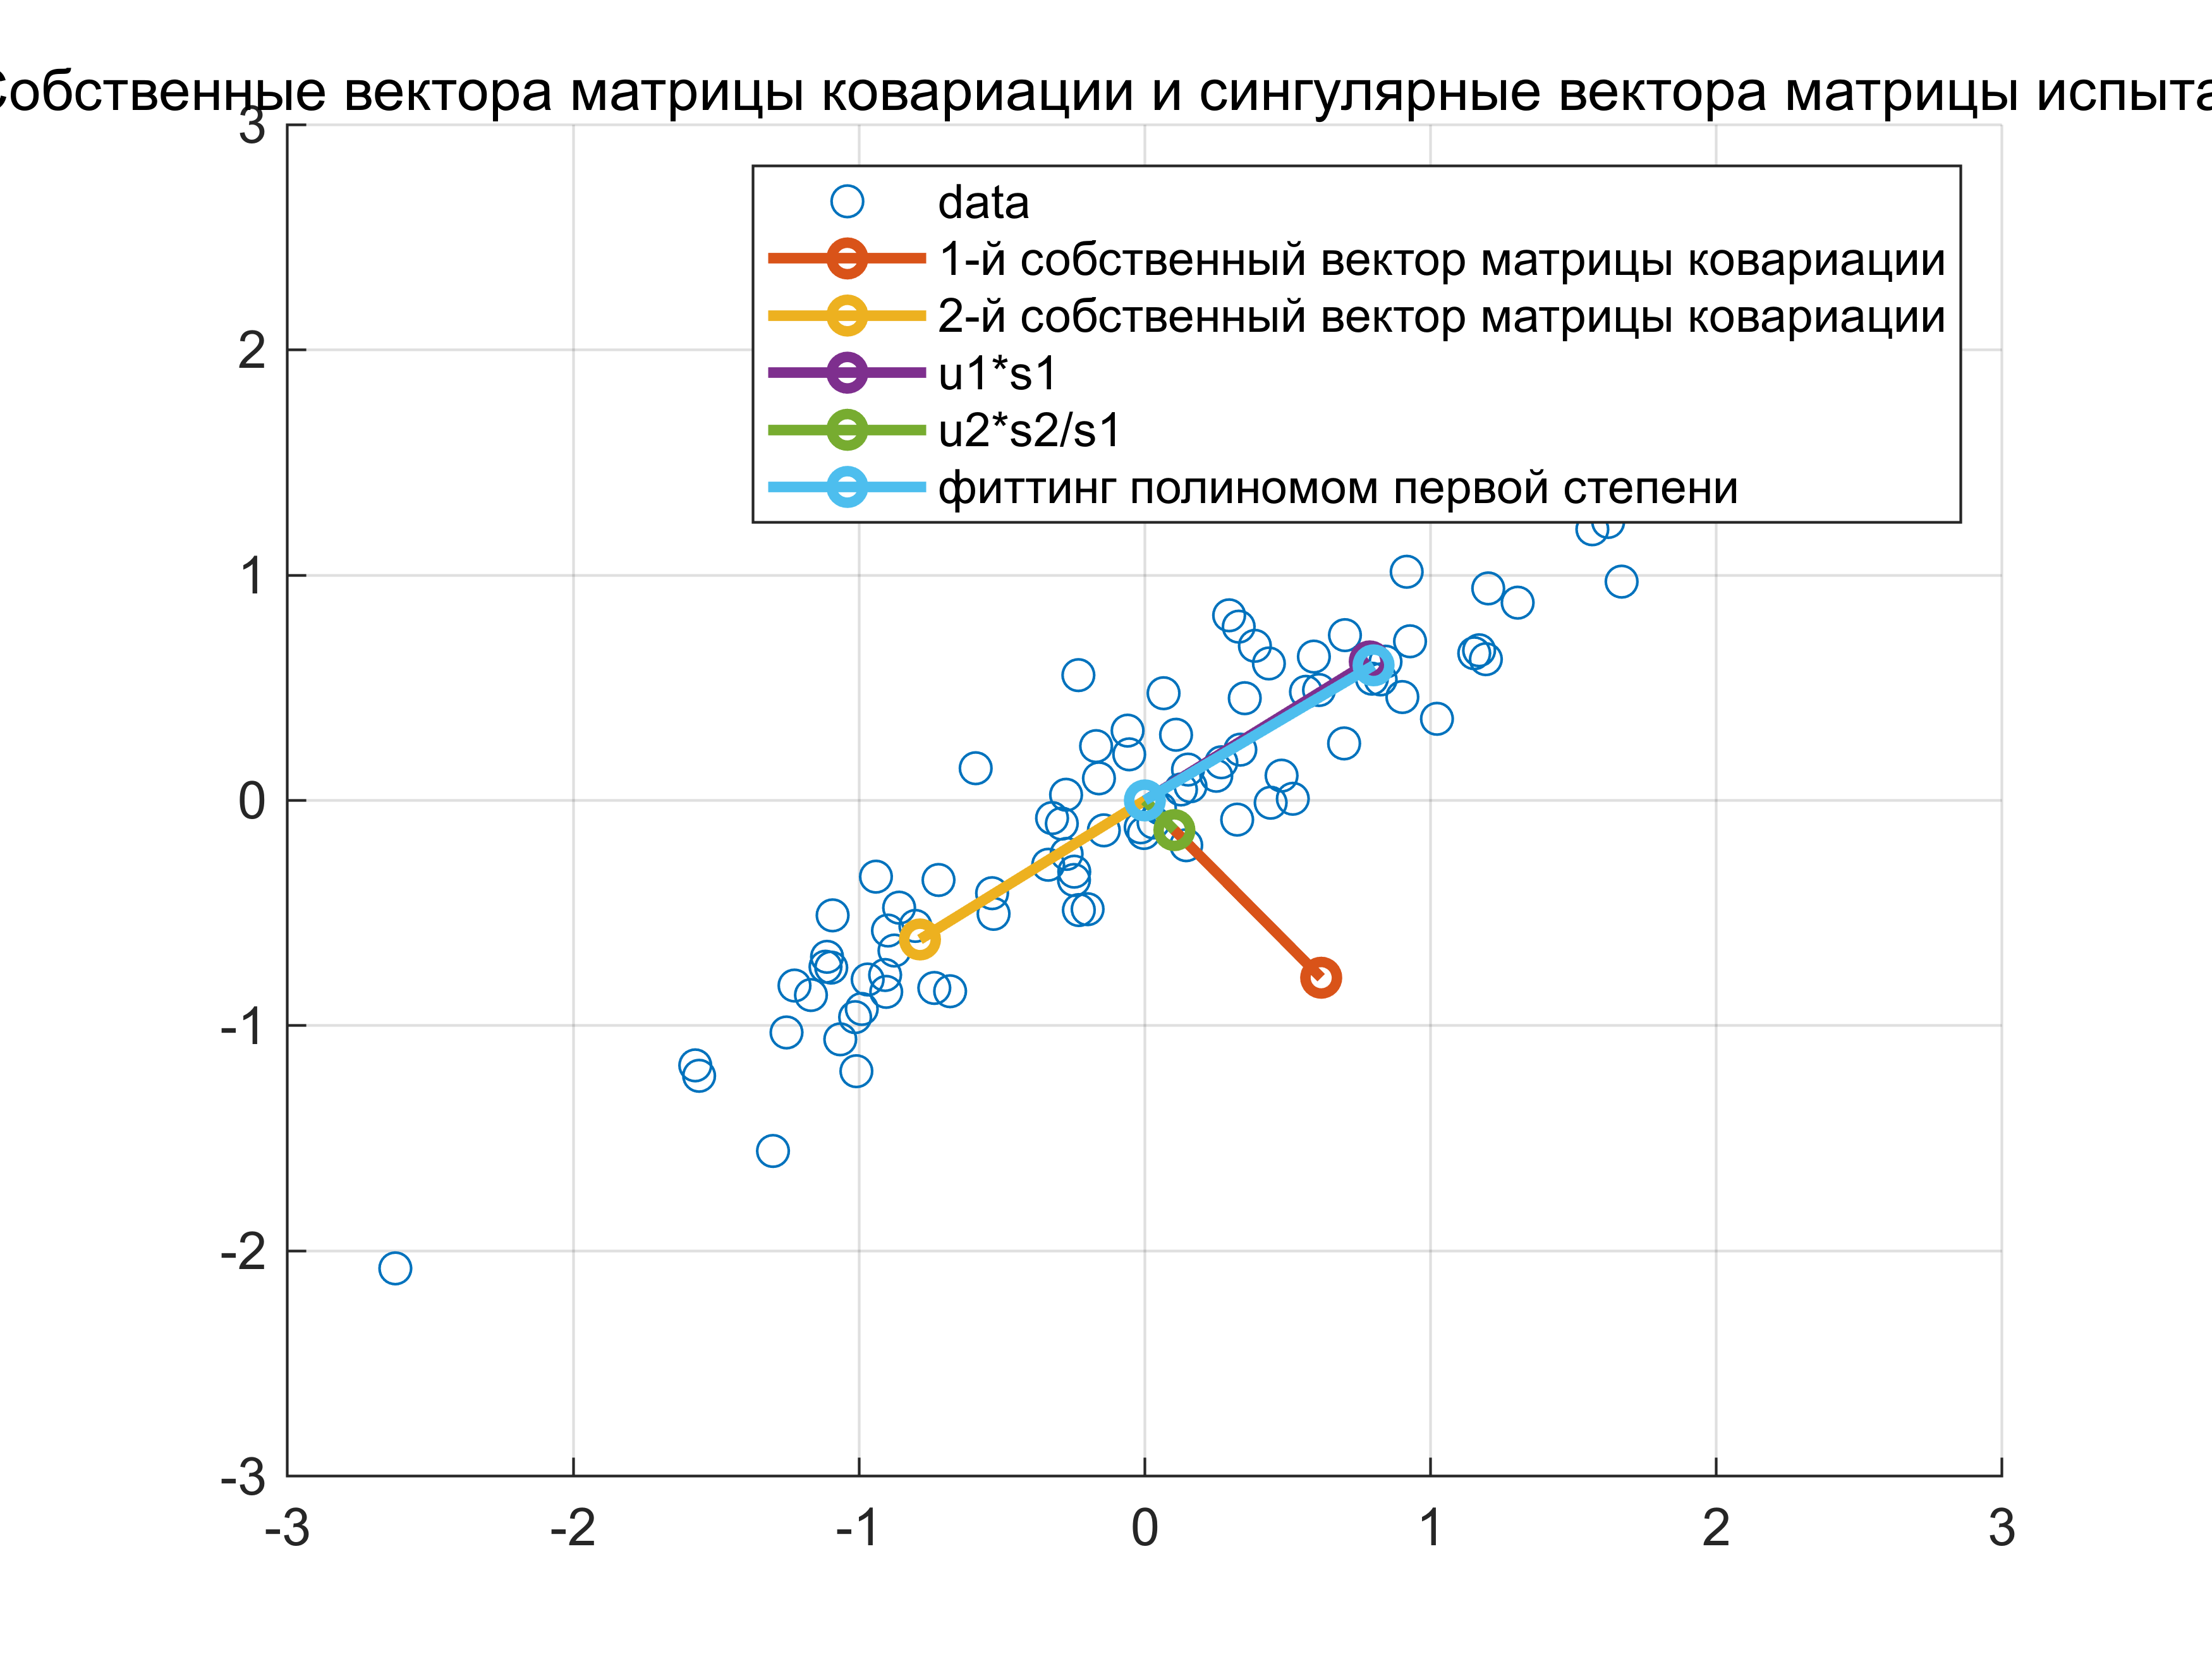

In [155]:
xlim(ax,[-3,3])
ylim(ax,[-3,3])
legend(ax,["data" "1-й собственный вектор матрицы ковариации" ...
    "2-й собственный вектор матрицы ковариации" "u1*s1" "u2*s2/s1" "фиттинг полиномом первой степени "])

In [156]:
% transpose(Q)*U
disp("Матрица сингулярных значений матрицы испытаний (в квадрате и нормированы на (1-N)):")

Матрица сингулярных значений матрицы испытаний (в квадрате и нормированы на (1-N)):

In [157]:
(S.^2)/(points_number-1)

ans = 2x90    
1.3747         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0
         0    0.0385         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0        

In [158]:
disp(" Матрица собственных значений матрицы ковариации : ")

 Матрица собственных значений матрицы ковариации :

In [159]:
diag(eig(covMATcor))

ans = 2x2    
    0.0385         0
         0    1.3747


Таким образом, левые сингулярные вектора дают направление векторов вдоль главных осей эллипса, первая главная ось соотвествует направлению, на которое сумма проекций максимальна.


Проекция столбцов матрицы $A$ на вектор $\vec{u_1 }$ :


$${\vec{u} }_1^T A={\vec{u} }_1^T U\Sigma V^T ={\vec{u} }_1^T \sum_{i=1}^m [\sigma_i {\vec{u} }_i {\vec{v} }_i^T ]=\sigma_1 {\vec{v} }_1^T$$

Амплитуда суммы проекций столбцов матрицы это длина этого вектора:


$$||{\vec{u} }_1^T A||=||\sigma_1 {\vec{v} }_1^T ||=\sigma_1$$

Направление первого левого сингулярного вектора показывает вектор, сумма проекций векторов состояния (столбцы матрицы измерений) на который максимальна!


Разница между методом наименьших квадратов и сингулярным разложением показана на рисунке:

<p style="text-align:left">
   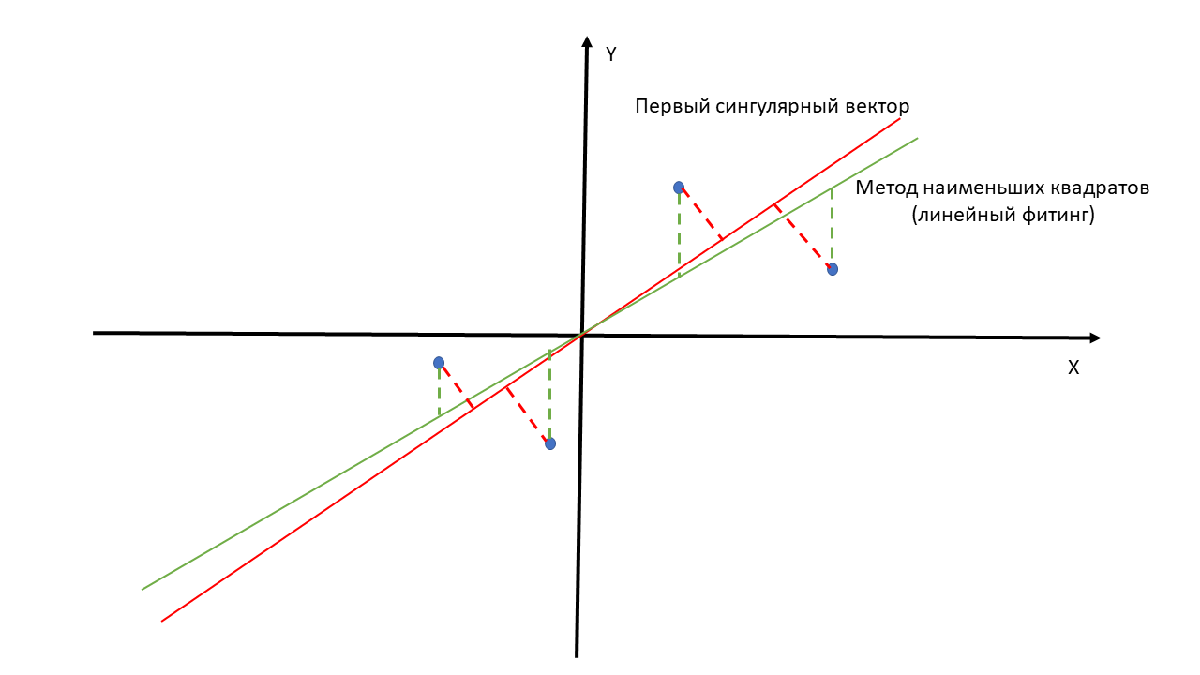
</p>


Линейная алгебра  построена так, чтобы она без проблемы экстраполировалась на пространства б**о**льшей размерности.


Три ...


In [160]:
covMAT3

covMAT3 = 
1.0916   -0.0051    0.8389
   -0.0051    0.0076    0.0015
    0.8389    0.0015    0.6862

In [161]:
%ax2 = draw_vector([],"Scattered data","","point",A3(1,:),A3(2,:),A3(3,:));
[U,S,V] = svd(A3)

U = 
    0.7858   -0.6030    0.1378
   -0.0018    0.2206    0.9754
    0.6185    0.7667   -0.1722
S = 
   12.4868         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0
         0    1.5448         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0
         0         0    0.7698         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0     

In [162]:
U(:,3)'*U(:,2)

ans = -1.3878e-16

In [163]:

ax2 =draw_vector([],"Scattered data","","vector",U(:,1),U(:,2),U(:,3));

fig11


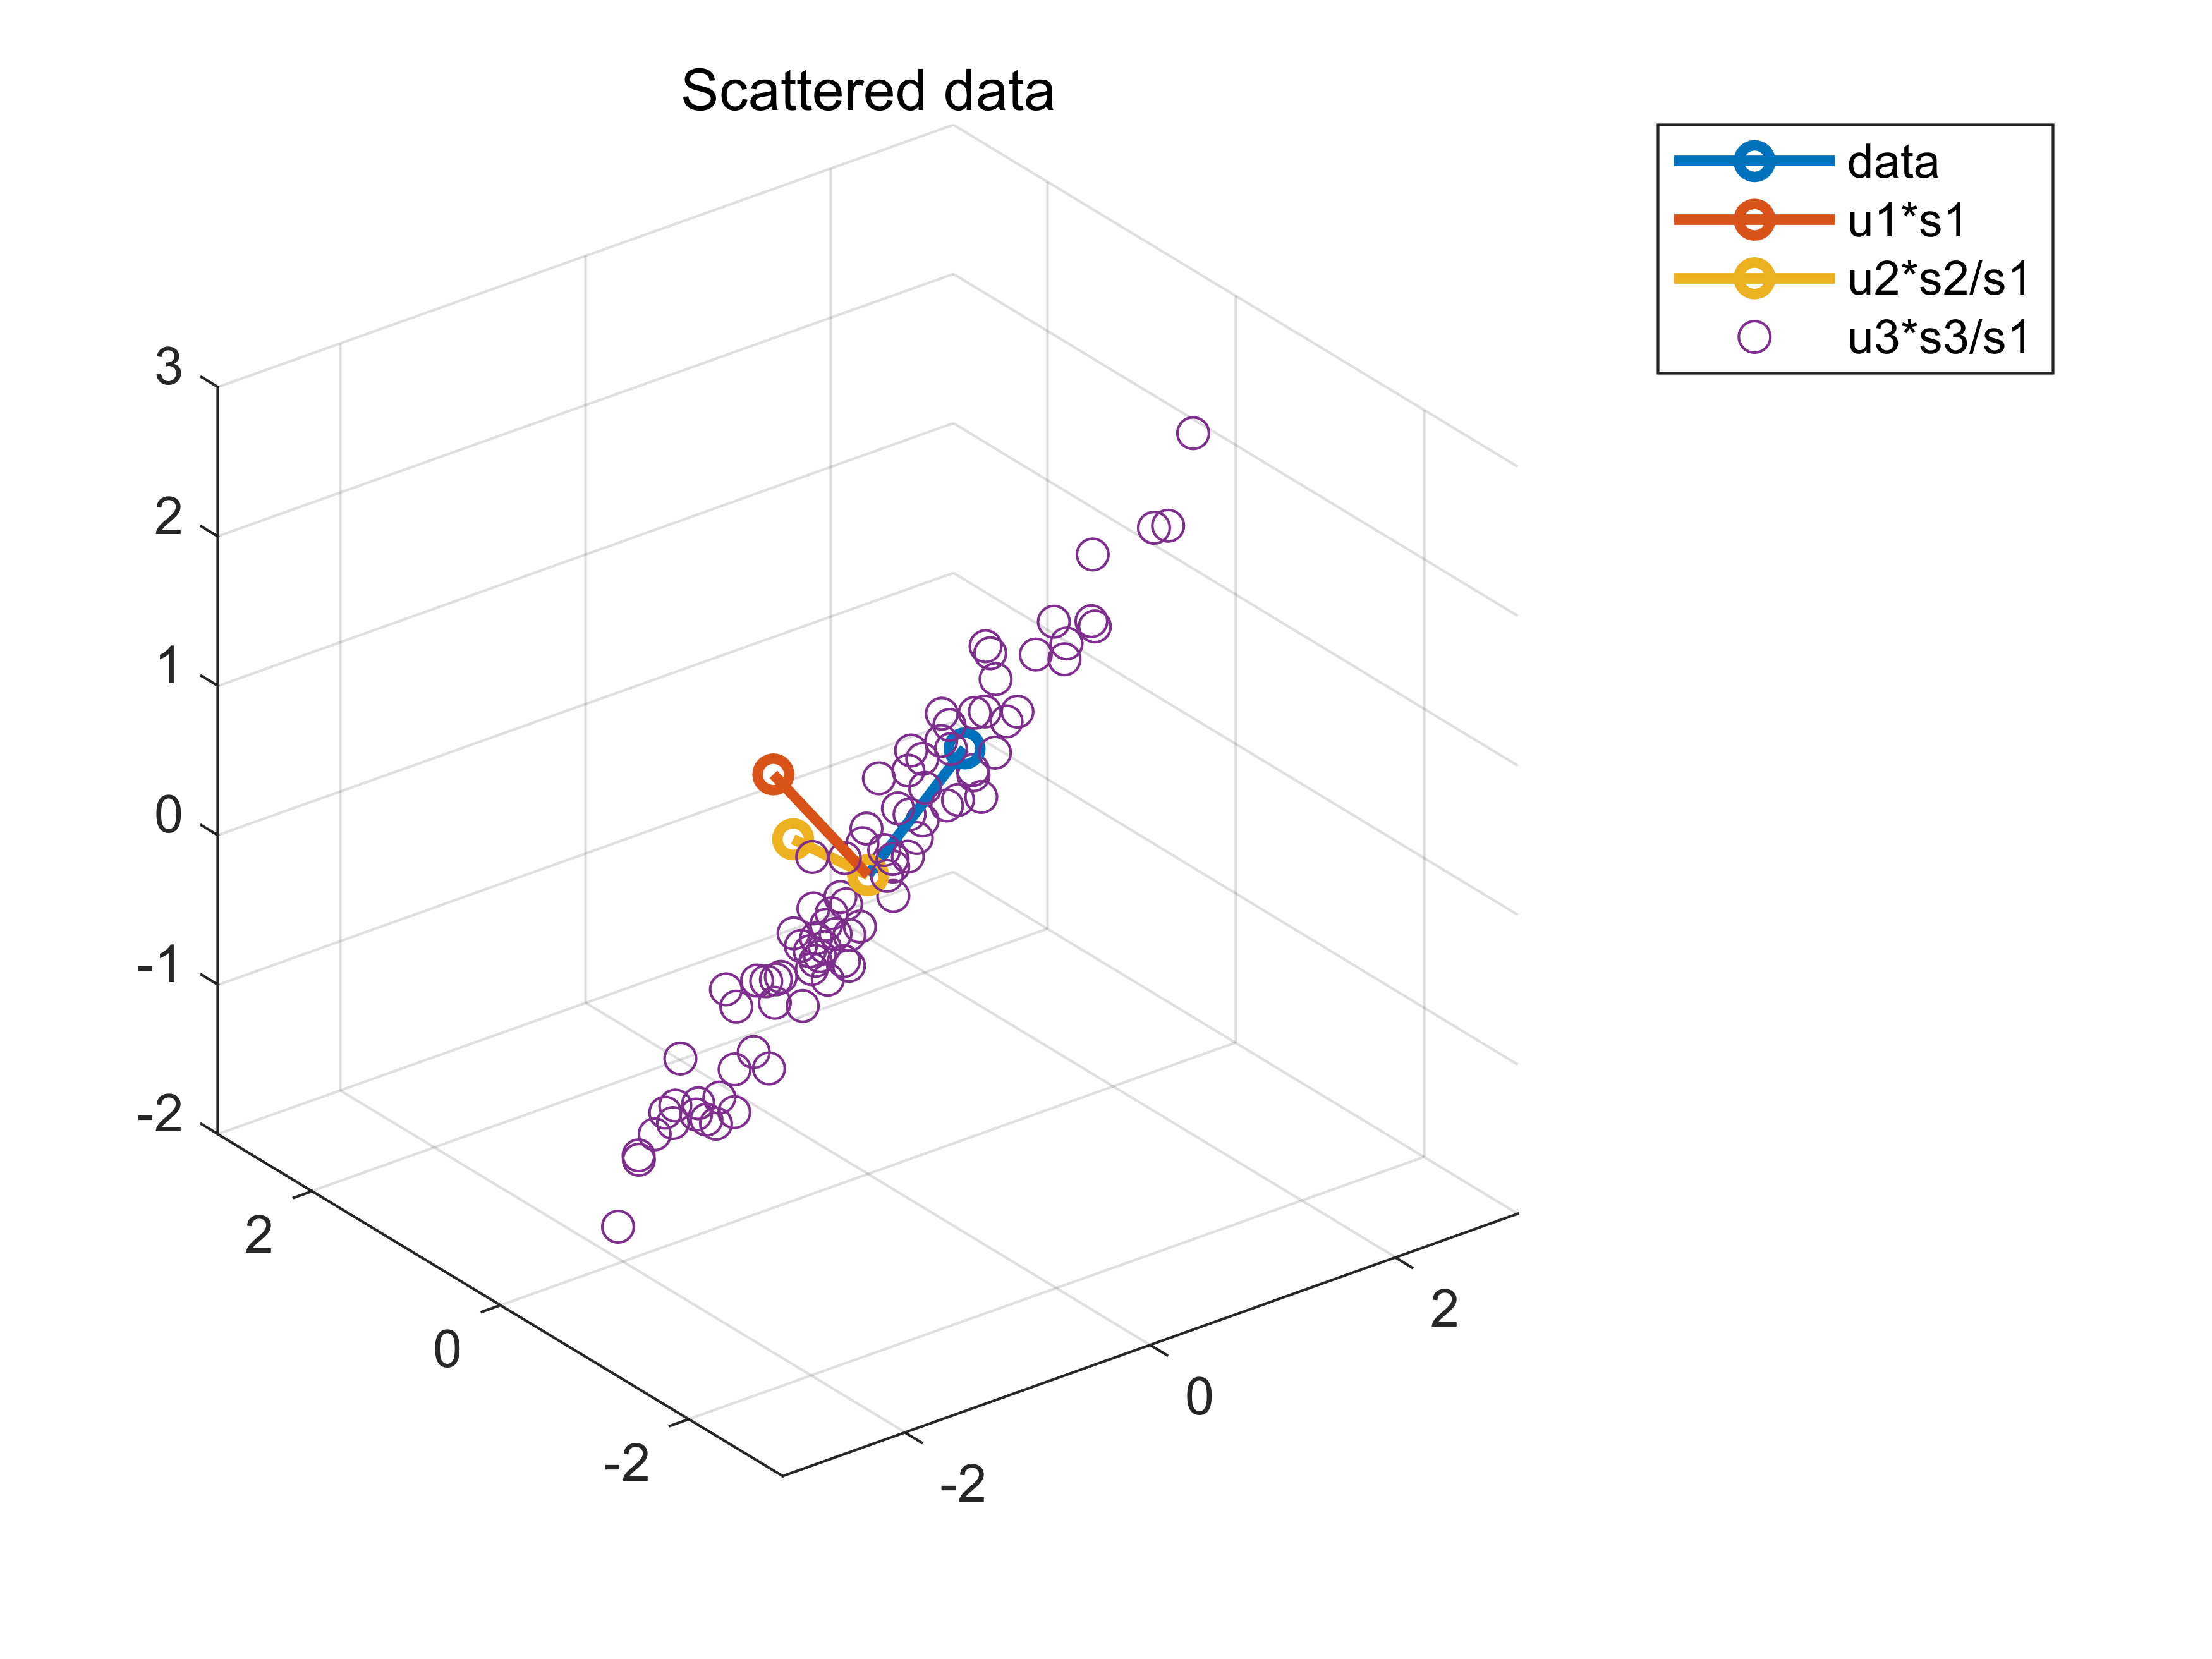

In [164]:
draw_vector(ax2,"Scattered data","","point",A3(1,:),A3(2,:),A3(3,:));
xlim(ax2,[-3,3]);
ylim(ax2,[-3,3]);
legend(ax2,["data" "u1*s1" "u2*s2/s1" "u3*s3/s1"]);


Пять...


In [165]:
clearvars -except points_number rand_fun_handle alfa_cor
X1 = randn(points_number,1);
X2 = randn(points_number,1);
X3 = randn(points_number,1);
alfas1 = [0.01,0.01,0.07];
alfas2 = [0,0,0.08];
alfas2 = alfas2/sum(alfas2);alfas1 = alfas1/sum(alfas1);

X4 = (1-alfa_cor)*rand_fun_handle(points_number,1) + alfa_cor*sum([X1,X2,X3].*alfas1,2);
X5 = (1-alfa_cor)*rand_fun_handle(points_number,1) + alfa_cor*sum([X1,X2,X3].*alfas2,2);

C = transpose([X1,X2,X3,X4,X5])*[X1,X2,X3,X4,X5]/(points_number-1)

C = 
1.2861    0.2160    0.0660    0.1608    0.0737
    0.2160    1.0458   -0.0964    0.0713   -0.0456
    0.0660   -0.0964    1.1366    0.7230    0.8458
    0.1608    0.0713    0.7230    0.5497    0.5387
    0.0737   -0.0456    0.8458    0.5387    0.7022

In [166]:

SIG = svds(C)/(points_number-1)

SIG = 
    0.0258
    0.0159
    0.0102
    0.0008
    0.0004

# <span style="color:rgb(213,80,0)">ВЫВОД:</span>

## Метод анализа главный компонент позволяет установить насколько коррелированы исходные данные, а также дает линейное преобразование исходных данных в "новые", в которых базис соответствует собственным векторам матрицы ковариации.

 $M$ \- матрица эксперимента


S = svds(M,N) \- первые N ее сингулярных значений, чем ближе они друг к другу, тем более некоррелированными являются колонки в таблице

# <span style="color:rgb(213,80,0)">Литература</span>
1.  Gilbert Strang. Linear algebra and learning from data. MIT (2019)
2. Gilbert Strang. Introduction to linear algebra. 2016 (Есть перевод старой версии книги : Г.Стрэнг Введение в линейную алгебру)
3. youtube: канал  MIT OpenСourseWare, курс лекций MIT: 18.06SC Linear Algebra (2011)
4. youtube: канал  MIT OpenСourseWare, курс лекций: MIT 18.065 Matrix methods in Data Analysis, Signal processing, and Mechine Learning (2018)
5. youtube: канал AMATH 301, лектор  Nathan Kutz, лекции: The singular Value Decomposition and Principal Componen Analysis
## BONUS с картинками!
#### Теорема Экхарта\-Янга:

Пусть $A_k =\sum_{i=1}^k [\sigma_i {\vec{u} }_i {\vec{v} }_i^T ]$ , где $\forall$ $k\le m$ , тогда для $\forall$ матрицы $B$ ранга $k$ :  $||A-B||\ge ||A-A_k ||$ .


Иными словами, матрица $A_k$ является наилучшей аппроксимацией матрицы $A$ среди всех матриц ранга $k$ .


Картинка  \- это же матрица!



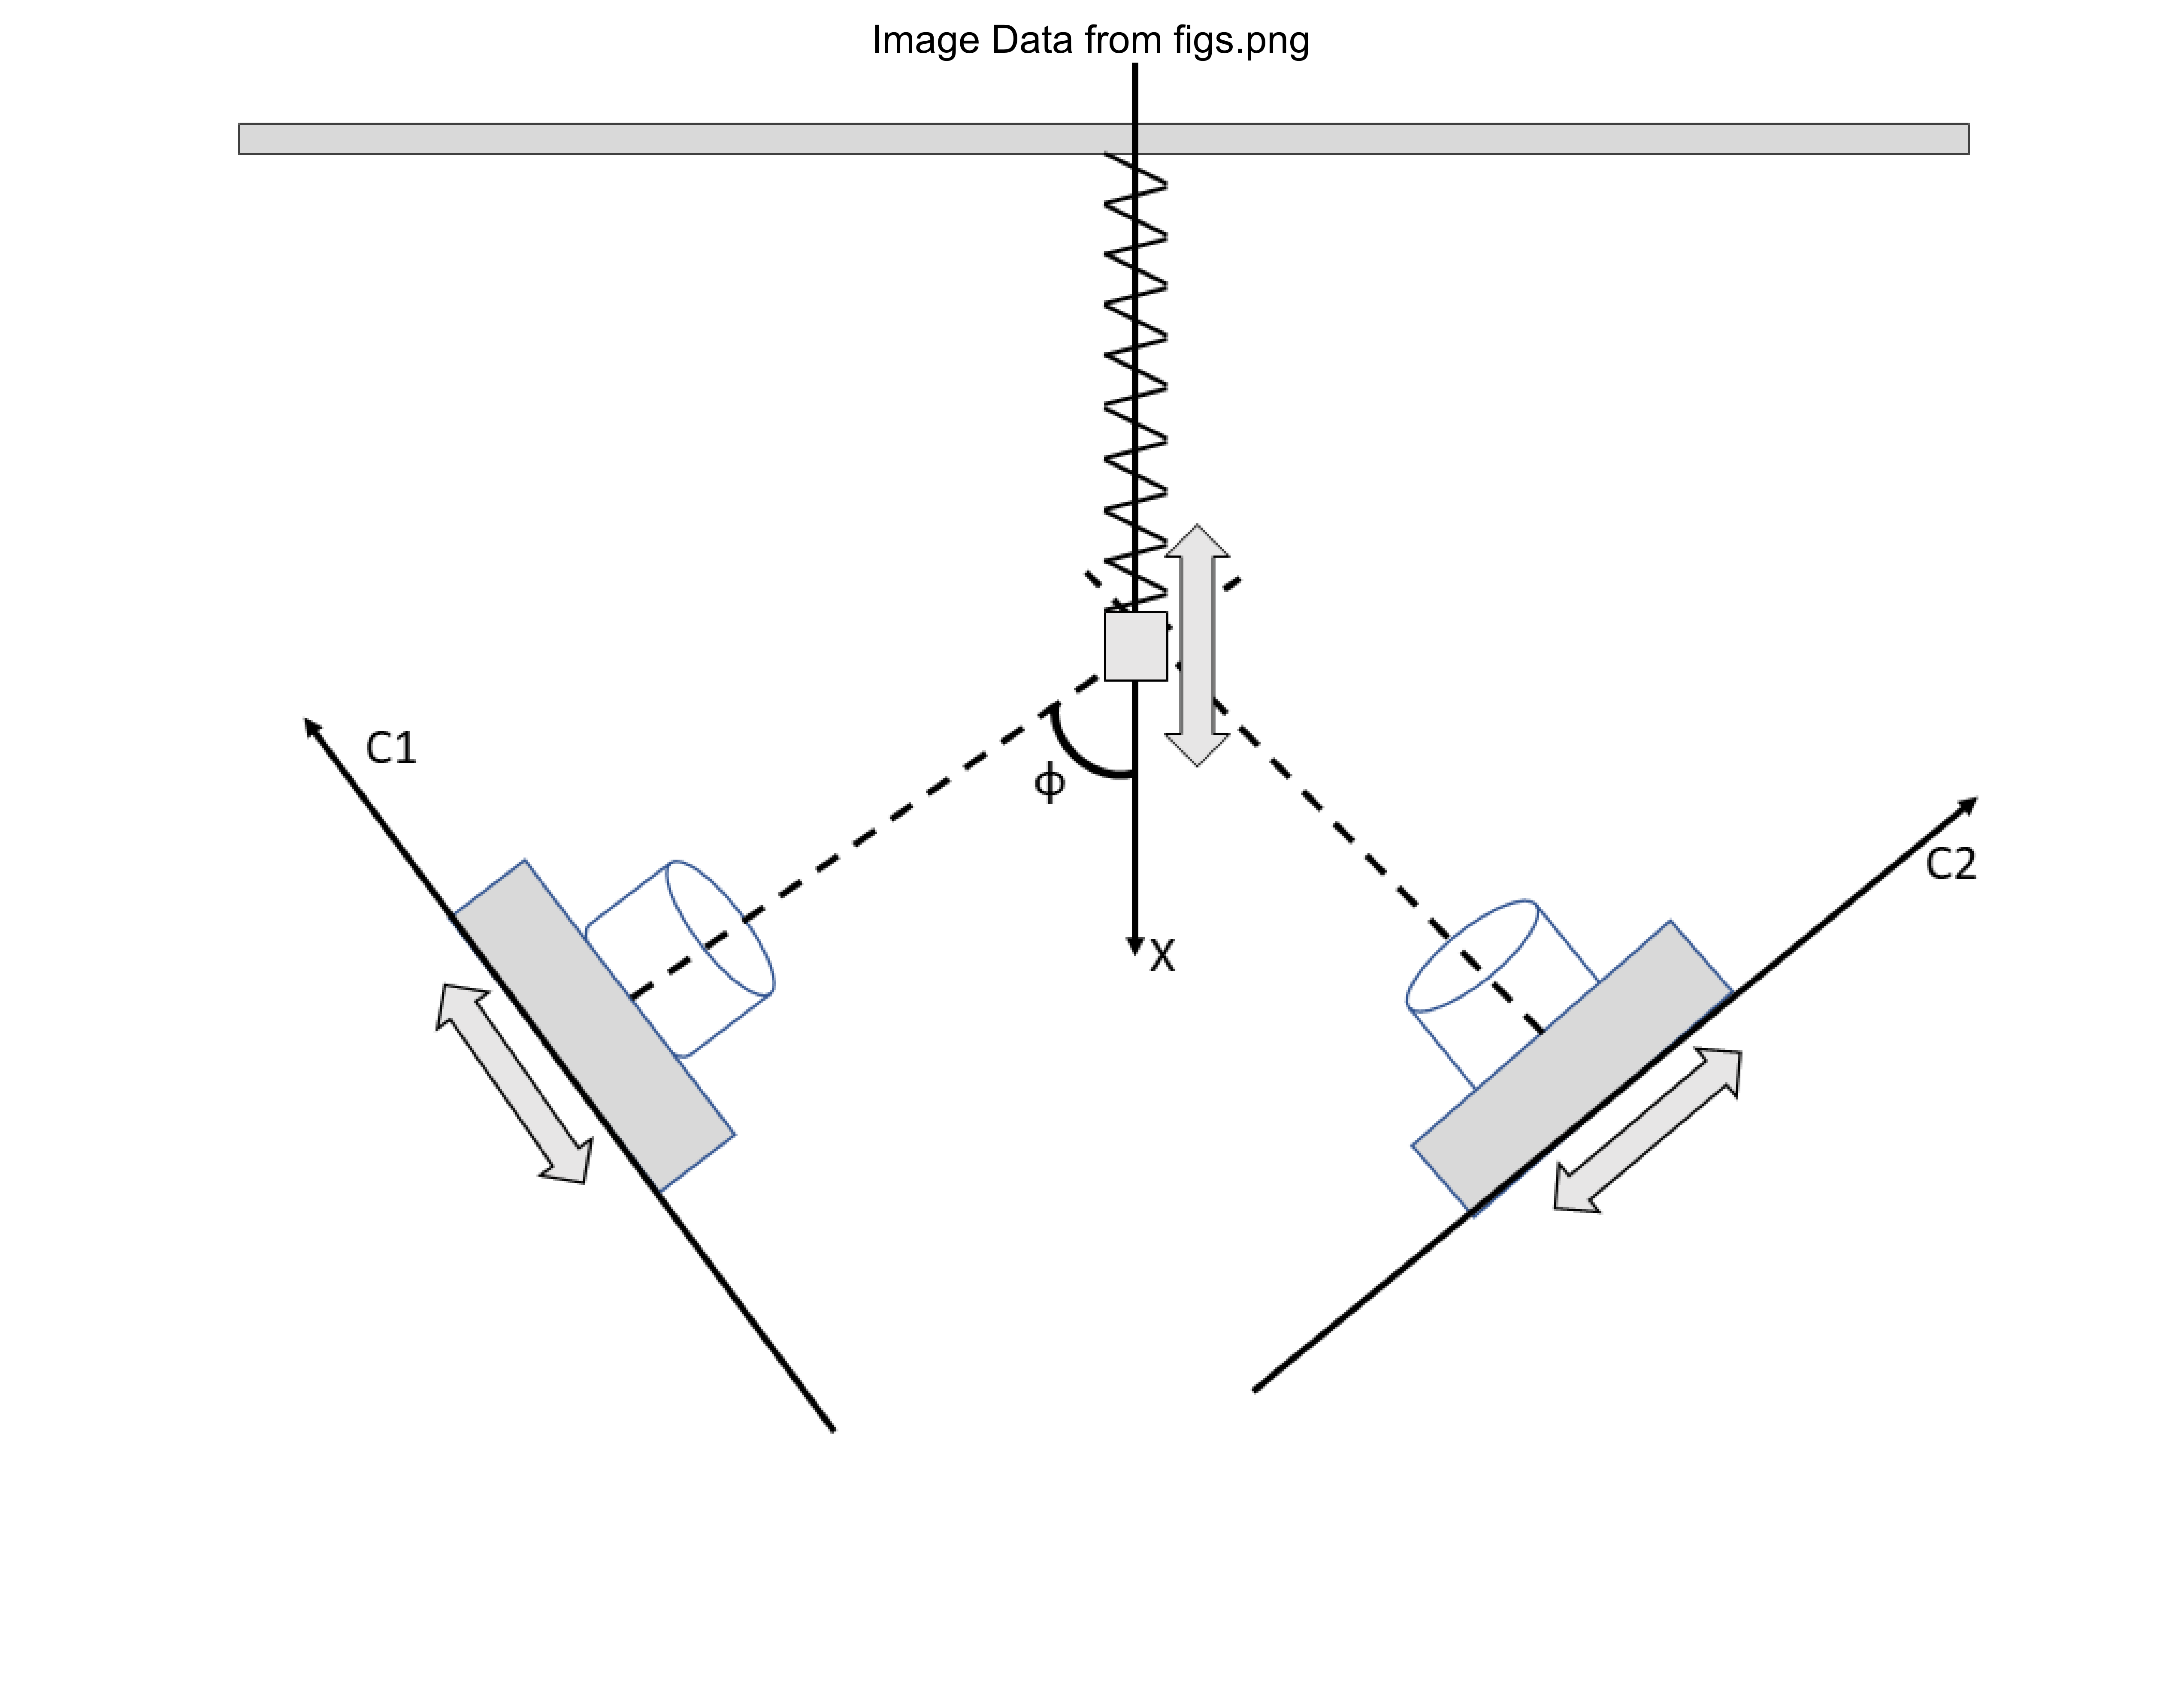

In [167]:
clearvars
% Import image
folder =  get_folder();
selected_image= "figs.png";
figs_folder =folder + "\figs";
full_file = fullfile(figs_folder,selected_image);
figs = imread(full_file);

% Display results
imshow(figs);
title("Image Data from figs.png");

In [168]:

A = double((im2gray(figs)));
[U,S,V] = svd(A);% сингулярное разложение исходной картинки

In [169]:

number_of_dimentions=60; % ранг матрицы Ak
if number_of_dimentions>size(U,2)
    number_of_dimentions = size(U,2);
end
% уменьшаем размерность исходной картинки
Uk = U(:,1:number_of_dimentions);
Sk = diag(S(1:number_of_dimentions,1:number_of_dimentions));
Vk = V(:,1:number_of_dimentions);
Ak = Uk.*Sk'*Vk'; % матрица уменьшенной размерности
disp("Слева-сжатая, справа - исходная:")

Слева-сжатая, справа - исходная:


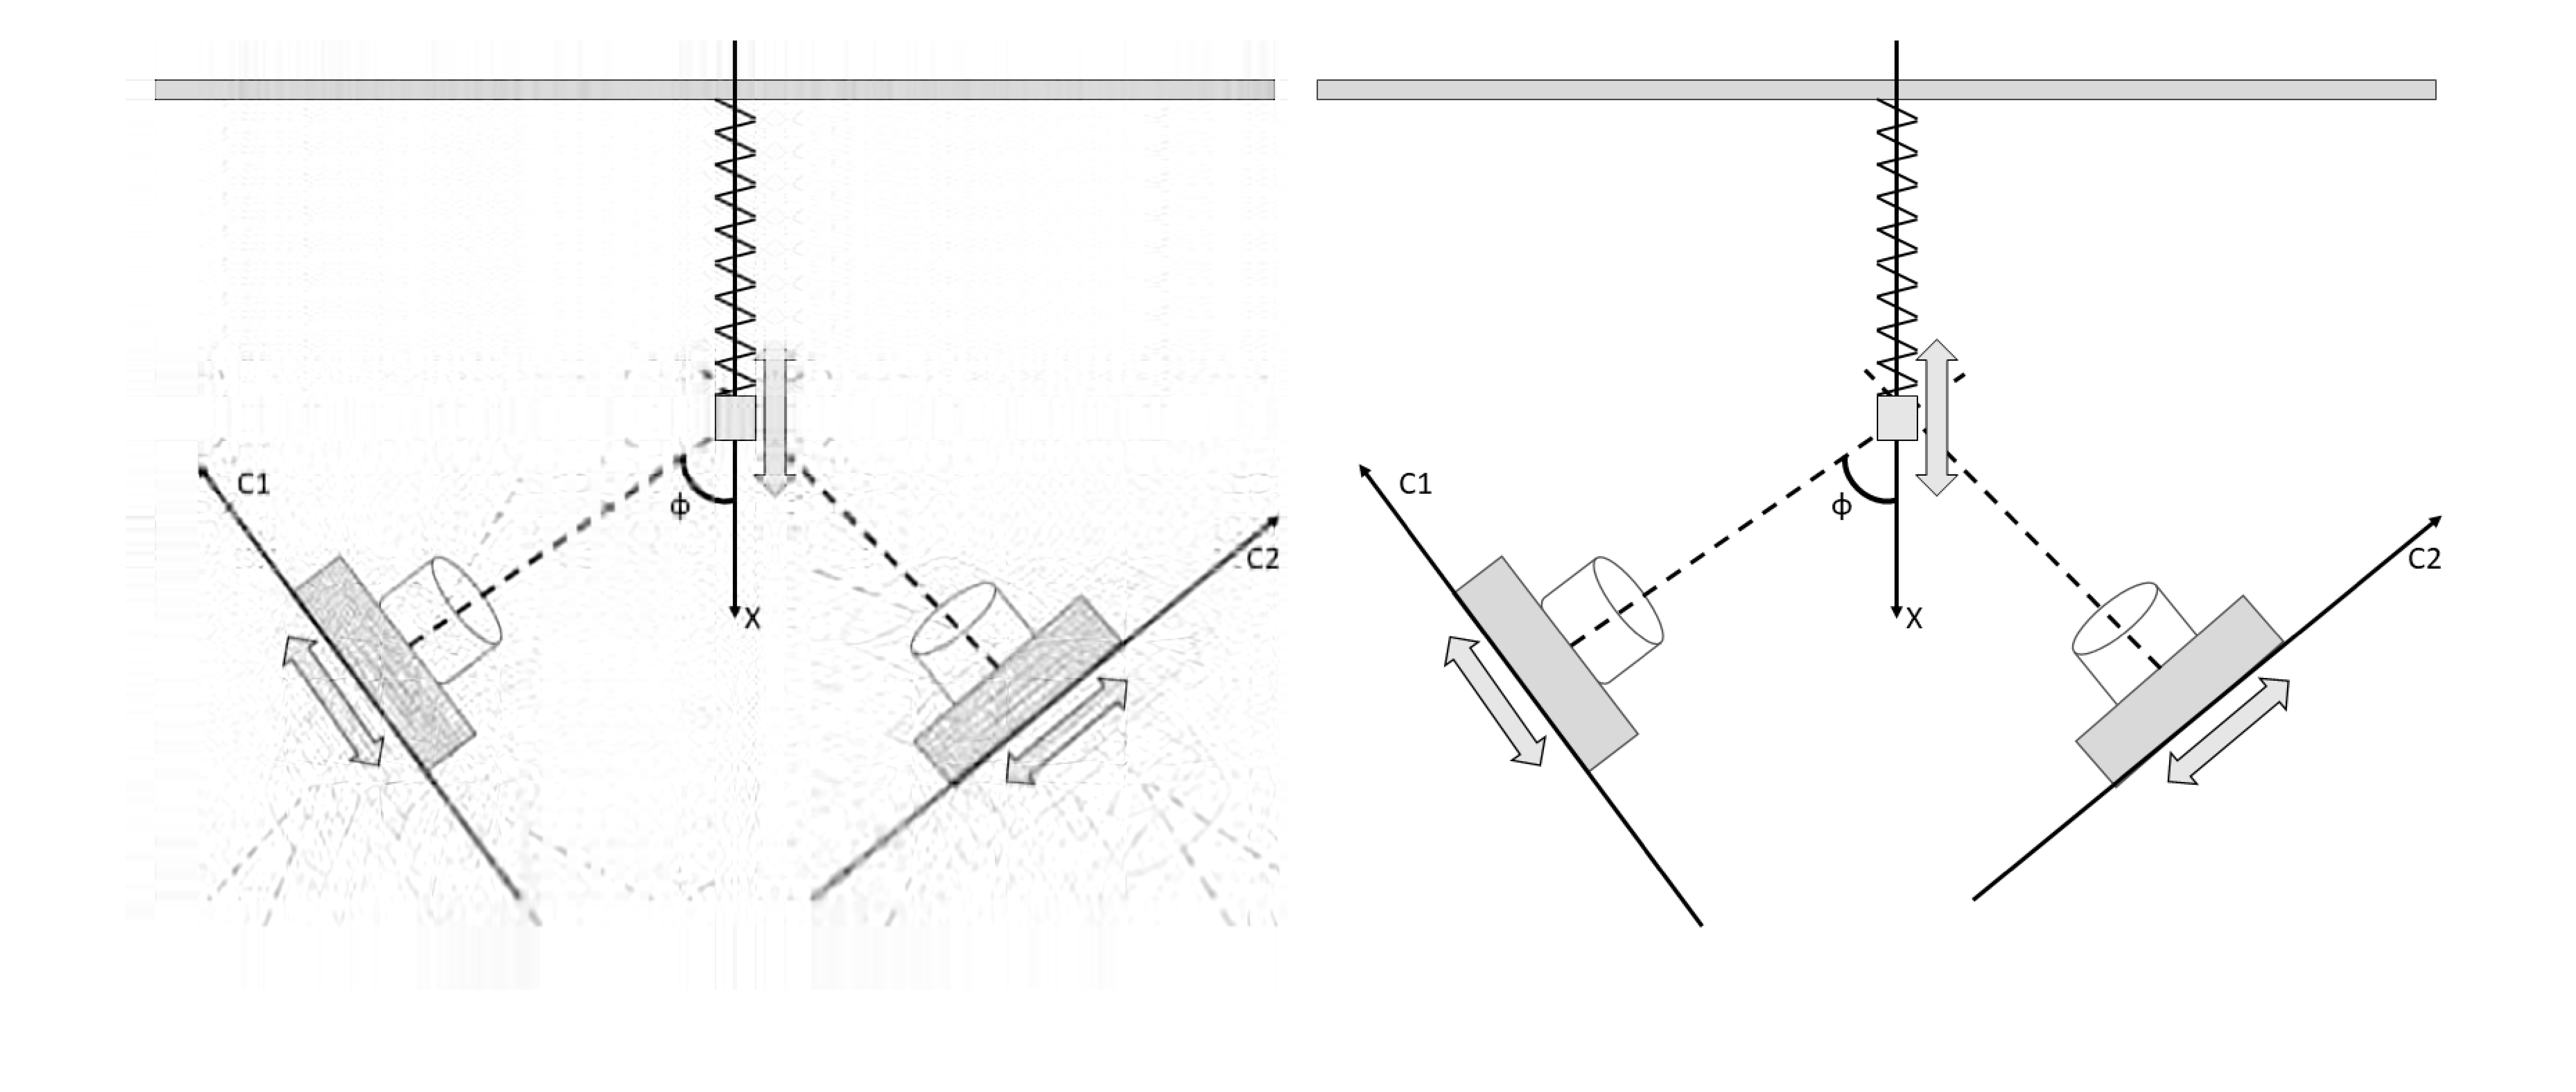

In [170]:
imshow(uint8([Ak,A]))

In [171]:
display("Ранг исходной картинки:" + rank(A))

    "Ранг исходной картинки:415"

In [172]:
display("Ранг сжатой картинки:" + rank(Ak))

    "Ранг сжатой картинки:60"

In [173]:
wA  = mem_size_summ("A") ;% объем памяти в байтах,занимаемой исходной матрицей
wAk = mem_size_summ("Uk","Sk","Vk") ; % объем памяти в байтах
disp("Объем исходной матрицы в байтах :"+ wA)

Объем исходной матрицы в байтах :4592240

In [174]:
disp("Объем сжатой матрицы  в байтах :"+wAk)

Объем сжатой матрицы  в байтах :731520

In [175]:

disp("Относительный объем памяти сжатый/несжатый:"+ wAk/wA)

Относительный объем памяти сжатый/несжатый:0.15929

In [176]:
ax = get_next_ax();

fig1


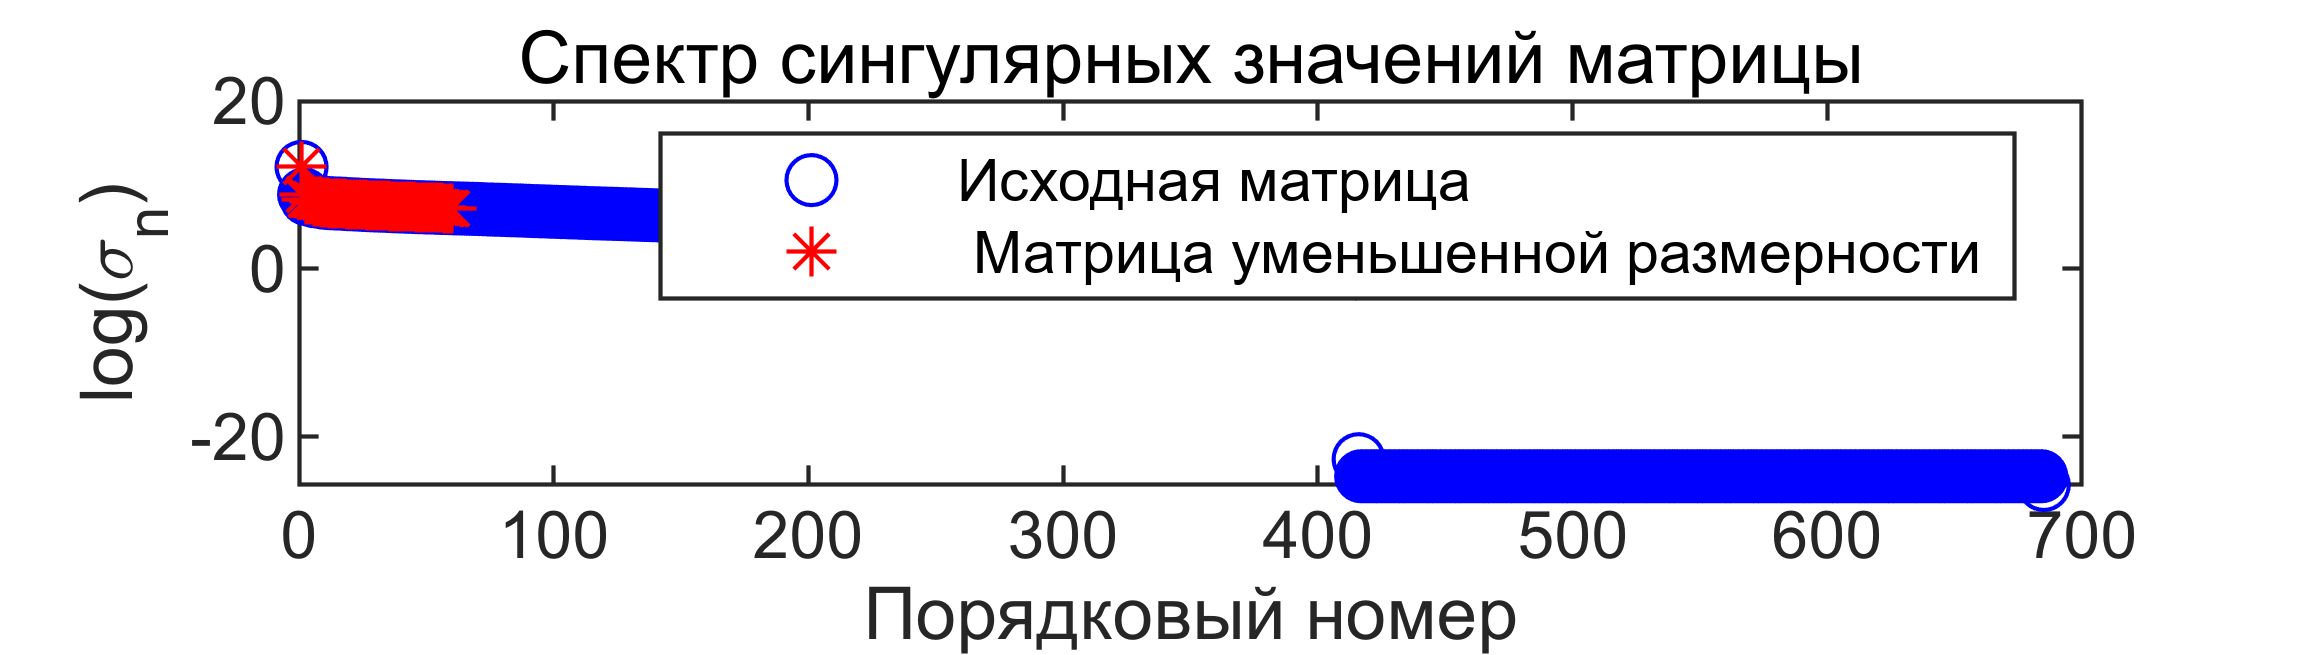

In [177]:
plot(ax,1:size(S,2),log(sum(S)),'ob',1:number_of_dimentions,log(Sk),'*r')
title(ax,"Спектр сингулярных значений матрицы");
xlabel(ax,"Порядковый номер");
ylabel(ax,"log(\sigma_n)");
legend(ax,["Исходная матрица" " Матрица уменьшенной размерности"]);


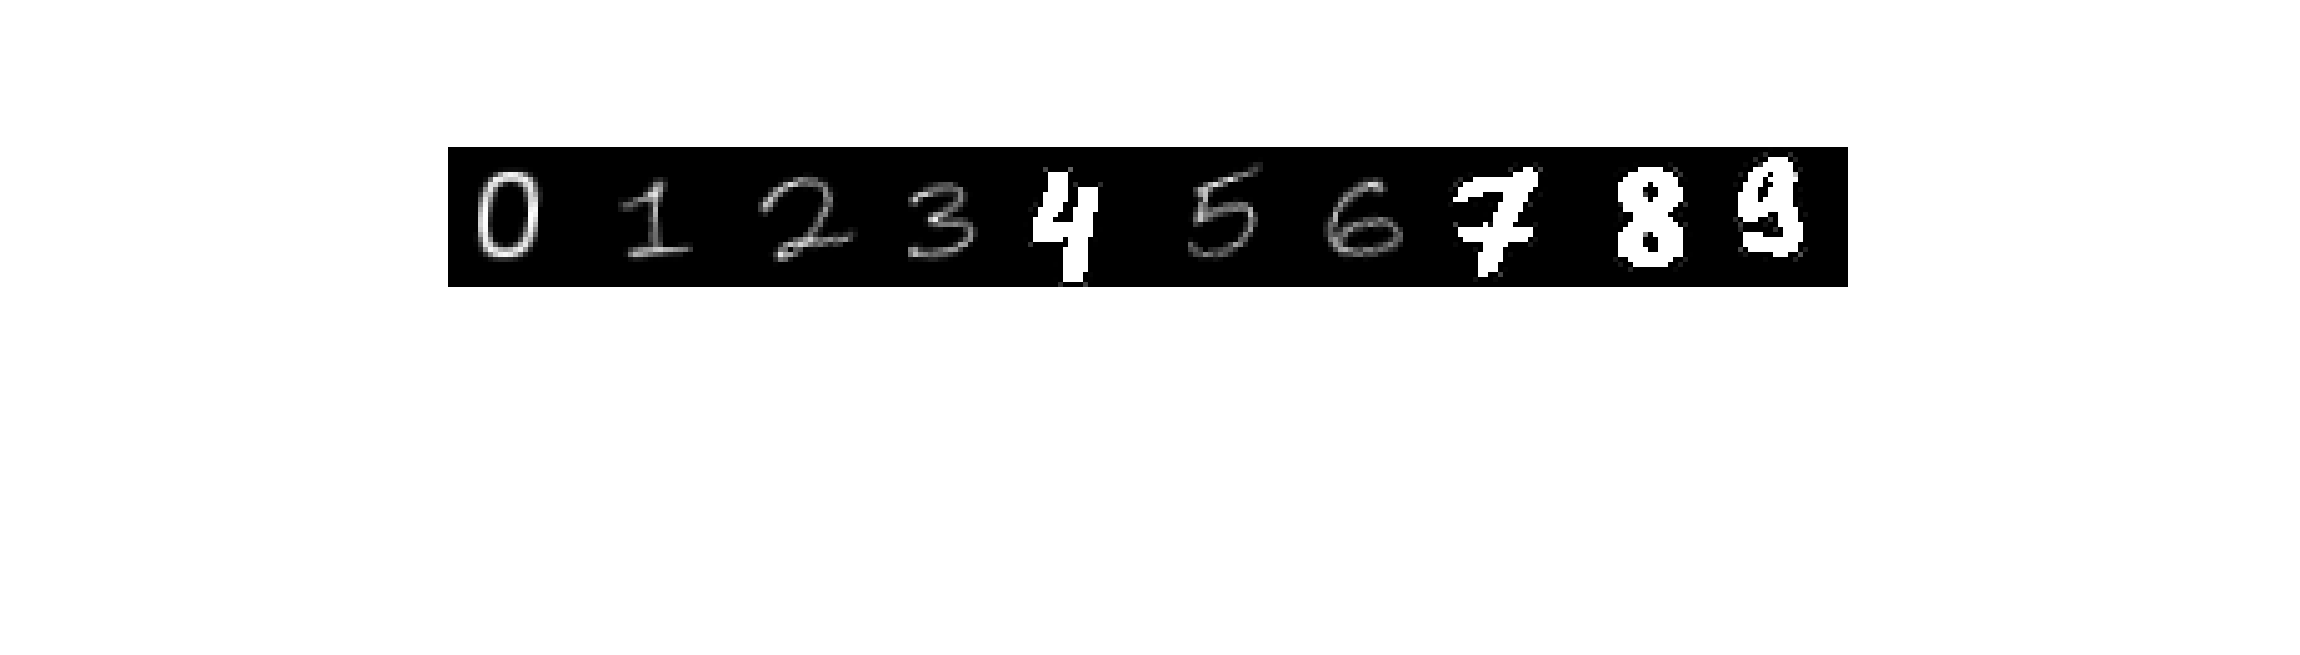

ranks = 1x10    
    14    13    19    14    16    15    16    20    15    15
fig2


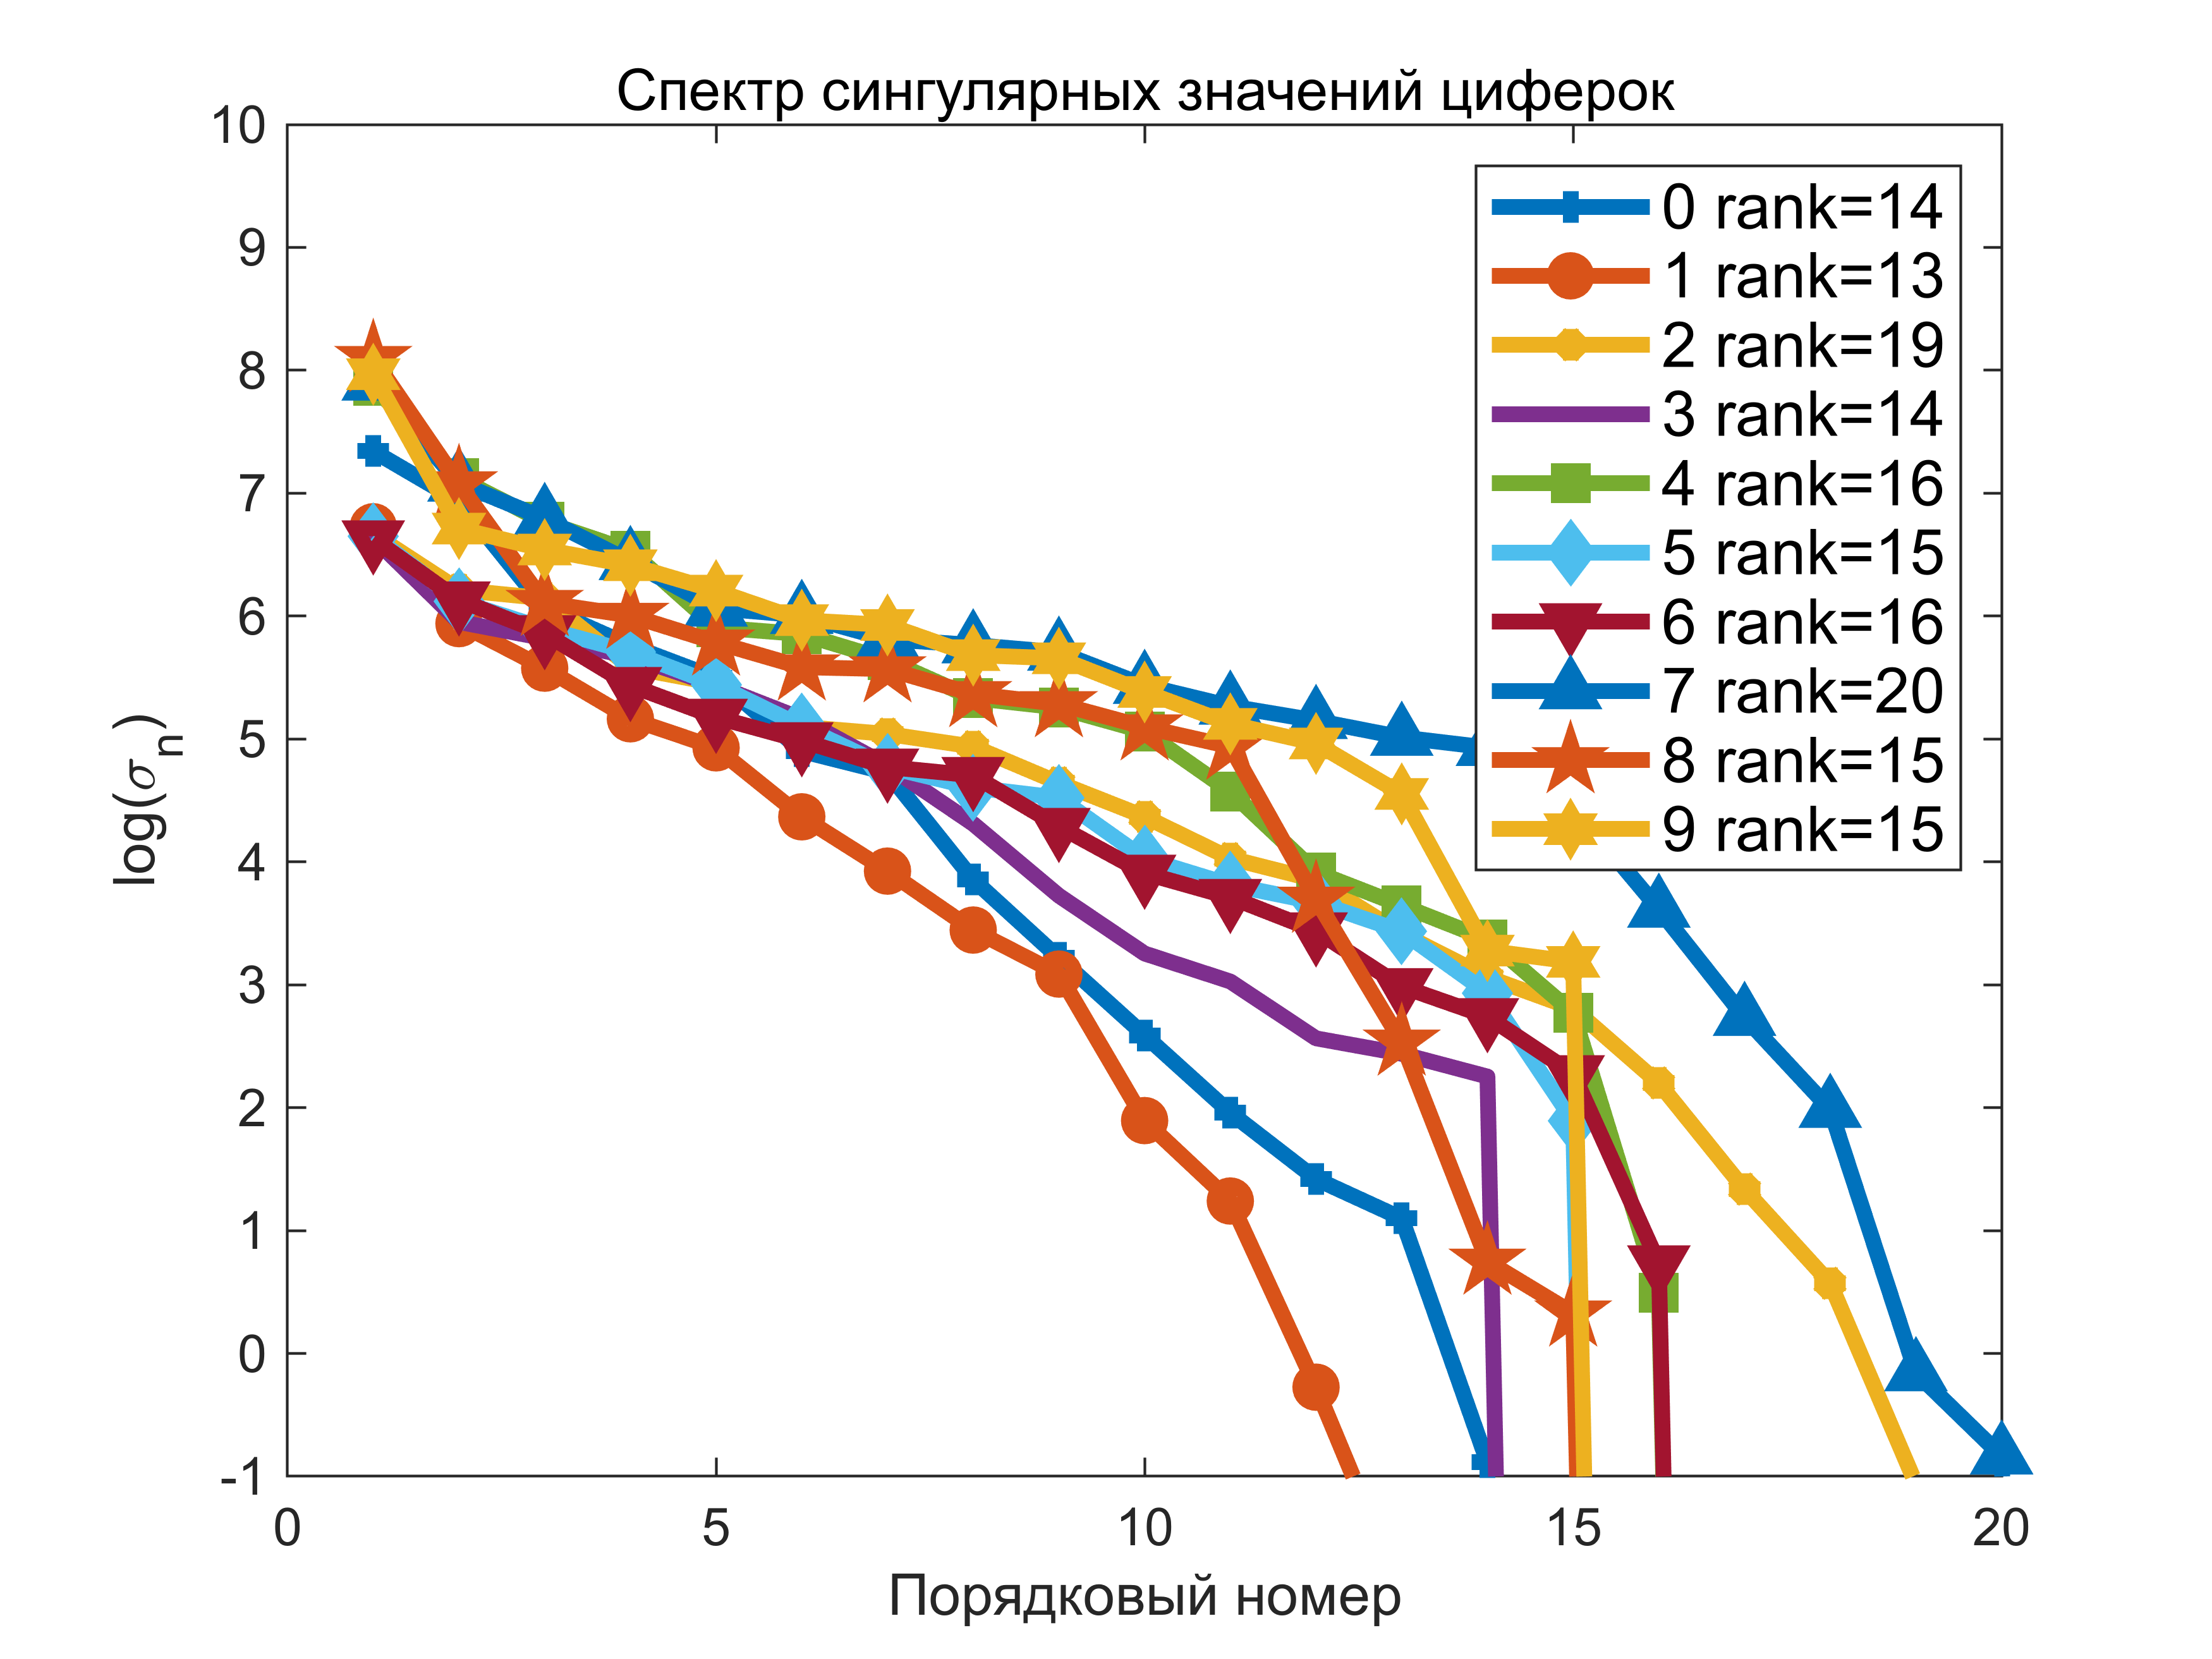

In [178]:
% загружаем картинки написанных от руки цифр и пытаемся сравнить спектры их
% сингулярных значений
check_numbers_flag = true;
if check_numbers_flag

    path = get_folder + "\figs\";
    svd_struct(10) = struct("V",[],"S",[],"U",[],"M",[]);
    for ii=0:9
        cur_im = imread(fullfile(path,ii+".png"));
        mat = double((im2gray(cur_im)));
        i = ii +1;
        svd_struct(i).M = (mat);
        [svd_struct(i).V,svd_struct(i).S,svd_struct(i).U] = svd(mat);
    end
    imshow(uint8([svd_struct(:).M]))
    ranks = arrayfun(@(X)rank(X.M),svd_struct)
    sig_mat = ones(size(mat,1),10); % матрица спектров сингулярных значений
    for iii = 1:numel(svd_struct)
        sig_mat(:,iii) = sum(svd_struct(iii).S);
    end
    p = plot(get_next_ax(),log(sig_mat), 'LineWidth',3,'MarkerSize',6);
    ylim([-1,10])
    legend(string(0:9) + " rank=" + string(ranks),'FontSize',12);
    mark = ["+","o","*",".","square","diamond","v","^","pentagram","hexagram"];
    arrayfun(@(ii)set(p(ii),"Marker",mark(ii)),1:10);
    title("Спектр сингулярных значений циферок");
    xlabel("Порядковый номер");
    ylabel("log(\sigma_n)");
end

In [179]:
function ax = draw_vector(ax,ttl,names,type,varargin)
% функция строит двух- и трех-мерные вектора, а также рассеянные данные из
% матрицы
% ax - оси (если пустые, то создаются новые)
% ttl - заголовок картинки
% names - имена векторов
% type:
%       "vector" - аргументы, которые передаются после интерпретируются
%                   как отдельные вектора
%       "point"  - в этом случае передается матрица в качестве аргумента и
%       столбцы матрицы строятся при помощи функций scatter и scatter3 d
%       в зависимости от размерности массива
    arguments
        ax =[]
        ttl string =strings(0,1)
        names string =strings(0,1)
        type string {mustBeMember(type,["vector" "point"])}="vector"
    end
    arguments (Repeating)
        varargin double
    end
    was_empty = isempty(ax); % это признак того, что все строится на новых осях
    if was_empty
        ax = get_next_ax();
    else
        hold(ax,"on");
        % if ~isempty(ax.Legend)
        %     leg_before = ax.Legend.String;
        % else
        %     leg_before = strings(0,1);
        % end
    end

    if strcmp(type,"vector")
        is_3D = numel(varargin{1})==3;
            if is_3D
                [x,y,z]  = make_xy(varargin{1});
                plot3(ax,x,y,z,'LineWidth',2,'Marker','o');
                hold on
                for iii = 2:numel(varargin)
                        [x,y,z] = make_xy(varargin{iii});
                        plot3(ax,x,y,z,'LineWidth',2,'Marker','o');
                end
                grid on
                hold off
            else
                [x,y]  = make_xy(varargin{1});
                plot(ax,x,y,'LineWidth',2,'Marker','o');
                hold on
                for iii = 2:numel(varargin)
                        [x,y]  = make_xy(varargin{iii});
                        plot(ax,x,y,'LineWidth',2,'Marker','o');
                end
                grid on
                hold off
            end
            if isempty(names)||(numel(names)~=numel(varargin))
                legend(ax,string(1:numel(varargin)));

            else
                % if ~was_empty
                %      names= [names(:);leg_before(:)];
                % end
                legend(ax,names);
            end
            xlim(ax,[-1 1]);
            ylim(ax,[-1 1]);
            if ~isempty(ttl)
                title(ax,ttl);
            end
    else
        %data_number = numel(varargin); % число массивов данных
        is_3D = numel(varargin)==3;
        data = varargin{1};
        if size(data,2)>1
            data = transpose(data);
            is_transpose = true;
        else
            is_transpose = false;
        end
        if ~is_transpose
            for iii = 2:numel(varargin)
                data = [data,varargin{iii}];
            end
        else
            for iii = 2:numel(varargin)
                data = [data,transpose(varargin{iii})];
            end
        end

        if is_3D
            scatter3(ax,data(:,1),data(:,2),data(:,3));
        else
            scatter(ax,data(:,1),data(:,2));
        end

    end
    if ~was_empty
            hold(ax,"off");
    end
end
function [x,y,z]  = make_xy(col)
% добавляет к координатам вектора нули так, чтобы при помощи функции plot
% строилась линия
    switch numel(col)
        case 1
            x = [col(1)];
            y = 0;
            z = 0;
        case 2
            x = [0 col(1)];
            y = [0 col(2)];
            z = zeros(1,2);
        case 3
            x = [0 col(1)];
            y = [0 col(2)];
            z = [0 col(3)];
    end
end
function [bpar,bper,ang] = projection_matrix(A,b)
% функция считает угол между вектором и пространством столбцов матрицы A
    for ii =1:size(A,2)
        A(:,ii) = A(:,ii)/norm(A(:,ii));
    end
    beta = A*transpose(A)*b;
    beta = beta/norm(beta); % нормируем вектор beta
    Pbeta = beta*transpose(beta); % оператор проектирования вектора на
    bpar = Pbeta*b;
    bper = b-bpar;
    ang = rad2deg(acos(norm(bpar)/norm(b)));
end
function [new_ax,fig_handle] = get_next_ax(index)
% функция, которая возвращает новые оси на новой фигуре
    arguments
        index = []
    end
    persistent N;
    if isempty(index)
        if isempty(N)
            N=1;
        else
            N  = N+1;
        end
        fig_handle = figure(N);
        clf(fig_handle);
        new_ax = axes(fig_handle);
        disp("fig"+ N)
    else
        fig_handle = figure(index);
        clf(fig_handle);
        new_ax = axes(fig_handle);
    end
end
function mem_size = mem_size_summ(varargin)
% функция считает объем несокльких переменных в памяти base workspace
    names = string(varargin);
    mem_size = 0;
    base_vars = evalin("base","whos");
    flag = arrayfun(@(X)any(strcmp(X.name,names)),base_vars);
    if ~any(flag)
        return
    end
    mem_size = sum(arrayfun(@(X)X.bytes,base_vars(flag)));
end
function folder = get_folder()
% текущая папка
folder = fileparts(matlab.desktop.editor.getActiveFilename);
end